In [1]:
import pandas as pd
import preprocessor as p
import os
import emoji
import re
#import spacy
from sklearn.model_selection import train_test_split
#from spacy_cld import LanguageDetector
import csv

In [2]:
path_1=r'/home/irlab/Documents/Information_retrieval/twitter_corpus//'
def id2text(df, x):
    row = df[df.tweet_id == int(x)]
    # some ids are missing, they just don't exist in data
    return '' if (len(row) == 0) else row.iloc[0]['text']

In [3]:
path_1

'/home/irlab/Documents/Information_retrieval/twitter_corpus//'

In [5]:
df_A=pd.read_csv('applesupport.tsv',delimiter='\t',encoding='utf-8')
df_A

,author_id,question,answer
0,AppleSupport,The newest update. I made sure to download it ...,Lets take a closer look into this issue. Selec...
1,AppleSupport,Tried resetting my settings .. restarting my p...,Let's go to DM for the next steps. DM us here:
2,AppleSupport,This is what it looks like,Any steps tried since it started last night?
3,AppleSupport,I have an iPhone 7 Plus and yes I do,That's great it has iOS 11.1 as we can rule ou...
4,AppleSupport,I need answers because it’s annoying,We'd like to look into this with you. Which mo...
5,AppleSupport,"Hey and anyone else who upgraded to ios11.1, a...","Hey, let's work together to figure out what's ..."
6,AppleSupport,This is what is happening...,We'd like to investigate further with you. Sen...
7,AppleSupport,Tf is wrong with my keyboard,"Fill us in on what is happening, then we can h..."
8,AppleSupport,are the call centres closed for the night?,We've received your DM and will continue there.
9,AppleSupport,hello are all the lines closed for tonight,What's going on? We're hapy to help if we can.


In [6]:
df_A=df_A.drop('author_id',axis=1)

In [7]:
delimiter = '\t'
with open('formatted.txt', 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter, lineterminator='\n')
    for i in range(len(df_A)):
        writer.writerow(df_A.iloc[i])

KeyboardInterrupt: 

In [ ]:
pairs=df_A
pairs[:10]

In [8]:
def printLines(file, n=10):
    with open(file, 'rb') as datafile:
        lines = datafile.readlines()
    for line in lines[:n]:
        print(line)

In [9]:
printLines('formatted.txt')

b"The newest update. I made sure to download it yesterday.\tLets take a closer look into this issue. Select the following link to join us in a DM and we'll go from there.\r\n"
b"Tried resetting my settings .. restarting my phone .. all that\tLet's go to DM for the next steps. DM us here:\r\n"
b'This is what it looks like\tAny steps tried since it started last night?\r\n'
b"I have an iPhone 7 Plus and yes I do\tThat's great it has iOS 11.1 as we can rule out being outdated. Any steps tried since this started? Do you recall when it started?\r\n"
b"I need answers because it\xe2\x80\x99s annoying\tWe'd like to look into this with you. Which model do you have and is iOS 11.1 installed? Any steps tried so far?\r\n"
b"Hey and anyone else who upgraded to ios11.1, are y\xe2\x80\x99all having issues with capital \xe2\x80\x9cI\xe2\x80\x9d in the Mail app? As it puts in \xe2\x80\x9cA\xe2\x80\x9d?\tHey, let's work together to figure out what's going on. Meet us in DM and we'll continue from there.\

In [0]:
%matplotlib inline

In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import torch
from torch.jit import script, trace
import torch.nn as nn # nn package
from torch import optim #optimizer
import torch.nn.functional as F #relu, activation, sigmoid etc
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math


USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print('Hello Chatbot')

Hello Chatbot


In [11]:
USE_CUDA 

False

In [12]:
corpus_name = "twitter_corpus"
corpus = os.path.join(corpus_name)
corpus

'twitter_corpus'

Create formatted data file
~~~~~~~~~~~~~~~~~~~~~~~~~~

For convenience, we'll create a nicely formatted data file in which each line
contains a tab-separated *query sentence* and a *response sentence* pair.

The following functions facilitate the parsing of the raw
*movie_lines.txt* data file.

-  ``loadLines`` splits each line of the file into a dictionary of
   fields (lineID, characterID, movieID, character, text)
-  ``loadConversations`` groups fields of lines from ``loadLines`` into
   conversations based on *movie_conversations.txt*
-  ``extractSentencePairs`` extracts pairs of sentences from
   conversations




In [13]:
# Splits each line of the file into a dictionary of fields
def loadLines(fileName, fields):
    lines = {}
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            values = line.split(" +++$+++ ")
            # Extract fields
            lineObj = {}
            for i, field in enumerate(fields):
                lineObj[field] = values[i]
            lines[lineObj['lineID']] = lineObj
    return lines


# Groups fields of lines from `loadLines` into conversations based on *movie_conversations.txt*
def loadConversations(fileName, lines, fields):
    conversations = []
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            values = line.split(" +++$+++ ")
            # Extract fields
            convObj = {}
            for i, field in enumerate(fields):
                convObj[field] = values[i]
            # Convert string to list (convObj["utteranceIDs"] == "['L598485', 'L598486', ...]")
            lineIds = eval(convObj["utteranceIDs"])
            # Reassemble lines
            convObj["lines"] = []
            for lineId in lineIds:
                convObj["lines"].append(lines[lineId])
            conversations.append(convObj)
    return conversations


# Extracts pairs of sentences from conversations
def extractSentencePairs(conversations):
    qa_pairs = []
    for conversation in conversations:
        # Iterate over all the lines of the conversation
        for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
            inputLine = conversation["lines"][i]["text"].strip()
            targetLine = conversation["lines"][i+1]["text"].strip()
            # Filter wrong samples (if one of the lists is empty)
            if inputLine and targetLine:
                qa_pairs.append([inputLine, targetLine])
    return qa_pairs

Now we’ll call these functions and create the file. We’ll call it
*formatted_movie_lines.txt*.




In [15]:
# Define path to new file
datafile = os.path.join("formatted.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

'''# Initialize lines dict, conversations list, and field ids
lines = {}
conversations = []
MOVIE_LINES_FIELDS = ["lineID", "characterID", "movieID", "character", "text"]
MOVIE_CONVERSATIONS_FIELDS = ["character1ID", "character2ID", "movieID", "utteranceIDs"]

# Load lines and process conversations
print("\nProcessing corpus...")
lines = loadLines(os.path.join(corpus, "movie_lines.txt"), MOVIE_LINES_FIELDS)
print("\nLoading conversations...")
conversations = loadConversations(os.path.join(corpus, "movie_conversations.txt"),
                                  lines, MOVIE_CONVERSATIONS_FIELDS)

# Write new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter, lineterminator='\n')
    for pair in extractSentencePairs(conversations):
        writer.writerow(pair)
'''
# Print a sample of lines
print("\nSample lines from file:")
printLines(datafile)


Sample lines from file:
b"The newest update. I made sure to download it yesterday.\tLets take a closer look into this issue. Select the following link to join us in a DM and we'll go from there.\r\n"
b"Tried resetting my settings .. restarting my phone .. all that\tLet's go to DM for the next steps. DM us here:\r\n"
b'This is what it looks like\tAny steps tried since it started last night?\r\n'
b"I have an iPhone 7 Plus and yes I do\tThat's great it has iOS 11.1 as we can rule out being outdated. Any steps tried since this started? Do you recall when it started?\r\n"
b"I need answers because it\xe2\x80\x99s annoying\tWe'd like to look into this with you. Which model do you have and is iOS 11.1 installed? Any steps tried so far?\r\n"
b"Hey and anyone else who upgraded to ios11.1, are y\xe2\x80\x99all having issues with capital \xe2\x80\x9cI\xe2\x80\x9d in the Mail app? As it puts in \xe2\x80\x9cA\xe2\x80\x9d?\tHey, let's work together to figure out what's going on. Meet us in DM and we

In [16]:
corpus

'twitter_corpus'

In [17]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Count default tokens

        for word in keep_words:
            self.addWord(word)

Now we can assemble our vocabulary and query/response sentence pairs.
Before we are ready to use this data, we must perform some
preprocessing.

First, we must convert the Unicode strings to ASCII using
``unicodeToAscii``. Next, we should convert all letters to lowercase and
trim all non-letter characters except for basic punctuation
(``normalizeString``). Finally, to aid in training convergence, we will
filter out sentences with length greater than the ``MAX_LENGTH``
threshold (``filterPairs``).




In [18]:
#MAX_LENGTH = 10  # Maximum sentence length to consider
MAX_LENGTH = 30
# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

# Read query/response pairs and return a voc object
def readVocs(datafile, corpus_name):
    print("Reading lines...")
    # Read the file and split into lines
    lines = open(datafile, encoding='utf-8').\
        read().strip().split('\n')
    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    voc = Voc(corpus_name)
    return voc, pairs

# Returns True iff both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    # Input sequences need to preserve the last word for EOS token
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH

# Filter pairs using filterPair condition
def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

# Using the functions defined above, return a populated voc object and pairs list
def loadPrepareData(corpus, corpus_name, datafile, save_dir):
    print("Start preparing training data ...")
    voc, pairs = readVocs(datafile, corpus_name)
    print("Read {!s} sentence pairs".format(len(pairs)))
    pairs = filterPairs(pairs)
    print("Trimmed to {!s} sentence pairs".format(len(pairs)))
    print("Counting words...")
    for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])
    print("Counted words:", voc.num_words)
    return voc, pairs


# Load/Assemble voc and pairs
save_dir = os.path.join(path_1+"data", "save")
voc, pairs = loadPrepareData(corpus, corpus_name, datafile, save_dir)
# Print some pairs to validate
print("\npairs:")
for pair in pairs[:10]:
    print(pair)

Start preparing training data ...
Reading lines...
Read 99101 sentence pairs
Trimmed to 73476 sentence pairs
Counting words...
Counted words: 17688

pairs:
['the newest update . i made sure to download it yesterday .', 'lets take a closer look into this issue . select the following link to join us in a dm and we ll go from there .']
['tried resetting my settings . . restarting my phone . . all that', 'let s go to dm for the next steps . dm us here']
['this is what it looks like', 'any steps tried since it started last night ?']
['i have an iphone plus and yes i do', 'that s great it has ios . as we can rule out being outdated . any steps tried since this started ? do you recall when it started ?']
['i need answers because it s annoying', 'we d like to look into this with you . which model do you have and is ios . installed ? any steps tried so far ?']
['hey and anyone else who upgraded to ios . are y all having issues with capital i in the mail app ? as it puts in a ?', 'hey let s work

In [0]:
corpus

'twitter_corpus'

In [0]:
corpus_name

'twitter_corpus'

In [0]:
datafile

'twitter_corpus/formatted.txt'

In [0]:
save_dir

'data/save'

Another tactic that is beneficial to achieving faster convergence during
training is trimming rarely used words out of our vocabulary. Decreasing
the feature space will also soften the difficulty of the function that
the model must learn to approximate. We will do this as a two-step
process:

1) Trim words used under ``MIN_COUNT`` threshold using the ``voc.trim``
   function.

2) Filter out pairs with trimmed words.




In [19]:
MIN_COUNT = 2    # Minimum word count threshold for trimming
#MIN_COUNT = 10
def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs


# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

keep_words 9368 / 17685 = 0.5297
Trimmed from 73476 pairs to 66434, 0.9042 of total


Prepare Data for Models
-----------------------

Although we have put a great deal of effort into preparing and massaging our
data into a nice vocabulary object and list of sentence pairs, our models
will ultimately expect numerical torch tensors as inputs. One way to
prepare the processed data for the models can be found in the `seq2seq
translation
tutorial <https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html>`__.
In that tutorial, we use a batch size of 1, meaning that all we have to
do is convert the words in our sentence pairs to their corresponding
indexes from the vocabulary and feed this to the models.

However, if you’re interested in speeding up training and/or would like
to leverage GPU parallelization capabilities, you will need to train
with mini-batches.

Using mini-batches also means that we must be mindful of the variation
of sentence length in our batches. To accomodate sentences of different
sizes in the same batch, we will make our batched input tensor of shape
*(max_length, batch_size)*, where sentences shorter than the
*max_length* are zero padded after an *EOS_token*.

If we simply convert our English sentences to tensors by converting
words to their indexes(\ ``indexesFromSentence``) and zero-pad, our
tensor would have shape *(batch_size, max_length)* and indexing the
first dimension would return a full sequence across all time-steps.
However, we need to be able to index our batch along time, and across
all sequences in the batch. Therefore, we transpose our input batch
shape to *(max_length, batch_size)*, so that indexing across the first
dimension returns a time step across all sentences in the batch. We
handle this transpose implicitly in the ``zeroPadding`` function.

.. figure:: /_static/img/chatbot/seq2seq_batches.png
   :align: center
   :alt: batches

The ``inputVar`` function handles the process of converting sentences to
tensor, ultimately creating a correctly shaped zero-padded tensor. It
also returns a tensor of ``lengths`` for each of the sequences in the
batch which will be passed to our decoder later.

The ``outputVar`` function performs a similar function to ``inputVar``,
but instead of returning a ``lengths`` tensor, it returns a binary mask
tensor and a maximum target sentence length. The binary mask tensor has
the same shape as the output target tensor, but every element that is a
*PAD_token* is 0 and all others are 1.

``batch2TrainData`` simply takes a bunch of pairs and returns the input
and target tensors using the aforementioned functions.




In [21]:
def indexesFromSentence(voc, sentence):
    return [voc.word2index[word] for word in sentence.split(' ')] + [EOS_token]


def zeroPadding(l, fillvalue=PAD_token):
    return list(itertools.zip_longest(*l, fillvalue=fillvalue))

def binaryMatrix(l, value=PAD_token):
    m = []
    for i, seq in enumerate(l):
        m.append([])
        for token in seq:
            if token == PAD_token:
                m[i].append(0)
            else:
                m[i].append(1)
    return m

# Returns padded input sequence tensor and lengths
def inputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    padVar = torch.LongTensor(padList)
    return padVar, lengths

# Returns padded target sequence tensor, padding mask, and max target length
def outputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    max_target_len = max([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    mask = binaryMatrix(padList)
    mask = torch.ByteTensor(mask)
    padVar = torch.LongTensor(padList)
    return padVar, mask, max_target_len

# Returns all items for a given batch of pairs
def batch2TrainData(voc, pair_batch):
    pair_batch.sort(key=lambda x: len(x[0].split(" ")), reverse=True)
    input_batch, output_batch = [], []
    for pair in pair_batch:
        input_batch.append(pair[0])
        output_batch.append(pair[1])
    inp, lengths = inputVar(input_batch, voc)
    output, mask, max_target_len = outputVar(output_batch, voc)
    return inp, lengths, output, mask, max_target_len


# Example for validation
small_batch_size = 5
batches = batch2TrainData(voc, [random.choice(pairs) for _ in range(small_batch_size)])
input_variable, lengths, target_variable, mask, max_target_len = batches

print("input_variable:", input_variable)
print("lengths:", lengths)
print("target_variable:", target_variable)
print("mask:", mask)
print("max_target_len:", max_target_len)

input_variable: tensor([[  67,  148,   50,  141,  248],
        [   6,  141,    3,   49, 1110],
        [   6,   69,  212,    3,  101],
        [  50,  134,   49,    7,   27],
        [   3,    7,   20,  217, 7200],
        [1826,  146,   58,  186,   58],
        [ 184,    3,   97,  105,    2],
        [  16,  147,    7,    3,    0],
        [3028,    7,   44,   61,    0],
        [  40,   20,  235,  116,    0],
        [ 132,   49,   10,   58,    0],
        [   7,  397,   20,    2,    0],
        [  59,   71,  505,    0,    0],
        [  10,  184,  207,    0,    0],
        [ 254,  644,    6,    0,    0],
        [  12,    6, 3476,    0,    0],
        [ 415,    6, 1066,    0,    0],
        [  27,    6,    2,    0,    0],
        [   6,    6,    0,    0,    0],
        [  69,    2,    0,    0,    0],
        [ 134,    0,    0,    0,    0],
        [ 345,    0,    0,    0,    0],
        [  16,    0,    0,    0,    0],
        [ 392,    0,    0,    0,    0],
        [   6,    0,    

Define Models
-------------

Seq2Seq Model
~~~~~~~~~~~~~

The brains of our chatbot is a sequence-to-sequence (seq2seq) model. The
goal of a seq2seq model is to take a variable-length sequence as an
input, and return a variable-length sequence as an output using a
fixed-sized model.

`Sutskever et al. <https://arxiv.org/abs/1409.3215>`__ discovered that
by using two separate recurrent neural nets together, we can accomplish
this task. One RNN acts as an **encoder**, which encodes a variable
length input sequence to a fixed-length context vector. In theory, this
context vector (the final hidden layer of the RNN) will contain semantic
information about the query sentence that is input to the bot. The
second RNN is a **decoder**, which takes an input word and the context
vector, and returns a guess for the next word in the sequence and a
hidden state to use in the next iteration.

.. figure:: /_static/img/chatbot/seq2seq_ts.png
   :align: center
   :alt: model

Image source:
https://jeddy92.github.io/JEddy92.github.io/ts_seq2seq_intro/




Encoder
~~~~~~~

The encoder RNN iterates through the input sentence one token
(e.g. word) at a time, at each time step outputting an “output” vector
and a “hidden state” vector. The hidden state vector is then passed to
the next time step, while the output vector is recorded. The encoder
transforms the context it saw at each point in the sequence into a set
of points in a high-dimensional space, which the decoder will use to
generate a meaningful output for the given task.

At the heart of our encoder is a multi-layered Gated Recurrent Unit,
invented by `Cho et al. <https://arxiv.org/pdf/1406.1078v3.pdf>`__ in
2014. We will use a bidirectional variant of the GRU, meaning that there
are essentially two independent RNNs: one that is fed the input sequence
in normal sequential order, and one that is fed the input sequence in
reverse order. The outputs of each network are summed at each time step.
Using a bidirectional GRU will give us the advantage of encoding both
past and future context.

Bidirectional RNN:

.. figure:: /_static/img/chatbot/RNN-bidirectional.png
   :width: 70%
   :align: center
   :alt: rnn_bidir

Image source: https://colah.github.io/posts/2015-09-NN-Types-FP/

Note that an ``embedding`` layer is used to encode our word indices in
an arbitrarily sized feature space. For our models, this layer will map
each word to a feature space of size *hidden_size*. When trained, these
values should encode semantic similarity between similar meaning words.

Finally, if passing a padded batch of sequences to an RNN module, we
must pack and unpack padding around the RNN pass using
``torch.nn.utils.rnn.pack_padded_sequence`` and
``torch.nn.utils.rnn.pad_packed_sequence`` respectively.

**Computation Graph:**

   1) Convert word indexes to embeddings.
   2) Pack padded batch of sequences for RNN module.
   3) Forward pass through GRU.
   4) Unpack padding.
   5) Sum bidirectional GRU outputs.
   6) Return output and final hidden state.

**Inputs:**

-  ``input_seq``: batch of input sentences; shape=\ *(max_length,
   batch_size)*
-  ``input_lengths``: list of sentence lengths corresponding to each
   sentence in the batch; shape=\ *(batch_size)*
-  ``hidden``: hidden state; shape=\ *(n_layers x num_directions,
   batch_size, hidden_size)*

**Outputs:**

-  ``outputs``: output features from the last hidden layer of the GRU
   (sum of bidirectional outputs); shape=\ *(max_length, batch_size,
   hidden_size)*
-  ``hidden``: updated hidden state from GRU; shape=\ *(n_layers x
   num_directions, batch_size, hidden_size)*





In [22]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0): # n-layers=2 means 2 GRU's stacked together
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding

        # Initialize GRU; the input_size and hidden_size params are both set to 'hidden_size'
        #   because our input size is a word embedding with number of features == hidden_size
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        # Convert word indexes to embeddings
        embedded = self.embedding(input_seq)
        # Pack padded batch of sequences for RNN module
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        # Forward pass through GRU
        outputs, hidden = self.gru(packed, hidden)
        # Unpack padding
        outputs, _ = torch.nn.utils.rnn.pad_packed_sequence(outputs)
        # Sum bidirectional GRU outputs
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:]
        # Return output and final hidden state
        return outputs, hidden

In [23]:
'''class EncoderLSTM(nn.Module):
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0): # n-layers=2 means 2 GRU's stacked together
        super(EncoderLSTM, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding

        # Initialize GRU; the input_size and hidden_size params are both set to 'hidden_size'
        #   because our input size is a word embedding with number of features == hidden_size
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        # Convert word indexes to embeddings
        embedded = self.embedding(input_seq)
        # Pack padded batch of sequences for RNN module
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        # Forward pass through GRU
        outputs, hidden = self.lstm(packed, hidden)
        # Unpack padding
        outputs, _ = torch.nn.utils.rnn.pad_packed_sequence(outputs)
        # Sum bidirectional GRU outputs
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:]
        # Return output and final hidden state
        return outputs, hidden'''

"class EncoderLSTM(nn.Module):\n    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0): # n-layers=2 means 2 GRU's stacked together\n        super(EncoderLSTM, self).__init__()\n        self.n_layers = n_layers\n        self.hidden_size = hidden_size\n        self.embedding = embedding\n\n        # Initialize GRU; the input_size and hidden_size params are both set to 'hidden_size'\n        #   because our input size is a word embedding with number of features == hidden_size\n        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers,\n                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)\n\n    def forward(self, input_seq, input_lengths, hidden=None):\n        # Convert word indexes to embeddings\n        embedded = self.embedding(input_seq)\n        # Pack padded batch of sequences for RNN module\n        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)\n        # Forward pass through GRU\n        outputs, 

In [24]:
# Luong attention layer
class Attn(torch.nn.Module):
    def __init__(self, method, hidden_size):
        super(Attn, self).__init__()
        self.method = method
        if self.method not in ['dot', 'general', 'concat']:
            raise ValueError(self.method, "is not an appropriate attention method.")
        self.hidden_size = hidden_size
        if self.method == 'general':
            self.attn = torch.nn.Linear(self.hidden_size, hidden_size)
        elif self.method == 'concat':
            self.attn = torch.nn.Linear(self.hidden_size * 2, hidden_size)
            self.v = torch.nn.Parameter(torch.FloatTensor(hidden_size))

    def dot_score(self, hidden, encoder_output):
        return torch.sum(hidden * encoder_output, dim=2)

    def general_score(self, hidden, encoder_output):
        energy = self.attn(encoder_output)
        return torch.sum(hidden * energy, dim=2)

    def concat_score(self, hidden, encoder_output):
        energy = self.attn(torch.cat((hidden.expand(encoder_output.size(0), -1, -1), encoder_output), 2)).tanh()
        return torch.sum(self.v * energy, dim=2)

    def forward(self, hidden, encoder_outputs):
        # Calculate the attention weights (energies) based on the given method
        if self.method == 'general':
            attn_energies = self.general_score(hidden, encoder_outputs)
        elif self.method == 'concat':
            attn_energies = self.concat_score(hidden, encoder_outputs)
        elif self.method == 'dot':
            attn_energies = self.dot_score(hidden, encoder_outputs)

        # Transpose max_length and batch_size dimensions
        attn_energies = attn_energies.t()

        # Return the softmax normalized probability scores (with added dimension)
        return F.softmax(attn_energies, dim=1).unsqueeze(1)

Now that we have defined our attention submodule, we can implement the
actual decoder model. For the decoder, we will manually feed our batch
one time step at a time. This means that our embedded word tensor and
GRU output will both have shape *(1, batch_size, hidden_size)*.

**Computation Graph:**

   1) Get embedding of current input word.
   2) Forward through unidirectional GRU.
   3) Calculate attention weights from the current GRU output from (2).
   4) Multiply attention weights to encoder outputs to get new "weighted sum" context vector.
   5) Concatenate weighted context vector and GRU output using Luong eq. 5.
   6) Predict next word using Luong eq. 6 (without softmax).
   7) Return output and final hidden state.

**Inputs:**

-  ``input_step``: one time step (one word) of input sequence batch;
   shape=\ *(1, batch_size)*
-  ``last_hidden``: final hidden layer of GRU; shape=\ *(n_layers x
   num_directions, batch_size, hidden_size)*
-  ``encoder_outputs``: encoder model’s output; shape=\ *(max_length,
   batch_size, hidden_size)*

**Outputs:**

-  ``output``: softmax normalized tensor giving probabilities of each
   word being the correct next word in the decoded sequence;
   shape=\ *(batch_size, voc.num_words)*
-  ``hidden``: final hidden state of GRU; shape=\ *(n_layers x
   num_directions, batch_size, hidden_size)*




In [25]:
class LuongAttnDecoderRNN(nn.Module):
    def __init__(self, attn_model, embedding, hidden_size, output_size, n_layers=1, dropout=0.1): #n_layers-> stacked GRU's
        super(LuongAttnDecoderRNN, self).__init__()

        # Keep for reference
        self.attn_model = attn_model
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        # Define layers
        self.embedding = embedding
        self.embedding_dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

        self.attn = Attn(attn_model, hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        # Note: we run this one step (word) at a time
        # Get embedding of current input word
        embedded = self.embedding(input_step)
        embedded = self.embedding_dropout(embedded)
        # Forward through unidirectional GRU
        rnn_output, hidden = self.gru(embedded, last_hidden)
        # Calculate attention weights from the current GRU output
        attn_weights = self.attn(rnn_output, encoder_outputs)
        # Multiply attention weights to encoder outputs to get new "weighted sum" context vector
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1))
        # Concatenate weighted context vector and GRU output using Luong eq. 5
        rnn_output = rnn_output.squeeze(0)
        context = context.squeeze(1)
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = torch.tanh(self.concat(concat_input))
        # Predict next word using Luong eq. 6
        output = self.out(concat_output)
        output = F.softmax(output, dim=1)
        # Return output and final hidden state
        return output, hidden

In [26]:
'''class LuongAttnDecoderLSTM(nn.Module):
    def __init__(self, attn_model, embedding, hidden_size, output_size, n_layers=1, dropout=0.1): #n_layers-> stacked GRU's
        super(LuongAttnDecoderLSTM, self).__init__()

        # Keep for reference
        self.attn_model = attn_model
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        # Define layers
        self.embedding = embedding
        self.embedding_dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

        self.attn = Attn(attn_model, hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        # Note: we run this one step (word) at a time
        # Get embedding of current input word
        embedded = self.embedding(input_step)
        embedded = self.embedding_dropout(embedded)
        # Forward through unidirectional GRU
        rnn_output, hidden = self.lstm(embedded, last_hidden)
        # Calculate attention weights from the current GRU output
        attn_weights = self.attn(rnn_output, encoder_outputs)
        # Multiply attention weights to encoder outputs to get new "weighted sum" context vector
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1))
        # Concatenate weighted context vector and GRU output using Luong eq. 5
        rnn_output = rnn_output.squeeze(0)
        context = context.squeeze(1)
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = torch.tanh(self.concat(concat_input))
        # Predict next word using Luong eq. 6
        output = self.out(concat_output)
        output = F.softmax(output, dim=1)
        # Return output and final hidden state
        return output, hidden'''

'class LuongAttnDecoderLSTM(nn.Module):\n    def __init__(self, attn_model, embedding, hidden_size, output_size, n_layers=1, dropout=0.1): #n_layers-> stacked GRU\'s\n        super(LuongAttnDecoderLSTM, self).__init__()\n\n        # Keep for reference\n        self.attn_model = attn_model\n        self.hidden_size = hidden_size\n        self.output_size = output_size\n        self.n_layers = n_layers\n        self.dropout = dropout\n\n        # Define layers\n        self.embedding = embedding\n        self.embedding_dropout = nn.Dropout(dropout)\n        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))\n        self.concat = nn.Linear(hidden_size * 2, hidden_size)\n        self.out = nn.Linear(hidden_size, output_size)\n\n        self.attn = Attn(attn_model, hidden_size)\n\n    def forward(self, input_step, last_hidden, encoder_outputs):\n        # Note: we run this one step (word) at a time\n        # Get embedding of current input wo

Define Training Procedure
-------------------------

Masked loss
~~~~~~~~~~~

Since we are dealing with batches of padded sequences, we cannot simply
consider all elements of the tensor when calculating loss. We define
``maskNLLLoss`` to calculate our loss based on our decoder’s output
tensor, the target tensor, and a binary mask tensor describing the
padding of the target tensor. This loss function calculates the average
negative log likelihood of the elements that correspond to a *1* in the
mask tensor.




In [27]:
def maskNLLLoss(inp, target, mask):
    nTotal = mask.sum()
    crossEntropy = -torch.log(torch.gather(inp, 1, target.view(-1, 1)).squeeze(1))
    loss = crossEntropy.masked_select(mask).mean()
    loss = loss.to(device)
    return loss, nTotal.item()

In [28]:
MAX_LENGTH=30

Single training iteration
~~~~~~~~~~~~~~~~~~~~~~~~~

The ``train`` function contains the algorithm for a single training
iteration (a single batch of inputs).

We will use a couple of clever tricks to aid in convergence:

-  The first trick is using **teacher forcing**. This means that at some
   probability, set by ``teacher_forcing_ratio``, we use the current
   target word as the decoder’s next input rather than using the
   decoder’s current guess. This technique acts as training wheels for
   the decoder, aiding in more efficient training. However, teacher
   forcing can lead to model instability during inference, as the
   decoder may not have a sufficient chance to truly craft its own
   output sequences during training. Thus, we must be mindful of how we
   are setting the ``teacher_forcing_ratio``, and not be fooled by fast
   convergence.

-  The second trick that we implement is **gradient clipping**. This is
   a commonly used technique for countering the “exploding gradient”
   problem. In essence, by clipping or thresholding gradients to a
   maximum value, we prevent the gradients from growing exponentially
   and either overflow (NaN), or overshoot steep cliffs in the cost
   function.

.. figure:: /_static/img/chatbot/grad_clip.png
   :align: center
   :width: 60%
   :alt: grad_clip

Image source: Goodfellow et al. *Deep Learning*. 2016. https://www.deeplearningbook.org/

**Sequence of Operations:**

   1) Forward pass entire input batch through encoder.
   2) Initialize decoder inputs as SOS_token, and hidden state as the encoder's final hidden state.
   3) Forward input batch sequence through decoder one time step at a time.
   4) If teacher forcing: set next decoder input as the current target; else: set next decoder input as current decoder output.
   5) Calculate and accumulate loss.
   6) Perform backpropagation.
   7) Clip gradients.
   8) Update encoder and decoder model parameters.


.. Note ::

  PyTorch’s RNN modules (``RNN``, ``LSTM``, ``GRU``) can be used like any
  other non-recurrent layers by simply passing them the entire input
  sequence (or batch of sequences). We use the ``GRU`` layer like this in
  the ``encoder``. The reality is that under the hood, there is an
  iterative process looping over each time step calculating hidden states.
  Alternatively, you ran run these modules one time-step at a time. In
  this case, we manually loop over the sequences during the training
  process like we must do for the ``decoder`` model. As long as you
  maintain the correct conceptual model of these modules, implementing
  sequential models can be very straightforward.





In [29]:
def train(input_variable, lengths, target_variable, mask, max_target_len, encoder, decoder, embedding,
          encoder_optimizer, decoder_optimizer, batch_size, clip, max_length=MAX_LENGTH):

    # Zero gradients
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Set device options
    input_variable = input_variable.to(device)
    lengths = lengths.to(device)
    target_variable = target_variable.to(device)
    mask = mask.to(device)

    # Initialize variables
    loss = 0
    print_losses = []
    n_totals = 0

    # Forward pass through encoder
    encoder_outputs, encoder_hidden = encoder(input_variable, lengths)

    # Create initial decoder input (start with SOS tokens for each sentence)
    decoder_input = torch.LongTensor([[SOS_token for _ in range(batch_size)]])
    decoder_input = decoder_input.to(device)

    # Set initial decoder hidden state to the encoder's final hidden state
    decoder_hidden = encoder_hidden[:decoder.n_layers]

    # Determine if we are using teacher forcing this iteration
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    # Forward batch of sequences through decoder one time step at a time
    if use_teacher_forcing:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # Teacher forcing: next input is current target
            decoder_input = target_variable[t].view(1, -1)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal
    else:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # No teacher forcing: next input is decoder's own current output
            _, topi = decoder_output.topk(1)
            decoder_input = torch.LongTensor([[topi[i][0] for i in range(batch_size)]])
            decoder_input = decoder_input.to(device)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

    # Perform backpropatation
    loss.backward()

    # Clip gradients: gradients are modified in place
    _ = torch.nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = torch.nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    # Adjust model weights
    encoder_optimizer.step()
    decoder_optimizer.step()

    return sum(print_losses) / n_totals

Training iterations
~~~~~~~~~~~~~~~~~~~

It is finally time to tie the full training procedure together with the
data. The ``trainIters`` function is responsible for running
``n_iterations`` of training given the passed models, optimizers, data,
etc. This function is quite self explanatory, as we have done the heavy
lifting with the ``train`` function.

One thing to note is that when we save our model, we save a tarball
containing the encoder and decoder state_dicts (parameters), the
optimizers’ state_dicts, the loss, the iteration, etc. Saving the model
in this way will give us the ultimate flexibility with the checkpoint.
After loading a checkpoint, we will be able to use the model parameters
to run inference, or we can continue training right where we left off.




In [30]:
def trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer, embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size, print_every, save_every, clip, corpus_name, loadFilename):

    # Load batches for each iteration
    training_batches = [batch2TrainData(voc, [random.choice(pairs) for _ in range(batch_size)])
                      for _ in range(n_iteration)]

    # Initializations
    print('Initializing ...')
    start_iteration = 1
    print_loss = 0
    if loadFilename:
        start_iteration = checkpoint['iteration'] + 1

    # Training loop
    print("Training...")
    for iteration in range(start_iteration, n_iteration + 1):
        training_batch = training_batches[iteration - 1]
        # Extract fields from batch
        input_variable, lengths, target_variable, mask, max_target_len = training_batch

        # Run a training iteration with batch
        loss = train(input_variable, lengths, target_variable, mask, max_target_len, encoder,
                     decoder, embedding, encoder_optimizer, decoder_optimizer, batch_size, clip)
        print_loss += loss

        # Print progress
        if iteration % print_every == 0:
            print_loss_avg = print_loss / print_every
            print("Iteration: {}; Percent complete: {:.1f}%; Average loss: {:.4f}".format(iteration, iteration / n_iteration * 100, print_loss_avg))
            print_loss = 0

        # Save checkpoint
        if (iteration % save_every == 0):
            directory = os.path.join(save_dir, model_name, corpus_name, '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size))
            if not os.path.exists(directory):
                os.makedirs(directory)
            torch.save({
                'iteration': iteration,
                'en': encoder.state_dict(),
                'de': decoder.state_dict(),
                'en_opt': encoder_optimizer.state_dict(),
                'de_opt': decoder_optimizer.state_dict(),
                'loss': loss,
                'voc_dict': voc.__dict__,
                'embedding': embedding.state_dict()
            }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

Define Evaluation
-----------------

After training a model, we want to be able to talk to the bot ourselves.
First, we must define how we want the model to decode the encoded input.

Greedy decoding
~~~~~~~~~~~~~~~

Greedy decoding is the decoding method that we use during training when
we are **NOT** using teacher forcing. In other words, for each time
step, we simply choose the word from ``decoder_output`` with the highest
softmax value. This decoding method is optimal on a single time-step
level.

To facilite the greedy decoding operation, we define a
``GreedySearchDecoder`` class. When run, an object of this class takes
an input sequence (``input_seq``) of shape *(input_seq length, 1)*, a
scalar input length (``input_length``) tensor, and a ``max_length`` to
bound the response sentence length. The input sentence is evaluated
using the following computational graph:

**Computation Graph:**

   1) Forward input through encoder model.
   2) Prepare encoder's final hidden layer to be first hidden input to the decoder.
   3) Initialize decoder's first input as SOS_token.
   4) Initialize tensors to append decoded words to.
   5) Iteratively decode one word token at a time:
       a) Forward pass through decoder.
       b) Obtain most likely word token and its softmax score.
       c) Record token and score.
       d) Prepare current token to be next decoder input.
   6) Return collections of word tokens and scores.




In [31]:
class GreedySearchDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(GreedySearchDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, input_length, max_length):
        # Forward input through encoder model
        encoder_outputs, encoder_hidden = self.encoder(input_seq, input_length)
        # Prepare encoder's final hidden layer to be first hidden input to the decoder
        decoder_hidden = encoder_hidden[:decoder.n_layers]
        # Initialize decoder input with SOS_token
        decoder_input = torch.ones(1, 1, device=device, dtype=torch.long) * SOS_token
        # Initialize tensors to append decoded words to
        all_tokens = torch.zeros([0], device=device, dtype=torch.long)
        all_scores = torch.zeros([0], device=device)
        # Iteratively decode one word token at a time
        for _ in range(max_length):
            # Forward pass through decoder
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden, encoder_outputs)
            # Obtain most likely word token and its softmax score
            decoder_scores, decoder_input = torch.max(decoder_output, dim=1)
            # Record token and score
            all_tokens = torch.cat((all_tokens, decoder_input), dim=0)
            all_scores = torch.cat((all_scores, decoder_scores), dim=0)
            # Prepare current token to be next decoder input (add a dimension)
            decoder_input = torch.unsqueeze(decoder_input, 0)
        # Return collections of word tokens and scores
        return all_tokens, all_scores

Evaluate my text
~~~~~~~~~~~~~~~~

Now that we have our decoding method defined, we can write functions for
evaluating a string input sentence. The ``evaluate`` function manages
the low-level process of handling the input sentence. We first format
the sentence as an input batch of word indexes with *batch_size==1*. We
do this by converting the words of the sentence to their corresponding
indexes, and transposing the dimensions to prepare the tensor for our
models. We also create a ``lengths`` tensor which contains the length of
our input sentence. In this case, ``lengths`` is scalar because we are
only evaluating one sentence at a time (batch_size==1). Next, we obtain
the decoded response sentence tensor using our ``GreedySearchDecoder``
object (``searcher``). Finally, we convert the response’s indexes to
words and return the list of decoded words.

``evaluateInput`` acts as the user interface for our chatbot. When
called, an input text field will spawn in which we can enter our query
sentence. After typing our input sentence and pressing *Enter*, our text
is normalized in the same way as our training data, and is ultimately
fed to the ``evaluate`` function to obtain a decoded output sentence. We
loop this process, so we can keep chatting with our bot until we enter
either “q” or “quit”.

Finally, if a sentence is entered that contains a word that is not in
the vocabulary, we handle this gracefully by printing an error message
and prompting the user to enter another sentence.




In [43]:
def evaluate(encoder, decoder, searcher, voc, sentence, max_length=MAX_LENGTH):
    ### Format input sentence as a batch
    # words -> indexes
    indexes_batch = [indexesFromSentence(voc, sentence)]
    # Create lengths tensor
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    # Transpose dimensions of batch to match models' expectations
    input_batch = torch.LongTensor(indexes_batch).transpose(0, 1)
    # Use appropriate device
    input_batch = input_batch.to(device)
    lengths = lengths.to(device)
    # Decode sentence with searcher
    tokens, scores = searcher(input_batch, lengths, max_length)
    # indexes -> words
    decoded_words = [voc.index2word[token.item()] for token in tokens]
    return decoded_words


'''def evaluateInput(encoder, decoder, searcher, voc):
    input_sentence = ''
    while(1):
        try:
            # Get input sentence
            input_sentence = input('> ')
            # Check if it is quit case
            if input_sentence == 'q' or input_sentence == 'quit': break
            # Normalize sentence
            input_sentence = normalizeString(input_sentence)
            # Evaluate sentence
            output_words = evaluate(encoder, decoder, searcher, voc, input_sentence)
            # Format and print response sentence
            output_words[:] = [x for x in output_words if not (x == 'EOS' or x == 'PAD')]
            print('Bot:', ' '.join(output_words))

        except KeyError:
            print("Error: Encountered unknown word.")'''
            
def evaluateInput(encoder, decoder, searcher, voc):
    input_sentence = ''
    test=[]
    #l=[11,14,26,29,32,37,48,174,176,195,575,578,954,976,986,1132,91153,72641]
    for i in range(500):
        try:
            # Get input sentence
            input_sentence = df_A.iloc[i]['question']
            # Check if it is quit case
            if input_sentence == 'q' or input_sentence == 'quit': break
            # Normalize sentence
            input_sentence = normalizeString(input_sentence)
            # Evaluate sentence
            output_words = evaluate(encoder, decoder, searcher, voc, input_sentence)
            # Format and print response sentence
            output_words[:] = [x for x in output_words if not (x == 'EOS' or x == 'PAD')]
            test.append(output_words)

        except KeyError:
             test.append('')        
    return test         

In [44]:
#input_sentence = 
pair[1]

'what s going on ? we re hapy to help if we can .'

In [45]:
save_dir

'/home/irlab/Documents/Information_retrieval/twitter_corpus//data\\save'

Run Model
---------

Finally, it is time to run our model!

Regardless of whether we want to train or test the chatbot model, we
must initialize the individual encoder and decoder models. In the
following block, we set our desired configurations, choose to start from
scratch or set a checkpoint to load from, and build and initialize the
models. Feel free to play with different model configurations to
optimize performance.




In [46]:
# Configure models
model_name = 'cb_model'
attn_model = 'dot'
#attn_model = 'general'
#attn_model = 'concat'
hidden_size = 640
encoder_n_layers = 4
decoder_n_layers = 4
dropout = 0.1
batch_size = 64 #Number of sentences/batch-> may be 32

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 1000# Change to 1000 
loadFilename = '25000_checkpoint.tar'


# Load model if a loadFilename is provided
if loadFilename:
    # If loading on same machine the model was trained on
    checkpoint = torch.load(loadFilename)
    # If loading a model trained on GPU to CPU
    #checkpoint = torch.load(loadFilename, map_location=torch.device('cpu'))
    encoder_sd = checkpoint['en']
    decoder_sd = checkpoint['de']
    encoder_optimizer_sd = checkpoint['en_opt']
    decoder_optimizer_sd = checkpoint['de_opt']
    embedding_sd = checkpoint['embedding']
    voc.__dict__ = checkpoint['voc_dict']


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


Run Training
~~~~~~~~~~~~

Run the following block if you want to train the model.

First we set training parameters, then we initialize our optimizers, and
finally we call the ``trainIters`` function to run our training
iterations.




In [0]:
# Configure training/optimization
clip = 50.0
teacher_forcing_ratio = 1.0
learning_rate = 0.0001
decoder_learning_ratio = 5.0
n_iteration = 25000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 9.1428
Iteration: 2; Percent complete: 0.0%; Average loss: 9.0656
Iteration: 3; Percent complete: 0.0%; Average loss: 8.8903
Iteration: 4; Percent complete: 0.0%; Average loss: 8.3485
Iteration: 5; Percent complete: 0.0%; Average loss: 7.7305
Iteration: 6; Percent complete: 0.0%; Average loss: 7.2873
Iteration: 7; Percent complete: 0.0%; Average loss: 6.9007
Iteration: 8; Percent complete: 0.0%; Average loss: 6.4613
Iteration: 9; Percent complete: 0.0%; Average loss: 6.1107
Iteration: 10; Percent complete: 0.0%; Average loss: 5.7691
Iteration: 11; Percent complete: 0.0%; Average loss: 5.5358
Iteration: 12; Percent complete: 0.0%; Average loss: 5.4915
Iteration: 13; Percent complete: 0.1%; Average loss: 5.2083
Iteration: 14; Percent complete: 0.1%; Average loss: 5.1173
Iteration: 15; Percent complete: 0.1%; Average loss: 5.1369
Iteration: 16; Percent complete: 0.1%

Iteration: 136; Percent complete: 0.5%; Average loss: 4.7774
Iteration: 137; Percent complete: 0.5%; Average loss: 4.5492
Iteration: 138; Percent complete: 0.6%; Average loss: 4.6180
Iteration: 139; Percent complete: 0.6%; Average loss: 4.5669
Iteration: 140; Percent complete: 0.6%; Average loss: 4.5959
Iteration: 141; Percent complete: 0.6%; Average loss: 4.6659
Iteration: 142; Percent complete: 0.6%; Average loss: 4.7243
Iteration: 143; Percent complete: 0.6%; Average loss: 4.5615
Iteration: 144; Percent complete: 0.6%; Average loss: 4.6351
Iteration: 145; Percent complete: 0.6%; Average loss: 4.8382
Iteration: 146; Percent complete: 0.6%; Average loss: 4.5052
Iteration: 147; Percent complete: 0.6%; Average loss: 4.7104
Iteration: 148; Percent complete: 0.6%; Average loss: 4.7040
Iteration: 149; Percent complete: 0.6%; Average loss: 4.6708
Iteration: 150; Percent complete: 0.6%; Average loss: 4.7202
Iteration: 151; Percent complete: 0.6%; Average loss: 4.6764
Iteration: 152; Percent 

Iteration: 271; Percent complete: 1.1%; Average loss: 4.5742
Iteration: 272; Percent complete: 1.1%; Average loss: 4.4218
Iteration: 273; Percent complete: 1.1%; Average loss: 4.6524
Iteration: 274; Percent complete: 1.1%; Average loss: 4.5494
Iteration: 275; Percent complete: 1.1%; Average loss: 4.7502
Iteration: 276; Percent complete: 1.1%; Average loss: 4.4599
Iteration: 277; Percent complete: 1.1%; Average loss: 4.4576
Iteration: 278; Percent complete: 1.1%; Average loss: 4.6259
Iteration: 279; Percent complete: 1.1%; Average loss: 4.6170
Iteration: 280; Percent complete: 1.1%; Average loss: 4.4471
Iteration: 281; Percent complete: 1.1%; Average loss: 4.6659
Iteration: 282; Percent complete: 1.1%; Average loss: 4.4363
Iteration: 283; Percent complete: 1.1%; Average loss: 4.5098
Iteration: 284; Percent complete: 1.1%; Average loss: 4.5203
Iteration: 285; Percent complete: 1.1%; Average loss: 4.4589
Iteration: 286; Percent complete: 1.1%; Average loss: 4.5583
Iteration: 287; Percent 

Iteration: 406; Percent complete: 1.6%; Average loss: 4.3855
Iteration: 407; Percent complete: 1.6%; Average loss: 4.3038
Iteration: 408; Percent complete: 1.6%; Average loss: 4.1262
Iteration: 409; Percent complete: 1.6%; Average loss: 4.3073
Iteration: 410; Percent complete: 1.6%; Average loss: 4.0754
Iteration: 411; Percent complete: 1.6%; Average loss: 4.0801
Iteration: 412; Percent complete: 1.6%; Average loss: 4.0625
Iteration: 413; Percent complete: 1.7%; Average loss: 4.1747
Iteration: 414; Percent complete: 1.7%; Average loss: 4.0000
Iteration: 415; Percent complete: 1.7%; Average loss: 4.4113
Iteration: 416; Percent complete: 1.7%; Average loss: 3.9605
Iteration: 417; Percent complete: 1.7%; Average loss: 4.2357
Iteration: 418; Percent complete: 1.7%; Average loss: 4.2378
Iteration: 419; Percent complete: 1.7%; Average loss: 4.0066
Iteration: 420; Percent complete: 1.7%; Average loss: 4.1996
Iteration: 421; Percent complete: 1.7%; Average loss: 4.0693
Iteration: 422; Percent 

Iteration: 541; Percent complete: 2.2%; Average loss: 3.3873
Iteration: 542; Percent complete: 2.2%; Average loss: 3.5687
Iteration: 543; Percent complete: 2.2%; Average loss: 3.2813
Iteration: 544; Percent complete: 2.2%; Average loss: 3.5100
Iteration: 545; Percent complete: 2.2%; Average loss: 3.2588
Iteration: 546; Percent complete: 2.2%; Average loss: 3.3154
Iteration: 547; Percent complete: 2.2%; Average loss: 3.2571
Iteration: 548; Percent complete: 2.2%; Average loss: 2.9916
Iteration: 549; Percent complete: 2.2%; Average loss: 3.2651
Iteration: 550; Percent complete: 2.2%; Average loss: 3.2754
Iteration: 551; Percent complete: 2.2%; Average loss: 3.2630
Iteration: 552; Percent complete: 2.2%; Average loss: 3.3022
Iteration: 553; Percent complete: 2.2%; Average loss: 3.2639
Iteration: 554; Percent complete: 2.2%; Average loss: 3.4069
Iteration: 555; Percent complete: 2.2%; Average loss: 3.3130
Iteration: 556; Percent complete: 2.2%; Average loss: 3.3599
Iteration: 557; Percent 

Iteration: 676; Percent complete: 2.7%; Average loss: 2.8448
Iteration: 677; Percent complete: 2.7%; Average loss: 2.6487
Iteration: 678; Percent complete: 2.7%; Average loss: 2.5646
Iteration: 679; Percent complete: 2.7%; Average loss: 2.6097
Iteration: 680; Percent complete: 2.7%; Average loss: 2.5809
Iteration: 681; Percent complete: 2.7%; Average loss: 2.6459
Iteration: 682; Percent complete: 2.7%; Average loss: 2.5297
Iteration: 683; Percent complete: 2.7%; Average loss: 2.3400
Iteration: 684; Percent complete: 2.7%; Average loss: 2.3354
Iteration: 685; Percent complete: 2.7%; Average loss: 2.5093
Iteration: 686; Percent complete: 2.7%; Average loss: 2.8538
Iteration: 687; Percent complete: 2.7%; Average loss: 2.3667
Iteration: 688; Percent complete: 2.8%; Average loss: 2.8586
Iteration: 689; Percent complete: 2.8%; Average loss: 2.5415
Iteration: 690; Percent complete: 2.8%; Average loss: 2.6050
Iteration: 691; Percent complete: 2.8%; Average loss: 2.6043
Iteration: 692; Percent 

Iteration: 811; Percent complete: 3.2%; Average loss: 2.4960
Iteration: 812; Percent complete: 3.2%; Average loss: 2.4912
Iteration: 813; Percent complete: 3.3%; Average loss: 2.4194
Iteration: 814; Percent complete: 3.3%; Average loss: 2.3491
Iteration: 815; Percent complete: 3.3%; Average loss: 2.1565
Iteration: 816; Percent complete: 3.3%; Average loss: 2.2512
Iteration: 817; Percent complete: 3.3%; Average loss: 2.4428
Iteration: 818; Percent complete: 3.3%; Average loss: 2.3835
Iteration: 819; Percent complete: 3.3%; Average loss: 1.9950
Iteration: 820; Percent complete: 3.3%; Average loss: 2.2202
Iteration: 821; Percent complete: 3.3%; Average loss: 2.4810
Iteration: 822; Percent complete: 3.3%; Average loss: 2.0159
Iteration: 823; Percent complete: 3.3%; Average loss: 2.0330
Iteration: 824; Percent complete: 3.3%; Average loss: 2.3708
Iteration: 825; Percent complete: 3.3%; Average loss: 2.3833
Iteration: 826; Percent complete: 3.3%; Average loss: 2.3586
Iteration: 827; Percent 

Iteration: 946; Percent complete: 3.8%; Average loss: 2.2985
Iteration: 947; Percent complete: 3.8%; Average loss: 1.9373
Iteration: 948; Percent complete: 3.8%; Average loss: 2.3175
Iteration: 949; Percent complete: 3.8%; Average loss: 2.1079
Iteration: 950; Percent complete: 3.8%; Average loss: 2.3167
Iteration: 951; Percent complete: 3.8%; Average loss: 2.1145
Iteration: 952; Percent complete: 3.8%; Average loss: 2.2035
Iteration: 953; Percent complete: 3.8%; Average loss: 2.1771
Iteration: 954; Percent complete: 3.8%; Average loss: 2.4762
Iteration: 955; Percent complete: 3.8%; Average loss: 2.0494
Iteration: 956; Percent complete: 3.8%; Average loss: 1.9792
Iteration: 957; Percent complete: 3.8%; Average loss: 2.3027
Iteration: 958; Percent complete: 3.8%; Average loss: 1.8600
Iteration: 959; Percent complete: 3.8%; Average loss: 1.8015
Iteration: 960; Percent complete: 3.8%; Average loss: 2.2131
Iteration: 961; Percent complete: 3.8%; Average loss: 2.0348
Iteration: 962; Percent 

Iteration: 1080; Percent complete: 4.3%; Average loss: 1.9546
Iteration: 1081; Percent complete: 4.3%; Average loss: 1.7938
Iteration: 1082; Percent complete: 4.3%; Average loss: 2.1040
Iteration: 1083; Percent complete: 4.3%; Average loss: 1.9853
Iteration: 1084; Percent complete: 4.3%; Average loss: 1.9268
Iteration: 1085; Percent complete: 4.3%; Average loss: 2.3267
Iteration: 1086; Percent complete: 4.3%; Average loss: 2.2802
Iteration: 1087; Percent complete: 4.3%; Average loss: 1.9399
Iteration: 1088; Percent complete: 4.4%; Average loss: 1.9104
Iteration: 1089; Percent complete: 4.4%; Average loss: 1.9622
Iteration: 1090; Percent complete: 4.4%; Average loss: 1.9912
Iteration: 1091; Percent complete: 4.4%; Average loss: 1.8372
Iteration: 1092; Percent complete: 4.4%; Average loss: 1.8310
Iteration: 1093; Percent complete: 4.4%; Average loss: 2.2620
Iteration: 1094; Percent complete: 4.4%; Average loss: 1.9514
Iteration: 1095; Percent complete: 4.4%; Average loss: 1.9977
Iteratio

Iteration: 1213; Percent complete: 4.9%; Average loss: 1.7472
Iteration: 1214; Percent complete: 4.9%; Average loss: 1.7936
Iteration: 1215; Percent complete: 4.9%; Average loss: 1.8267
Iteration: 1216; Percent complete: 4.9%; Average loss: 1.7782
Iteration: 1217; Percent complete: 4.9%; Average loss: 2.0068
Iteration: 1218; Percent complete: 4.9%; Average loss: 2.0169
Iteration: 1219; Percent complete: 4.9%; Average loss: 2.2067
Iteration: 1220; Percent complete: 4.9%; Average loss: 1.7859
Iteration: 1221; Percent complete: 4.9%; Average loss: 1.8549
Iteration: 1222; Percent complete: 4.9%; Average loss: 2.0379
Iteration: 1223; Percent complete: 4.9%; Average loss: 1.7085
Iteration: 1224; Percent complete: 4.9%; Average loss: 1.9149
Iteration: 1225; Percent complete: 4.9%; Average loss: 1.8967
Iteration: 1226; Percent complete: 4.9%; Average loss: 1.9739
Iteration: 1227; Percent complete: 4.9%; Average loss: 1.8295
Iteration: 1228; Percent complete: 4.9%; Average loss: 1.9555
Iteratio

Iteration: 1346; Percent complete: 5.4%; Average loss: 1.9127
Iteration: 1347; Percent complete: 5.4%; Average loss: 1.9232
Iteration: 1348; Percent complete: 5.4%; Average loss: 1.9862
Iteration: 1349; Percent complete: 5.4%; Average loss: 1.9561
Iteration: 1350; Percent complete: 5.4%; Average loss: 1.7240
Iteration: 1351; Percent complete: 5.4%; Average loss: 1.7887
Iteration: 1352; Percent complete: 5.4%; Average loss: 1.7444
Iteration: 1353; Percent complete: 5.4%; Average loss: 2.1909
Iteration: 1354; Percent complete: 5.4%; Average loss: 1.6864
Iteration: 1355; Percent complete: 5.4%; Average loss: 1.8590
Iteration: 1356; Percent complete: 5.4%; Average loss: 1.7095
Iteration: 1357; Percent complete: 5.4%; Average loss: 1.7582
Iteration: 1358; Percent complete: 5.4%; Average loss: 1.8229
Iteration: 1359; Percent complete: 5.4%; Average loss: 1.8375
Iteration: 1360; Percent complete: 5.4%; Average loss: 1.9261
Iteration: 1361; Percent complete: 5.4%; Average loss: 1.9163
Iteratio

Iteration: 1479; Percent complete: 5.9%; Average loss: 1.9806
Iteration: 1480; Percent complete: 5.9%; Average loss: 2.0342
Iteration: 1481; Percent complete: 5.9%; Average loss: 1.8857
Iteration: 1482; Percent complete: 5.9%; Average loss: 1.9109
Iteration: 1483; Percent complete: 5.9%; Average loss: 1.6246
Iteration: 1484; Percent complete: 5.9%; Average loss: 1.7086
Iteration: 1485; Percent complete: 5.9%; Average loss: 1.8324
Iteration: 1486; Percent complete: 5.9%; Average loss: 1.5869
Iteration: 1487; Percent complete: 5.9%; Average loss: 1.7348
Iteration: 1488; Percent complete: 6.0%; Average loss: 1.7141
Iteration: 1489; Percent complete: 6.0%; Average loss: 1.8449
Iteration: 1490; Percent complete: 6.0%; Average loss: 1.9826
Iteration: 1491; Percent complete: 6.0%; Average loss: 1.7337
Iteration: 1492; Percent complete: 6.0%; Average loss: 1.9287
Iteration: 1493; Percent complete: 6.0%; Average loss: 1.6956
Iteration: 1494; Percent complete: 6.0%; Average loss: 1.8634
Iteratio

Iteration: 1612; Percent complete: 6.4%; Average loss: 1.7191
Iteration: 1613; Percent complete: 6.5%; Average loss: 1.6985
Iteration: 1614; Percent complete: 6.5%; Average loss: 1.7569
Iteration: 1615; Percent complete: 6.5%; Average loss: 1.6300
Iteration: 1616; Percent complete: 6.5%; Average loss: 1.5938
Iteration: 1617; Percent complete: 6.5%; Average loss: 1.8405
Iteration: 1618; Percent complete: 6.5%; Average loss: 1.4538
Iteration: 1619; Percent complete: 6.5%; Average loss: 1.5985
Iteration: 1620; Percent complete: 6.5%; Average loss: 1.7620
Iteration: 1621; Percent complete: 6.5%; Average loss: 1.7368
Iteration: 1622; Percent complete: 6.5%; Average loss: 1.8975
Iteration: 1623; Percent complete: 6.5%; Average loss: 1.7827
Iteration: 1624; Percent complete: 6.5%; Average loss: 1.7324
Iteration: 1625; Percent complete: 6.5%; Average loss: 1.5525
Iteration: 1626; Percent complete: 6.5%; Average loss: 1.9555
Iteration: 1627; Percent complete: 6.5%; Average loss: 1.4305
Iteratio

Iteration: 1745; Percent complete: 7.0%; Average loss: 1.6370
Iteration: 1746; Percent complete: 7.0%; Average loss: 1.6477
Iteration: 1747; Percent complete: 7.0%; Average loss: 1.7144
Iteration: 1748; Percent complete: 7.0%; Average loss: 1.6636
Iteration: 1749; Percent complete: 7.0%; Average loss: 1.6832
Iteration: 1750; Percent complete: 7.0%; Average loss: 1.7589
Iteration: 1751; Percent complete: 7.0%; Average loss: 1.7670
Iteration: 1752; Percent complete: 7.0%; Average loss: 1.7031
Iteration: 1753; Percent complete: 7.0%; Average loss: 1.7757
Iteration: 1754; Percent complete: 7.0%; Average loss: 1.7126
Iteration: 1755; Percent complete: 7.0%; Average loss: 1.6885
Iteration: 1756; Percent complete: 7.0%; Average loss: 1.7525
Iteration: 1757; Percent complete: 7.0%; Average loss: 1.5397
Iteration: 1758; Percent complete: 7.0%; Average loss: 1.6019
Iteration: 1759; Percent complete: 7.0%; Average loss: 1.4042
Iteration: 1760; Percent complete: 7.0%; Average loss: 1.6722
Iteratio

Iteration: 1878; Percent complete: 7.5%; Average loss: 1.6318
Iteration: 1879; Percent complete: 7.5%; Average loss: 1.6869
Iteration: 1880; Percent complete: 7.5%; Average loss: 1.6188
Iteration: 1881; Percent complete: 7.5%; Average loss: 1.4769
Iteration: 1882; Percent complete: 7.5%; Average loss: 1.6161
Iteration: 1883; Percent complete: 7.5%; Average loss: 1.8835
Iteration: 1884; Percent complete: 7.5%; Average loss: 1.5258
Iteration: 1885; Percent complete: 7.5%; Average loss: 1.6641
Iteration: 1886; Percent complete: 7.5%; Average loss: 1.8147
Iteration: 1887; Percent complete: 7.5%; Average loss: 1.3770
Iteration: 1888; Percent complete: 7.6%; Average loss: 1.7147
Iteration: 1889; Percent complete: 7.6%; Average loss: 1.9958
Iteration: 1890; Percent complete: 7.6%; Average loss: 1.6797
Iteration: 1891; Percent complete: 7.6%; Average loss: 1.5026
Iteration: 1892; Percent complete: 7.6%; Average loss: 1.6922
Iteration: 1893; Percent complete: 7.6%; Average loss: 1.5720
Iteratio

Iteration: 2011; Percent complete: 8.0%; Average loss: 1.7236
Iteration: 2012; Percent complete: 8.0%; Average loss: 1.7106
Iteration: 2013; Percent complete: 8.1%; Average loss: 1.5257
Iteration: 2014; Percent complete: 8.1%; Average loss: 1.4741
Iteration: 2015; Percent complete: 8.1%; Average loss: 1.6783
Iteration: 2016; Percent complete: 8.1%; Average loss: 1.6159
Iteration: 2017; Percent complete: 8.1%; Average loss: 1.7080
Iteration: 2018; Percent complete: 8.1%; Average loss: 1.5277
Iteration: 2019; Percent complete: 8.1%; Average loss: 1.5589
Iteration: 2020; Percent complete: 8.1%; Average loss: 1.7832
Iteration: 2021; Percent complete: 8.1%; Average loss: 1.5033
Iteration: 2022; Percent complete: 8.1%; Average loss: 1.7642
Iteration: 2023; Percent complete: 8.1%; Average loss: 1.5911
Iteration: 2024; Percent complete: 8.1%; Average loss: 1.6498
Iteration: 2025; Percent complete: 8.1%; Average loss: 1.7891
Iteration: 2026; Percent complete: 8.1%; Average loss: 1.3450
Iteratio

Iteration: 2144; Percent complete: 8.6%; Average loss: 1.7514
Iteration: 2145; Percent complete: 8.6%; Average loss: 1.7458
Iteration: 2146; Percent complete: 8.6%; Average loss: 1.5329
Iteration: 2147; Percent complete: 8.6%; Average loss: 1.6203
Iteration: 2148; Percent complete: 8.6%; Average loss: 1.4550
Iteration: 2149; Percent complete: 8.6%; Average loss: 1.5277
Iteration: 2150; Percent complete: 8.6%; Average loss: 1.7490
Iteration: 2151; Percent complete: 8.6%; Average loss: 1.7052
Iteration: 2152; Percent complete: 8.6%; Average loss: 1.7221
Iteration: 2153; Percent complete: 8.6%; Average loss: 1.5410
Iteration: 2154; Percent complete: 8.6%; Average loss: 1.6837
Iteration: 2155; Percent complete: 8.6%; Average loss: 1.5609
Iteration: 2156; Percent complete: 8.6%; Average loss: 1.5218
Iteration: 2157; Percent complete: 8.6%; Average loss: 1.8772
Iteration: 2158; Percent complete: 8.6%; Average loss: 1.7433
Iteration: 2159; Percent complete: 8.6%; Average loss: 1.4321
Iteratio

Iteration: 2277; Percent complete: 9.1%; Average loss: 1.6916
Iteration: 2278; Percent complete: 9.1%; Average loss: 1.6243
Iteration: 2279; Percent complete: 9.1%; Average loss: 1.6828
Iteration: 2280; Percent complete: 9.1%; Average loss: 1.6692
Iteration: 2281; Percent complete: 9.1%; Average loss: 1.6388
Iteration: 2282; Percent complete: 9.1%; Average loss: 1.5691
Iteration: 2283; Percent complete: 9.1%; Average loss: 1.5039
Iteration: 2284; Percent complete: 9.1%; Average loss: 1.4787
Iteration: 2285; Percent complete: 9.1%; Average loss: 1.4521
Iteration: 2286; Percent complete: 9.1%; Average loss: 1.5963
Iteration: 2287; Percent complete: 9.1%; Average loss: 1.6347
Iteration: 2288; Percent complete: 9.2%; Average loss: 1.4147
Iteration: 2289; Percent complete: 9.2%; Average loss: 1.4243
Iteration: 2290; Percent complete: 9.2%; Average loss: 1.7688
Iteration: 2291; Percent complete: 9.2%; Average loss: 1.6190
Iteration: 2292; Percent complete: 9.2%; Average loss: 1.6126
Iteratio

Iteration: 2410; Percent complete: 9.6%; Average loss: 1.5992
Iteration: 2411; Percent complete: 9.6%; Average loss: 1.6303
Iteration: 2412; Percent complete: 9.6%; Average loss: 1.4123
Iteration: 2413; Percent complete: 9.7%; Average loss: 1.6262
Iteration: 2414; Percent complete: 9.7%; Average loss: 1.3119
Iteration: 2415; Percent complete: 9.7%; Average loss: 1.7085
Iteration: 2416; Percent complete: 9.7%; Average loss: 1.3806
Iteration: 2417; Percent complete: 9.7%; Average loss: 1.4619
Iteration: 2418; Percent complete: 9.7%; Average loss: 1.5189
Iteration: 2419; Percent complete: 9.7%; Average loss: 1.6827
Iteration: 2420; Percent complete: 9.7%; Average loss: 1.4575
Iteration: 2421; Percent complete: 9.7%; Average loss: 1.2928
Iteration: 2422; Percent complete: 9.7%; Average loss: 1.3528
Iteration: 2423; Percent complete: 9.7%; Average loss: 1.4631
Iteration: 2424; Percent complete: 9.7%; Average loss: 1.3975
Iteration: 2425; Percent complete: 9.7%; Average loss: 1.5711
Iteratio

Iteration: 2542; Percent complete: 10.2%; Average loss: 1.6165
Iteration: 2543; Percent complete: 10.2%; Average loss: 1.6508
Iteration: 2544; Percent complete: 10.2%; Average loss: 1.3942
Iteration: 2545; Percent complete: 10.2%; Average loss: 1.5339
Iteration: 2546; Percent complete: 10.2%; Average loss: 1.4716
Iteration: 2547; Percent complete: 10.2%; Average loss: 1.3658
Iteration: 2548; Percent complete: 10.2%; Average loss: 1.7129
Iteration: 2549; Percent complete: 10.2%; Average loss: 1.6149
Iteration: 2550; Percent complete: 10.2%; Average loss: 1.5137
Iteration: 2551; Percent complete: 10.2%; Average loss: 1.6042
Iteration: 2552; Percent complete: 10.2%; Average loss: 1.3915
Iteration: 2553; Percent complete: 10.2%; Average loss: 1.5722
Iteration: 2554; Percent complete: 10.2%; Average loss: 1.3782
Iteration: 2555; Percent complete: 10.2%; Average loss: 1.4545
Iteration: 2556; Percent complete: 10.2%; Average loss: 1.3988
Iteration: 2557; Percent complete: 10.2%; Average loss:

Iteration: 2673; Percent complete: 10.7%; Average loss: 1.7008
Iteration: 2674; Percent complete: 10.7%; Average loss: 1.5199
Iteration: 2675; Percent complete: 10.7%; Average loss: 1.4833
Iteration: 2676; Percent complete: 10.7%; Average loss: 1.3739
Iteration: 2677; Percent complete: 10.7%; Average loss: 1.7034
Iteration: 2678; Percent complete: 10.7%; Average loss: 1.5923
Iteration: 2679; Percent complete: 10.7%; Average loss: 1.5370
Iteration: 2680; Percent complete: 10.7%; Average loss: 1.3513
Iteration: 2681; Percent complete: 10.7%; Average loss: 1.5477
Iteration: 2682; Percent complete: 10.7%; Average loss: 1.5247
Iteration: 2683; Percent complete: 10.7%; Average loss: 1.5375
Iteration: 2684; Percent complete: 10.7%; Average loss: 1.6177
Iteration: 2685; Percent complete: 10.7%; Average loss: 1.4379
Iteration: 2686; Percent complete: 10.7%; Average loss: 1.4522
Iteration: 2687; Percent complete: 10.7%; Average loss: 1.4048
Iteration: 2688; Percent complete: 10.8%; Average loss:

Iteration: 2804; Percent complete: 11.2%; Average loss: 1.5762
Iteration: 2805; Percent complete: 11.2%; Average loss: 1.4537
Iteration: 2806; Percent complete: 11.2%; Average loss: 1.5494
Iteration: 2807; Percent complete: 11.2%; Average loss: 1.5060
Iteration: 2808; Percent complete: 11.2%; Average loss: 1.4594
Iteration: 2809; Percent complete: 11.2%; Average loss: 1.5178
Iteration: 2810; Percent complete: 11.2%; Average loss: 1.4406
Iteration: 2811; Percent complete: 11.2%; Average loss: 1.5329
Iteration: 2812; Percent complete: 11.2%; Average loss: 1.5275
Iteration: 2813; Percent complete: 11.3%; Average loss: 1.6869
Iteration: 2814; Percent complete: 11.3%; Average loss: 1.3650
Iteration: 2815; Percent complete: 11.3%; Average loss: 1.4537
Iteration: 2816; Percent complete: 11.3%; Average loss: 1.6369
Iteration: 2817; Percent complete: 11.3%; Average loss: 1.4145
Iteration: 2818; Percent complete: 11.3%; Average loss: 1.4437
Iteration: 2819; Percent complete: 11.3%; Average loss:

Iteration: 2935; Percent complete: 11.7%; Average loss: 1.4114
Iteration: 2936; Percent complete: 11.7%; Average loss: 1.3958
Iteration: 2937; Percent complete: 11.7%; Average loss: 1.3472
Iteration: 2938; Percent complete: 11.8%; Average loss: 1.5189
Iteration: 2939; Percent complete: 11.8%; Average loss: 1.5284
Iteration: 2940; Percent complete: 11.8%; Average loss: 1.3665
Iteration: 2941; Percent complete: 11.8%; Average loss: 1.4979
Iteration: 2942; Percent complete: 11.8%; Average loss: 1.4668
Iteration: 2943; Percent complete: 11.8%; Average loss: 1.3918
Iteration: 2944; Percent complete: 11.8%; Average loss: 1.5323
Iteration: 2945; Percent complete: 11.8%; Average loss: 1.5044
Iteration: 2946; Percent complete: 11.8%; Average loss: 1.4360
Iteration: 2947; Percent complete: 11.8%; Average loss: 1.3309
Iteration: 2948; Percent complete: 11.8%; Average loss: 1.5564
Iteration: 2949; Percent complete: 11.8%; Average loss: 1.6412
Iteration: 2950; Percent complete: 11.8%; Average loss:

Iteration: 3066; Percent complete: 12.3%; Average loss: 1.4003
Iteration: 3067; Percent complete: 12.3%; Average loss: 1.4446
Iteration: 3068; Percent complete: 12.3%; Average loss: 1.4547
Iteration: 3069; Percent complete: 12.3%; Average loss: 1.4811
Iteration: 3070; Percent complete: 12.3%; Average loss: 1.5905
Iteration: 3071; Percent complete: 12.3%; Average loss: 1.5418
Iteration: 3072; Percent complete: 12.3%; Average loss: 1.5000
Iteration: 3073; Percent complete: 12.3%; Average loss: 1.5459
Iteration: 3074; Percent complete: 12.3%; Average loss: 1.4551
Iteration: 3075; Percent complete: 12.3%; Average loss: 1.4599
Iteration: 3076; Percent complete: 12.3%; Average loss: 1.4579
Iteration: 3077; Percent complete: 12.3%; Average loss: 1.3437
Iteration: 3078; Percent complete: 12.3%; Average loss: 1.5644
Iteration: 3079; Percent complete: 12.3%; Average loss: 1.4609
Iteration: 3080; Percent complete: 12.3%; Average loss: 1.3717
Iteration: 3081; Percent complete: 12.3%; Average loss:

Iteration: 3197; Percent complete: 12.8%; Average loss: 1.5472
Iteration: 3198; Percent complete: 12.8%; Average loss: 1.5044
Iteration: 3199; Percent complete: 12.8%; Average loss: 1.7395
Iteration: 3200; Percent complete: 12.8%; Average loss: 1.5141
Iteration: 3201; Percent complete: 12.8%; Average loss: 1.6012
Iteration: 3202; Percent complete: 12.8%; Average loss: 1.6111
Iteration: 3203; Percent complete: 12.8%; Average loss: 1.3670
Iteration: 3204; Percent complete: 12.8%; Average loss: 1.4314
Iteration: 3205; Percent complete: 12.8%; Average loss: 1.3662
Iteration: 3206; Percent complete: 12.8%; Average loss: 1.2659
Iteration: 3207; Percent complete: 12.8%; Average loss: 1.3330
Iteration: 3208; Percent complete: 12.8%; Average loss: 1.3791
Iteration: 3209; Percent complete: 12.8%; Average loss: 1.6019
Iteration: 3210; Percent complete: 12.8%; Average loss: 1.4299
Iteration: 3211; Percent complete: 12.8%; Average loss: 1.4199
Iteration: 3212; Percent complete: 12.8%; Average loss:

Iteration: 3328; Percent complete: 13.3%; Average loss: 1.6019
Iteration: 3329; Percent complete: 13.3%; Average loss: 1.4745
Iteration: 3330; Percent complete: 13.3%; Average loss: 1.4055
Iteration: 3331; Percent complete: 13.3%; Average loss: 1.3808
Iteration: 3332; Percent complete: 13.3%; Average loss: 1.5313
Iteration: 3333; Percent complete: 13.3%; Average loss: 1.4611
Iteration: 3334; Percent complete: 13.3%; Average loss: 1.6154
Iteration: 3335; Percent complete: 13.3%; Average loss: 1.3955
Iteration: 3336; Percent complete: 13.3%; Average loss: 1.4493
Iteration: 3337; Percent complete: 13.3%; Average loss: 1.4858
Iteration: 3338; Percent complete: 13.4%; Average loss: 1.4328
Iteration: 3339; Percent complete: 13.4%; Average loss: 1.6632
Iteration: 3340; Percent complete: 13.4%; Average loss: 1.4074
Iteration: 3341; Percent complete: 13.4%; Average loss: 1.4751
Iteration: 3342; Percent complete: 13.4%; Average loss: 1.4206
Iteration: 3343; Percent complete: 13.4%; Average loss:

Iteration: 3459; Percent complete: 13.8%; Average loss: 1.4473
Iteration: 3460; Percent complete: 13.8%; Average loss: 1.6600
Iteration: 3461; Percent complete: 13.8%; Average loss: 1.6106
Iteration: 3462; Percent complete: 13.8%; Average loss: 1.5413
Iteration: 3463; Percent complete: 13.9%; Average loss: 1.3817
Iteration: 3464; Percent complete: 13.9%; Average loss: 1.3471
Iteration: 3465; Percent complete: 13.9%; Average loss: 1.4692
Iteration: 3466; Percent complete: 13.9%; Average loss: 1.4658
Iteration: 3467; Percent complete: 13.9%; Average loss: 1.3937
Iteration: 3468; Percent complete: 13.9%; Average loss: 1.3836
Iteration: 3469; Percent complete: 13.9%; Average loss: 1.3851
Iteration: 3470; Percent complete: 13.9%; Average loss: 1.5293
Iteration: 3471; Percent complete: 13.9%; Average loss: 1.4054
Iteration: 3472; Percent complete: 13.9%; Average loss: 1.5682
Iteration: 3473; Percent complete: 13.9%; Average loss: 1.4577
Iteration: 3474; Percent complete: 13.9%; Average loss:

Iteration: 3590; Percent complete: 14.4%; Average loss: 1.1988
Iteration: 3591; Percent complete: 14.4%; Average loss: 1.2871
Iteration: 3592; Percent complete: 14.4%; Average loss: 1.3494
Iteration: 3593; Percent complete: 14.4%; Average loss: 1.4420
Iteration: 3594; Percent complete: 14.4%; Average loss: 1.4794
Iteration: 3595; Percent complete: 14.4%; Average loss: 1.2582
Iteration: 3596; Percent complete: 14.4%; Average loss: 1.3092
Iteration: 3597; Percent complete: 14.4%; Average loss: 1.5246
Iteration: 3598; Percent complete: 14.4%; Average loss: 1.4330
Iteration: 3599; Percent complete: 14.4%; Average loss: 1.5090
Iteration: 3600; Percent complete: 14.4%; Average loss: 1.4872
Iteration: 3601; Percent complete: 14.4%; Average loss: 1.3508
Iteration: 3602; Percent complete: 14.4%; Average loss: 1.2496
Iteration: 3603; Percent complete: 14.4%; Average loss: 1.1329
Iteration: 3604; Percent complete: 14.4%; Average loss: 1.4201
Iteration: 3605; Percent complete: 14.4%; Average loss:

Iteration: 3721; Percent complete: 14.9%; Average loss: 1.3448
Iteration: 3722; Percent complete: 14.9%; Average loss: 1.3710
Iteration: 3723; Percent complete: 14.9%; Average loss: 1.3445
Iteration: 3724; Percent complete: 14.9%; Average loss: 1.1985
Iteration: 3725; Percent complete: 14.9%; Average loss: 1.2938
Iteration: 3726; Percent complete: 14.9%; Average loss: 1.6142
Iteration: 3727; Percent complete: 14.9%; Average loss: 1.3459
Iteration: 3728; Percent complete: 14.9%; Average loss: 1.5821
Iteration: 3729; Percent complete: 14.9%; Average loss: 1.2923
Iteration: 3730; Percent complete: 14.9%; Average loss: 1.4406
Iteration: 3731; Percent complete: 14.9%; Average loss: 1.2713
Iteration: 3732; Percent complete: 14.9%; Average loss: 1.3514
Iteration: 3733; Percent complete: 14.9%; Average loss: 1.1134
Iteration: 3734; Percent complete: 14.9%; Average loss: 1.4802
Iteration: 3735; Percent complete: 14.9%; Average loss: 1.5065
Iteration: 3736; Percent complete: 14.9%; Average loss:

Iteration: 3852; Percent complete: 15.4%; Average loss: 1.2642
Iteration: 3853; Percent complete: 15.4%; Average loss: 1.3978
Iteration: 3854; Percent complete: 15.4%; Average loss: 1.4776
Iteration: 3855; Percent complete: 15.4%; Average loss: 1.3564
Iteration: 3856; Percent complete: 15.4%; Average loss: 1.3363
Iteration: 3857; Percent complete: 15.4%; Average loss: 1.3118
Iteration: 3858; Percent complete: 15.4%; Average loss: 1.2309
Iteration: 3859; Percent complete: 15.4%; Average loss: 1.4152
Iteration: 3860; Percent complete: 15.4%; Average loss: 1.3450
Iteration: 3861; Percent complete: 15.4%; Average loss: 1.3688
Iteration: 3862; Percent complete: 15.4%; Average loss: 1.4486
Iteration: 3863; Percent complete: 15.5%; Average loss: 1.2262
Iteration: 3864; Percent complete: 15.5%; Average loss: 1.4718
Iteration: 3865; Percent complete: 15.5%; Average loss: 1.4721
Iteration: 3866; Percent complete: 15.5%; Average loss: 1.3011
Iteration: 3867; Percent complete: 15.5%; Average loss:

Iteration: 3983; Percent complete: 15.9%; Average loss: 1.3430
Iteration: 3984; Percent complete: 15.9%; Average loss: 1.3998
Iteration: 3985; Percent complete: 15.9%; Average loss: 1.4691
Iteration: 3986; Percent complete: 15.9%; Average loss: 1.3182
Iteration: 3987; Percent complete: 15.9%; Average loss: 1.2445
Iteration: 3988; Percent complete: 16.0%; Average loss: 1.3434
Iteration: 3989; Percent complete: 16.0%; Average loss: 1.2737
Iteration: 3990; Percent complete: 16.0%; Average loss: 1.3440
Iteration: 3991; Percent complete: 16.0%; Average loss: 1.4086
Iteration: 3992; Percent complete: 16.0%; Average loss: 1.5498
Iteration: 3993; Percent complete: 16.0%; Average loss: 1.4650
Iteration: 3994; Percent complete: 16.0%; Average loss: 1.3125
Iteration: 3995; Percent complete: 16.0%; Average loss: 1.4887
Iteration: 3996; Percent complete: 16.0%; Average loss: 1.1426
Iteration: 3997; Percent complete: 16.0%; Average loss: 1.2367
Iteration: 3998; Percent complete: 16.0%; Average loss:

Iteration: 4114; Percent complete: 16.5%; Average loss: 1.3155
Iteration: 4115; Percent complete: 16.5%; Average loss: 1.5277
Iteration: 4116; Percent complete: 16.5%; Average loss: 1.3519
Iteration: 4117; Percent complete: 16.5%; Average loss: 1.2783
Iteration: 4118; Percent complete: 16.5%; Average loss: 1.3358
Iteration: 4119; Percent complete: 16.5%; Average loss: 1.3498
Iteration: 4120; Percent complete: 16.5%; Average loss: 1.3155
Iteration: 4121; Percent complete: 16.5%; Average loss: 1.6158
Iteration: 4122; Percent complete: 16.5%; Average loss: 1.4902
Iteration: 4123; Percent complete: 16.5%; Average loss: 1.4409
Iteration: 4124; Percent complete: 16.5%; Average loss: 1.2105
Iteration: 4125; Percent complete: 16.5%; Average loss: 1.3690
Iteration: 4126; Percent complete: 16.5%; Average loss: 1.2538
Iteration: 4127; Percent complete: 16.5%; Average loss: 1.5727
Iteration: 4128; Percent complete: 16.5%; Average loss: 1.5173
Iteration: 4129; Percent complete: 16.5%; Average loss:

Iteration: 4245; Percent complete: 17.0%; Average loss: 1.3015
Iteration: 4246; Percent complete: 17.0%; Average loss: 1.3056
Iteration: 4247; Percent complete: 17.0%; Average loss: 1.3160
Iteration: 4248; Percent complete: 17.0%; Average loss: 1.3116
Iteration: 4249; Percent complete: 17.0%; Average loss: 1.3878
Iteration: 4250; Percent complete: 17.0%; Average loss: 1.3643
Iteration: 4251; Percent complete: 17.0%; Average loss: 1.4679
Iteration: 4252; Percent complete: 17.0%; Average loss: 1.3667
Iteration: 4253; Percent complete: 17.0%; Average loss: 1.2413
Iteration: 4254; Percent complete: 17.0%; Average loss: 1.4434
Iteration: 4255; Percent complete: 17.0%; Average loss: 1.3840
Iteration: 4256; Percent complete: 17.0%; Average loss: 1.4640
Iteration: 4257; Percent complete: 17.0%; Average loss: 1.0630
Iteration: 4258; Percent complete: 17.0%; Average loss: 1.5282
Iteration: 4259; Percent complete: 17.0%; Average loss: 1.3643
Iteration: 4260; Percent complete: 17.0%; Average loss:

Iteration: 4376; Percent complete: 17.5%; Average loss: 1.5279
Iteration: 4377; Percent complete: 17.5%; Average loss: 1.2735
Iteration: 4378; Percent complete: 17.5%; Average loss: 1.5028
Iteration: 4379; Percent complete: 17.5%; Average loss: 1.2753
Iteration: 4380; Percent complete: 17.5%; Average loss: 1.4615
Iteration: 4381; Percent complete: 17.5%; Average loss: 1.2759
Iteration: 4382; Percent complete: 17.5%; Average loss: 1.3407
Iteration: 4383; Percent complete: 17.5%; Average loss: 1.4064
Iteration: 4384; Percent complete: 17.5%; Average loss: 1.4631
Iteration: 4385; Percent complete: 17.5%; Average loss: 1.3392
Iteration: 4386; Percent complete: 17.5%; Average loss: 1.3594
Iteration: 4387; Percent complete: 17.5%; Average loss: 1.4558
Iteration: 4388; Percent complete: 17.6%; Average loss: 1.2305
Iteration: 4389; Percent complete: 17.6%; Average loss: 1.4339
Iteration: 4390; Percent complete: 17.6%; Average loss: 1.5207
Iteration: 4391; Percent complete: 17.6%; Average loss:

Iteration: 4507; Percent complete: 18.0%; Average loss: 1.2847
Iteration: 4508; Percent complete: 18.0%; Average loss: 1.3704
Iteration: 4509; Percent complete: 18.0%; Average loss: 1.4309
Iteration: 4510; Percent complete: 18.0%; Average loss: 1.3623
Iteration: 4511; Percent complete: 18.0%; Average loss: 1.6119
Iteration: 4512; Percent complete: 18.0%; Average loss: 1.2422
Iteration: 4513; Percent complete: 18.1%; Average loss: 1.2417
Iteration: 4514; Percent complete: 18.1%; Average loss: 1.4522
Iteration: 4515; Percent complete: 18.1%; Average loss: 1.5781
Iteration: 4516; Percent complete: 18.1%; Average loss: 1.4218
Iteration: 4517; Percent complete: 18.1%; Average loss: 1.4149
Iteration: 4518; Percent complete: 18.1%; Average loss: 1.1815
Iteration: 4519; Percent complete: 18.1%; Average loss: 1.3611
Iteration: 4520; Percent complete: 18.1%; Average loss: 1.2807
Iteration: 4521; Percent complete: 18.1%; Average loss: 1.2907
Iteration: 4522; Percent complete: 18.1%; Average loss:

Iteration: 4638; Percent complete: 18.6%; Average loss: 1.3610
Iteration: 4639; Percent complete: 18.6%; Average loss: 1.4483
Iteration: 4640; Percent complete: 18.6%; Average loss: 1.1988
Iteration: 4641; Percent complete: 18.6%; Average loss: 1.3368
Iteration: 4642; Percent complete: 18.6%; Average loss: 1.3714
Iteration: 4643; Percent complete: 18.6%; Average loss: 1.3008
Iteration: 4644; Percent complete: 18.6%; Average loss: 1.3696
Iteration: 4645; Percent complete: 18.6%; Average loss: 1.3478
Iteration: 4646; Percent complete: 18.6%; Average loss: 1.5595
Iteration: 4647; Percent complete: 18.6%; Average loss: 1.4311
Iteration: 4648; Percent complete: 18.6%; Average loss: 1.2743
Iteration: 4649; Percent complete: 18.6%; Average loss: 1.2193
Iteration: 4650; Percent complete: 18.6%; Average loss: 1.2719
Iteration: 4651; Percent complete: 18.6%; Average loss: 1.4176
Iteration: 4652; Percent complete: 18.6%; Average loss: 1.3448
Iteration: 4653; Percent complete: 18.6%; Average loss:

Iteration: 4769; Percent complete: 19.1%; Average loss: 1.3164
Iteration: 4770; Percent complete: 19.1%; Average loss: 1.2887
Iteration: 4771; Percent complete: 19.1%; Average loss: 1.2268
Iteration: 4772; Percent complete: 19.1%; Average loss: 1.3339
Iteration: 4773; Percent complete: 19.1%; Average loss: 1.3568
Iteration: 4774; Percent complete: 19.1%; Average loss: 1.4825
Iteration: 4775; Percent complete: 19.1%; Average loss: 1.4464
Iteration: 4776; Percent complete: 19.1%; Average loss: 1.1807
Iteration: 4777; Percent complete: 19.1%; Average loss: 1.3594
Iteration: 4778; Percent complete: 19.1%; Average loss: 1.2364
Iteration: 4779; Percent complete: 19.1%; Average loss: 1.2332
Iteration: 4780; Percent complete: 19.1%; Average loss: 1.1257
Iteration: 4781; Percent complete: 19.1%; Average loss: 1.1899
Iteration: 4782; Percent complete: 19.1%; Average loss: 1.3050
Iteration: 4783; Percent complete: 19.1%; Average loss: 1.4505
Iteration: 4784; Percent complete: 19.1%; Average loss:

Iteration: 4900; Percent complete: 19.6%; Average loss: 1.1096
Iteration: 4901; Percent complete: 19.6%; Average loss: 1.4029
Iteration: 4902; Percent complete: 19.6%; Average loss: 1.3586
Iteration: 4903; Percent complete: 19.6%; Average loss: 1.2257
Iteration: 4904; Percent complete: 19.6%; Average loss: 1.3109
Iteration: 4905; Percent complete: 19.6%; Average loss: 1.4355
Iteration: 4906; Percent complete: 19.6%; Average loss: 1.3822
Iteration: 4907; Percent complete: 19.6%; Average loss: 1.3410
Iteration: 4908; Percent complete: 19.6%; Average loss: 1.3632
Iteration: 4909; Percent complete: 19.6%; Average loss: 1.1618
Iteration: 4910; Percent complete: 19.6%; Average loss: 1.2549
Iteration: 4911; Percent complete: 19.6%; Average loss: 1.1568
Iteration: 4912; Percent complete: 19.6%; Average loss: 1.1879
Iteration: 4913; Percent complete: 19.7%; Average loss: 1.4387
Iteration: 4914; Percent complete: 19.7%; Average loss: 1.0882
Iteration: 4915; Percent complete: 19.7%; Average loss:

Iteration: 5031; Percent complete: 20.1%; Average loss: 1.2576
Iteration: 5032; Percent complete: 20.1%; Average loss: 1.2438
Iteration: 5033; Percent complete: 20.1%; Average loss: 1.2412
Iteration: 5034; Percent complete: 20.1%; Average loss: 1.3522
Iteration: 5035; Percent complete: 20.1%; Average loss: 1.3219
Iteration: 5036; Percent complete: 20.1%; Average loss: 1.3863
Iteration: 5037; Percent complete: 20.1%; Average loss: 1.3610
Iteration: 5038; Percent complete: 20.2%; Average loss: 1.2750
Iteration: 5039; Percent complete: 20.2%; Average loss: 1.2561
Iteration: 5040; Percent complete: 20.2%; Average loss: 1.0916
Iteration: 5041; Percent complete: 20.2%; Average loss: 1.2451
Iteration: 5042; Percent complete: 20.2%; Average loss: 1.2008
Iteration: 5043; Percent complete: 20.2%; Average loss: 1.2444
Iteration: 5044; Percent complete: 20.2%; Average loss: 1.3701
Iteration: 5045; Percent complete: 20.2%; Average loss: 1.3624
Iteration: 5046; Percent complete: 20.2%; Average loss:

Iteration: 5162; Percent complete: 20.6%; Average loss: 1.2775
Iteration: 5163; Percent complete: 20.7%; Average loss: 1.2190
Iteration: 5164; Percent complete: 20.7%; Average loss: 1.3773
Iteration: 5165; Percent complete: 20.7%; Average loss: 1.3418
Iteration: 5166; Percent complete: 20.7%; Average loss: 1.2428
Iteration: 5167; Percent complete: 20.7%; Average loss: 1.3782
Iteration: 5168; Percent complete: 20.7%; Average loss: 1.4974
Iteration: 5169; Percent complete: 20.7%; Average loss: 1.3840
Iteration: 5170; Percent complete: 20.7%; Average loss: 1.2725
Iteration: 5171; Percent complete: 20.7%; Average loss: 1.4375
Iteration: 5172; Percent complete: 20.7%; Average loss: 1.3487
Iteration: 5173; Percent complete: 20.7%; Average loss: 1.3255
Iteration: 5174; Percent complete: 20.7%; Average loss: 1.2448
Iteration: 5175; Percent complete: 20.7%; Average loss: 1.4436
Iteration: 5176; Percent complete: 20.7%; Average loss: 1.4459
Iteration: 5177; Percent complete: 20.7%; Average loss:

Iteration: 5293; Percent complete: 21.2%; Average loss: 1.2896
Iteration: 5294; Percent complete: 21.2%; Average loss: 1.2960
Iteration: 5295; Percent complete: 21.2%; Average loss: 1.2840
Iteration: 5296; Percent complete: 21.2%; Average loss: 1.2703
Iteration: 5297; Percent complete: 21.2%; Average loss: 1.2552
Iteration: 5298; Percent complete: 21.2%; Average loss: 1.5199
Iteration: 5299; Percent complete: 21.2%; Average loss: 1.1264
Iteration: 5300; Percent complete: 21.2%; Average loss: 1.3916
Iteration: 5301; Percent complete: 21.2%; Average loss: 1.5095
Iteration: 5302; Percent complete: 21.2%; Average loss: 1.2933
Iteration: 5303; Percent complete: 21.2%; Average loss: 1.3399
Iteration: 5304; Percent complete: 21.2%; Average loss: 1.2060
Iteration: 5305; Percent complete: 21.2%; Average loss: 1.1827
Iteration: 5306; Percent complete: 21.2%; Average loss: 1.2295
Iteration: 5307; Percent complete: 21.2%; Average loss: 1.2292
Iteration: 5308; Percent complete: 21.2%; Average loss:

Iteration: 5424; Percent complete: 21.7%; Average loss: 1.2166
Iteration: 5425; Percent complete: 21.7%; Average loss: 1.2234
Iteration: 5426; Percent complete: 21.7%; Average loss: 1.2207
Iteration: 5427; Percent complete: 21.7%; Average loss: 1.5158
Iteration: 5428; Percent complete: 21.7%; Average loss: 1.3674
Iteration: 5429; Percent complete: 21.7%; Average loss: 1.2755
Iteration: 5430; Percent complete: 21.7%; Average loss: 1.2868
Iteration: 5431; Percent complete: 21.7%; Average loss: 1.2307
Iteration: 5432; Percent complete: 21.7%; Average loss: 1.3366
Iteration: 5433; Percent complete: 21.7%; Average loss: 1.4182
Iteration: 5434; Percent complete: 21.7%; Average loss: 1.2081
Iteration: 5435; Percent complete: 21.7%; Average loss: 1.2917
Iteration: 5436; Percent complete: 21.7%; Average loss: 1.2218
Iteration: 5437; Percent complete: 21.7%; Average loss: 1.2254
Iteration: 5438; Percent complete: 21.8%; Average loss: 1.1393
Iteration: 5439; Percent complete: 21.8%; Average loss:

Iteration: 5555; Percent complete: 22.2%; Average loss: 1.2652
Iteration: 5556; Percent complete: 22.2%; Average loss: 1.2583
Iteration: 5557; Percent complete: 22.2%; Average loss: 1.2358
Iteration: 5558; Percent complete: 22.2%; Average loss: 1.2197
Iteration: 5559; Percent complete: 22.2%; Average loss: 1.3193
Iteration: 5560; Percent complete: 22.2%; Average loss: 1.1967
Iteration: 5561; Percent complete: 22.2%; Average loss: 1.3667
Iteration: 5562; Percent complete: 22.2%; Average loss: 1.3583
Iteration: 5563; Percent complete: 22.3%; Average loss: 1.3680
Iteration: 5564; Percent complete: 22.3%; Average loss: 1.0750
Iteration: 5565; Percent complete: 22.3%; Average loss: 1.3450
Iteration: 5566; Percent complete: 22.3%; Average loss: 1.3207
Iteration: 5567; Percent complete: 22.3%; Average loss: 1.2513
Iteration: 5568; Percent complete: 22.3%; Average loss: 1.2640
Iteration: 5569; Percent complete: 22.3%; Average loss: 1.4620
Iteration: 5570; Percent complete: 22.3%; Average loss:

Iteration: 5686; Percent complete: 22.7%; Average loss: 1.3561
Iteration: 5687; Percent complete: 22.7%; Average loss: 1.3386
Iteration: 5688; Percent complete: 22.8%; Average loss: 1.2807
Iteration: 5689; Percent complete: 22.8%; Average loss: 1.2406
Iteration: 5690; Percent complete: 22.8%; Average loss: 1.1422
Iteration: 5691; Percent complete: 22.8%; Average loss: 1.1869
Iteration: 5692; Percent complete: 22.8%; Average loss: 1.1744
Iteration: 5693; Percent complete: 22.8%; Average loss: 1.1659
Iteration: 5694; Percent complete: 22.8%; Average loss: 1.4893
Iteration: 5695; Percent complete: 22.8%; Average loss: 1.2120
Iteration: 5696; Percent complete: 22.8%; Average loss: 1.3515
Iteration: 5697; Percent complete: 22.8%; Average loss: 1.1256
Iteration: 5698; Percent complete: 22.8%; Average loss: 1.1553
Iteration: 5699; Percent complete: 22.8%; Average loss: 1.2272
Iteration: 5700; Percent complete: 22.8%; Average loss: 1.2279
Iteration: 5701; Percent complete: 22.8%; Average loss:

Iteration: 5817; Percent complete: 23.3%; Average loss: 1.1294
Iteration: 5818; Percent complete: 23.3%; Average loss: 1.3593
Iteration: 5819; Percent complete: 23.3%; Average loss: 1.0407
Iteration: 5820; Percent complete: 23.3%; Average loss: 1.3504
Iteration: 5821; Percent complete: 23.3%; Average loss: 1.2170
Iteration: 5822; Percent complete: 23.3%; Average loss: 1.2032
Iteration: 5823; Percent complete: 23.3%; Average loss: 1.2961
Iteration: 5824; Percent complete: 23.3%; Average loss: 1.2281
Iteration: 5825; Percent complete: 23.3%; Average loss: 1.3144
Iteration: 5826; Percent complete: 23.3%; Average loss: 1.2997
Iteration: 5827; Percent complete: 23.3%; Average loss: 1.0402
Iteration: 5828; Percent complete: 23.3%; Average loss: 1.1578
Iteration: 5829; Percent complete: 23.3%; Average loss: 1.3598
Iteration: 5830; Percent complete: 23.3%; Average loss: 1.2271
Iteration: 5831; Percent complete: 23.3%; Average loss: 1.4306
Iteration: 5832; Percent complete: 23.3%; Average loss:

Iteration: 5948; Percent complete: 23.8%; Average loss: 1.4192
Iteration: 5949; Percent complete: 23.8%; Average loss: 1.2910
Iteration: 5950; Percent complete: 23.8%; Average loss: 1.3312
Iteration: 5951; Percent complete: 23.8%; Average loss: 1.3084
Iteration: 5952; Percent complete: 23.8%; Average loss: 1.3024
Iteration: 5953; Percent complete: 23.8%; Average loss: 1.2653
Iteration: 5954; Percent complete: 23.8%; Average loss: 1.1767
Iteration: 5955; Percent complete: 23.8%; Average loss: 1.2104
Iteration: 5956; Percent complete: 23.8%; Average loss: 1.1240
Iteration: 5957; Percent complete: 23.8%; Average loss: 1.2227
Iteration: 5958; Percent complete: 23.8%; Average loss: 1.1293
Iteration: 5959; Percent complete: 23.8%; Average loss: 1.2698
Iteration: 5960; Percent complete: 23.8%; Average loss: 1.2325
Iteration: 5961; Percent complete: 23.8%; Average loss: 1.4022
Iteration: 5962; Percent complete: 23.8%; Average loss: 1.1327
Iteration: 5963; Percent complete: 23.9%; Average loss:

Iteration: 6079; Percent complete: 24.3%; Average loss: 1.0233
Iteration: 6080; Percent complete: 24.3%; Average loss: 1.1778
Iteration: 6081; Percent complete: 24.3%; Average loss: 1.1668
Iteration: 6082; Percent complete: 24.3%; Average loss: 1.3980
Iteration: 6083; Percent complete: 24.3%; Average loss: 1.1726
Iteration: 6084; Percent complete: 24.3%; Average loss: 1.3341
Iteration: 6085; Percent complete: 24.3%; Average loss: 1.1738
Iteration: 6086; Percent complete: 24.3%; Average loss: 1.0232
Iteration: 6087; Percent complete: 24.3%; Average loss: 1.1577
Iteration: 6088; Percent complete: 24.4%; Average loss: 1.1677
Iteration: 6089; Percent complete: 24.4%; Average loss: 1.1753
Iteration: 6090; Percent complete: 24.4%; Average loss: 1.3073
Iteration: 6091; Percent complete: 24.4%; Average loss: 1.1938
Iteration: 6092; Percent complete: 24.4%; Average loss: 1.2263
Iteration: 6093; Percent complete: 24.4%; Average loss: 1.3060
Iteration: 6094; Percent complete: 24.4%; Average loss:

Iteration: 6210; Percent complete: 24.8%; Average loss: 1.4507
Iteration: 6211; Percent complete: 24.8%; Average loss: 1.2579
Iteration: 6212; Percent complete: 24.8%; Average loss: 1.1913
Iteration: 6213; Percent complete: 24.9%; Average loss: 1.2066
Iteration: 6214; Percent complete: 24.9%; Average loss: 1.2623
Iteration: 6215; Percent complete: 24.9%; Average loss: 1.1294
Iteration: 6216; Percent complete: 24.9%; Average loss: 1.1667
Iteration: 6217; Percent complete: 24.9%; Average loss: 1.0870
Iteration: 6218; Percent complete: 24.9%; Average loss: 1.2877
Iteration: 6219; Percent complete: 24.9%; Average loss: 1.2593
Iteration: 6220; Percent complete: 24.9%; Average loss: 1.1198
Iteration: 6221; Percent complete: 24.9%; Average loss: 1.2910
Iteration: 6222; Percent complete: 24.9%; Average loss: 1.2001
Iteration: 6223; Percent complete: 24.9%; Average loss: 1.2625
Iteration: 6224; Percent complete: 24.9%; Average loss: 1.1739
Iteration: 6225; Percent complete: 24.9%; Average loss:

Iteration: 6341; Percent complete: 25.4%; Average loss: 1.3535
Iteration: 6342; Percent complete: 25.4%; Average loss: 1.0851
Iteration: 6343; Percent complete: 25.4%; Average loss: 1.1528
Iteration: 6344; Percent complete: 25.4%; Average loss: 1.2337
Iteration: 6345; Percent complete: 25.4%; Average loss: 1.3722
Iteration: 6346; Percent complete: 25.4%; Average loss: 1.2966
Iteration: 6347; Percent complete: 25.4%; Average loss: 1.1891
Iteration: 6348; Percent complete: 25.4%; Average loss: 1.3819
Iteration: 6349; Percent complete: 25.4%; Average loss: 1.2878
Iteration: 6350; Percent complete: 25.4%; Average loss: 1.2494
Iteration: 6351; Percent complete: 25.4%; Average loss: 1.4175
Iteration: 6352; Percent complete: 25.4%; Average loss: 1.2293
Iteration: 6353; Percent complete: 25.4%; Average loss: 1.3220
Iteration: 6354; Percent complete: 25.4%; Average loss: 1.1570
Iteration: 6355; Percent complete: 25.4%; Average loss: 1.4351
Iteration: 6356; Percent complete: 25.4%; Average loss:

Iteration: 6472; Percent complete: 25.9%; Average loss: 1.2625
Iteration: 6473; Percent complete: 25.9%; Average loss: 1.3609
Iteration: 6474; Percent complete: 25.9%; Average loss: 1.3063
Iteration: 6475; Percent complete: 25.9%; Average loss: 1.2030
Iteration: 6476; Percent complete: 25.9%; Average loss: 1.1470
Iteration: 6477; Percent complete: 25.9%; Average loss: 0.9738
Iteration: 6478; Percent complete: 25.9%; Average loss: 1.1908
Iteration: 6479; Percent complete: 25.9%; Average loss: 1.3323
Iteration: 6480; Percent complete: 25.9%; Average loss: 1.0164
Iteration: 6481; Percent complete: 25.9%; Average loss: 1.1953
Iteration: 6482; Percent complete: 25.9%; Average loss: 1.1984
Iteration: 6483; Percent complete: 25.9%; Average loss: 1.3001
Iteration: 6484; Percent complete: 25.9%; Average loss: 1.0612
Iteration: 6485; Percent complete: 25.9%; Average loss: 1.3849
Iteration: 6486; Percent complete: 25.9%; Average loss: 1.2349
Iteration: 6487; Percent complete: 25.9%; Average loss:

Iteration: 6603; Percent complete: 26.4%; Average loss: 1.1721
Iteration: 6604; Percent complete: 26.4%; Average loss: 1.2180
Iteration: 6605; Percent complete: 26.4%; Average loss: 1.3534
Iteration: 6606; Percent complete: 26.4%; Average loss: 1.1358
Iteration: 6607; Percent complete: 26.4%; Average loss: 1.1258
Iteration: 6608; Percent complete: 26.4%; Average loss: 1.0940
Iteration: 6609; Percent complete: 26.4%; Average loss: 1.1474
Iteration: 6610; Percent complete: 26.4%; Average loss: 1.2241
Iteration: 6611; Percent complete: 26.4%; Average loss: 1.0961
Iteration: 6612; Percent complete: 26.4%; Average loss: 1.0615
Iteration: 6613; Percent complete: 26.5%; Average loss: 1.1696
Iteration: 6614; Percent complete: 26.5%; Average loss: 1.2903
Iteration: 6615; Percent complete: 26.5%; Average loss: 1.1302
Iteration: 6616; Percent complete: 26.5%; Average loss: 1.2769
Iteration: 6617; Percent complete: 26.5%; Average loss: 1.2661
Iteration: 6618; Percent complete: 26.5%; Average loss:

Iteration: 6734; Percent complete: 26.9%; Average loss: 1.1665
Iteration: 6735; Percent complete: 26.9%; Average loss: 1.2915
Iteration: 6736; Percent complete: 26.9%; Average loss: 1.2069
Iteration: 6737; Percent complete: 26.9%; Average loss: 1.2451
Iteration: 6738; Percent complete: 27.0%; Average loss: 1.3367
Iteration: 6739; Percent complete: 27.0%; Average loss: 1.2113
Iteration: 6740; Percent complete: 27.0%; Average loss: 1.1589
Iteration: 6741; Percent complete: 27.0%; Average loss: 1.2052
Iteration: 6742; Percent complete: 27.0%; Average loss: 1.3154
Iteration: 6743; Percent complete: 27.0%; Average loss: 1.2426
Iteration: 6744; Percent complete: 27.0%; Average loss: 1.2014
Iteration: 6745; Percent complete: 27.0%; Average loss: 1.0262
Iteration: 6746; Percent complete: 27.0%; Average loss: 1.2841
Iteration: 6747; Percent complete: 27.0%; Average loss: 1.1781
Iteration: 6748; Percent complete: 27.0%; Average loss: 1.2368
Iteration: 6749; Percent complete: 27.0%; Average loss:

Iteration: 6865; Percent complete: 27.5%; Average loss: 1.2366
Iteration: 6866; Percent complete: 27.5%; Average loss: 1.0910
Iteration: 6867; Percent complete: 27.5%; Average loss: 1.1699
Iteration: 6868; Percent complete: 27.5%; Average loss: 1.2282
Iteration: 6869; Percent complete: 27.5%; Average loss: 1.1350
Iteration: 6870; Percent complete: 27.5%; Average loss: 1.2935
Iteration: 6871; Percent complete: 27.5%; Average loss: 1.1383
Iteration: 6872; Percent complete: 27.5%; Average loss: 1.2461
Iteration: 6873; Percent complete: 27.5%; Average loss: 1.1221
Iteration: 6874; Percent complete: 27.5%; Average loss: 1.0372
Iteration: 6875; Percent complete: 27.5%; Average loss: 1.3333
Iteration: 6876; Percent complete: 27.5%; Average loss: 1.1689
Iteration: 6877; Percent complete: 27.5%; Average loss: 1.3071
Iteration: 6878; Percent complete: 27.5%; Average loss: 1.2186
Iteration: 6879; Percent complete: 27.5%; Average loss: 1.0476
Iteration: 6880; Percent complete: 27.5%; Average loss:

Iteration: 6996; Percent complete: 28.0%; Average loss: 1.1982
Iteration: 6997; Percent complete: 28.0%; Average loss: 1.1505
Iteration: 6998; Percent complete: 28.0%; Average loss: 1.2276
Iteration: 6999; Percent complete: 28.0%; Average loss: 1.3984
Iteration: 7000; Percent complete: 28.0%; Average loss: 1.1078
Iteration: 7001; Percent complete: 28.0%; Average loss: 1.2215
Iteration: 7002; Percent complete: 28.0%; Average loss: 1.0891
Iteration: 7003; Percent complete: 28.0%; Average loss: 1.2343
Iteration: 7004; Percent complete: 28.0%; Average loss: 1.1383
Iteration: 7005; Percent complete: 28.0%; Average loss: 1.1165
Iteration: 7006; Percent complete: 28.0%; Average loss: 1.2322
Iteration: 7007; Percent complete: 28.0%; Average loss: 1.4091
Iteration: 7008; Percent complete: 28.0%; Average loss: 1.1014
Iteration: 7009; Percent complete: 28.0%; Average loss: 1.2218
Iteration: 7010; Percent complete: 28.0%; Average loss: 1.1446
Iteration: 7011; Percent complete: 28.0%; Average loss:

Iteration: 7127; Percent complete: 28.5%; Average loss: 1.1839
Iteration: 7128; Percent complete: 28.5%; Average loss: 1.0823
Iteration: 7129; Percent complete: 28.5%; Average loss: 1.1410
Iteration: 7130; Percent complete: 28.5%; Average loss: 1.1356
Iteration: 7131; Percent complete: 28.5%; Average loss: 1.1798
Iteration: 7132; Percent complete: 28.5%; Average loss: 1.1041
Iteration: 7133; Percent complete: 28.5%; Average loss: 1.0862
Iteration: 7134; Percent complete: 28.5%; Average loss: 1.3276
Iteration: 7135; Percent complete: 28.5%; Average loss: 1.1547
Iteration: 7136; Percent complete: 28.5%; Average loss: 1.1598
Iteration: 7137; Percent complete: 28.5%; Average loss: 1.0389
Iteration: 7138; Percent complete: 28.6%; Average loss: 1.2916
Iteration: 7139; Percent complete: 28.6%; Average loss: 1.0406
Iteration: 7140; Percent complete: 28.6%; Average loss: 1.2607
Iteration: 7141; Percent complete: 28.6%; Average loss: 1.1982
Iteration: 7142; Percent complete: 28.6%; Average loss:

Iteration: 7258; Percent complete: 29.0%; Average loss: 1.1423
Iteration: 7259; Percent complete: 29.0%; Average loss: 1.3398
Iteration: 7260; Percent complete: 29.0%; Average loss: 1.1603
Iteration: 7261; Percent complete: 29.0%; Average loss: 1.1549
Iteration: 7262; Percent complete: 29.0%; Average loss: 1.0843
Iteration: 7263; Percent complete: 29.1%; Average loss: 0.9791
Iteration: 7264; Percent complete: 29.1%; Average loss: 1.3341
Iteration: 7265; Percent complete: 29.1%; Average loss: 1.3364
Iteration: 7266; Percent complete: 29.1%; Average loss: 1.2606
Iteration: 7267; Percent complete: 29.1%; Average loss: 0.9982
Iteration: 7268; Percent complete: 29.1%; Average loss: 0.9854
Iteration: 7269; Percent complete: 29.1%; Average loss: 1.0383
Iteration: 7270; Percent complete: 29.1%; Average loss: 1.1025
Iteration: 7271; Percent complete: 29.1%; Average loss: 1.1198
Iteration: 7272; Percent complete: 29.1%; Average loss: 1.1102
Iteration: 7273; Percent complete: 29.1%; Average loss:

Iteration: 7389; Percent complete: 29.6%; Average loss: 1.1530
Iteration: 7390; Percent complete: 29.6%; Average loss: 1.1010
Iteration: 7391; Percent complete: 29.6%; Average loss: 1.1246
Iteration: 7392; Percent complete: 29.6%; Average loss: 1.1690
Iteration: 7393; Percent complete: 29.6%; Average loss: 1.2270
Iteration: 7394; Percent complete: 29.6%; Average loss: 1.1406
Iteration: 7395; Percent complete: 29.6%; Average loss: 1.0407
Iteration: 7396; Percent complete: 29.6%; Average loss: 1.1494
Iteration: 7397; Percent complete: 29.6%; Average loss: 1.0703
Iteration: 7398; Percent complete: 29.6%; Average loss: 1.1617
Iteration: 7399; Percent complete: 29.6%; Average loss: 1.2838
Iteration: 7400; Percent complete: 29.6%; Average loss: 1.0727
Iteration: 7401; Percent complete: 29.6%; Average loss: 1.1738
Iteration: 7402; Percent complete: 29.6%; Average loss: 1.0530
Iteration: 7403; Percent complete: 29.6%; Average loss: 0.9958
Iteration: 7404; Percent complete: 29.6%; Average loss:

Iteration: 7520; Percent complete: 30.1%; Average loss: 1.1839
Iteration: 7521; Percent complete: 30.1%; Average loss: 1.2178
Iteration: 7522; Percent complete: 30.1%; Average loss: 1.2689
Iteration: 7523; Percent complete: 30.1%; Average loss: 1.2483
Iteration: 7524; Percent complete: 30.1%; Average loss: 1.1317
Iteration: 7525; Percent complete: 30.1%; Average loss: 1.2496
Iteration: 7526; Percent complete: 30.1%; Average loss: 1.1298
Iteration: 7527; Percent complete: 30.1%; Average loss: 1.2622
Iteration: 7528; Percent complete: 30.1%; Average loss: 1.1306
Iteration: 7529; Percent complete: 30.1%; Average loss: 1.1955
Iteration: 7530; Percent complete: 30.1%; Average loss: 1.0378
Iteration: 7531; Percent complete: 30.1%; Average loss: 1.1002
Iteration: 7532; Percent complete: 30.1%; Average loss: 1.2400
Iteration: 7533; Percent complete: 30.1%; Average loss: 1.1962
Iteration: 7534; Percent complete: 30.1%; Average loss: 1.1369
Iteration: 7535; Percent complete: 30.1%; Average loss:

Iteration: 7651; Percent complete: 30.6%; Average loss: 0.8397
Iteration: 7652; Percent complete: 30.6%; Average loss: 1.1652
Iteration: 7653; Percent complete: 30.6%; Average loss: 1.0831
Iteration: 7654; Percent complete: 30.6%; Average loss: 1.1744
Iteration: 7655; Percent complete: 30.6%; Average loss: 1.0372
Iteration: 7656; Percent complete: 30.6%; Average loss: 1.1871
Iteration: 7657; Percent complete: 30.6%; Average loss: 1.1208
Iteration: 7658; Percent complete: 30.6%; Average loss: 1.1158
Iteration: 7659; Percent complete: 30.6%; Average loss: 1.1194
Iteration: 7660; Percent complete: 30.6%; Average loss: 1.0792
Iteration: 7661; Percent complete: 30.6%; Average loss: 1.2339
Iteration: 7662; Percent complete: 30.6%; Average loss: 1.1770
Iteration: 7663; Percent complete: 30.7%; Average loss: 1.2829
Iteration: 7664; Percent complete: 30.7%; Average loss: 1.1978
Iteration: 7665; Percent complete: 30.7%; Average loss: 1.1408
Iteration: 7666; Percent complete: 30.7%; Average loss:

Iteration: 7782; Percent complete: 31.1%; Average loss: 1.1220
Iteration: 7783; Percent complete: 31.1%; Average loss: 0.9779
Iteration: 7784; Percent complete: 31.1%; Average loss: 1.1828
Iteration: 7785; Percent complete: 31.1%; Average loss: 1.2905
Iteration: 7786; Percent complete: 31.1%; Average loss: 1.1184
Iteration: 7787; Percent complete: 31.1%; Average loss: 1.1514
Iteration: 7788; Percent complete: 31.2%; Average loss: 1.2406
Iteration: 7789; Percent complete: 31.2%; Average loss: 1.2007
Iteration: 7790; Percent complete: 31.2%; Average loss: 1.0861
Iteration: 7791; Percent complete: 31.2%; Average loss: 1.1348
Iteration: 7792; Percent complete: 31.2%; Average loss: 1.1913
Iteration: 7793; Percent complete: 31.2%; Average loss: 1.0334
Iteration: 7794; Percent complete: 31.2%; Average loss: 1.1608
Iteration: 7795; Percent complete: 31.2%; Average loss: 1.1535
Iteration: 7796; Percent complete: 31.2%; Average loss: 1.0477
Iteration: 7797; Percent complete: 31.2%; Average loss:

Iteration: 7913; Percent complete: 31.7%; Average loss: 1.2731
Iteration: 7914; Percent complete: 31.7%; Average loss: 1.1245
Iteration: 7915; Percent complete: 31.7%; Average loss: 1.1411
Iteration: 7916; Percent complete: 31.7%; Average loss: 1.2643
Iteration: 7917; Percent complete: 31.7%; Average loss: 1.1987
Iteration: 7918; Percent complete: 31.7%; Average loss: 1.1346
Iteration: 7919; Percent complete: 31.7%; Average loss: 0.9843
Iteration: 7920; Percent complete: 31.7%; Average loss: 1.3092
Iteration: 7921; Percent complete: 31.7%; Average loss: 1.1228
Iteration: 7922; Percent complete: 31.7%; Average loss: 1.1357
Iteration: 7923; Percent complete: 31.7%; Average loss: 1.2793
Iteration: 7924; Percent complete: 31.7%; Average loss: 1.0019
Iteration: 7925; Percent complete: 31.7%; Average loss: 1.1522
Iteration: 7926; Percent complete: 31.7%; Average loss: 1.1754
Iteration: 7927; Percent complete: 31.7%; Average loss: 1.1664
Iteration: 7928; Percent complete: 31.7%; Average loss:

Iteration: 8044; Percent complete: 32.2%; Average loss: 1.1166
Iteration: 8045; Percent complete: 32.2%; Average loss: 1.1760
Iteration: 8046; Percent complete: 32.2%; Average loss: 1.0847
Iteration: 8047; Percent complete: 32.2%; Average loss: 1.0871
Iteration: 8048; Percent complete: 32.2%; Average loss: 1.1371
Iteration: 8049; Percent complete: 32.2%; Average loss: 1.0821
Iteration: 8050; Percent complete: 32.2%; Average loss: 1.2152
Iteration: 8051; Percent complete: 32.2%; Average loss: 1.1841
Iteration: 8052; Percent complete: 32.2%; Average loss: 1.0424
Iteration: 8053; Percent complete: 32.2%; Average loss: 1.1864
Iteration: 8054; Percent complete: 32.2%; Average loss: 1.1708
Iteration: 8055; Percent complete: 32.2%; Average loss: 1.1260
Iteration: 8056; Percent complete: 32.2%; Average loss: 1.1857
Iteration: 8057; Percent complete: 32.2%; Average loss: 1.0903
Iteration: 8058; Percent complete: 32.2%; Average loss: 1.1693
Iteration: 8059; Percent complete: 32.2%; Average loss:

Iteration: 8175; Percent complete: 32.7%; Average loss: 1.1075
Iteration: 8176; Percent complete: 32.7%; Average loss: 1.0465
Iteration: 8177; Percent complete: 32.7%; Average loss: 0.9534
Iteration: 8178; Percent complete: 32.7%; Average loss: 1.2132
Iteration: 8179; Percent complete: 32.7%; Average loss: 1.1066
Iteration: 8180; Percent complete: 32.7%; Average loss: 1.1066
Iteration: 8181; Percent complete: 32.7%; Average loss: 1.1084
Iteration: 8182; Percent complete: 32.7%; Average loss: 1.1182
Iteration: 8183; Percent complete: 32.7%; Average loss: 0.9918
Iteration: 8184; Percent complete: 32.7%; Average loss: 1.1744
Iteration: 8185; Percent complete: 32.7%; Average loss: 1.1635
Iteration: 8186; Percent complete: 32.7%; Average loss: 1.0417
Iteration: 8187; Percent complete: 32.7%; Average loss: 1.2253
Iteration: 8188; Percent complete: 32.8%; Average loss: 1.0998
Iteration: 8189; Percent complete: 32.8%; Average loss: 1.1486
Iteration: 8190; Percent complete: 32.8%; Average loss:

Iteration: 8306; Percent complete: 33.2%; Average loss: 1.0858
Iteration: 8307; Percent complete: 33.2%; Average loss: 1.2950
Iteration: 8308; Percent complete: 33.2%; Average loss: 1.2339
Iteration: 8309; Percent complete: 33.2%; Average loss: 1.1441
Iteration: 8310; Percent complete: 33.2%; Average loss: 1.1833
Iteration: 8311; Percent complete: 33.2%; Average loss: 1.1298
Iteration: 8312; Percent complete: 33.2%; Average loss: 1.2361
Iteration: 8313; Percent complete: 33.3%; Average loss: 1.0819
Iteration: 8314; Percent complete: 33.3%; Average loss: 1.2522
Iteration: 8315; Percent complete: 33.3%; Average loss: 1.0458
Iteration: 8316; Percent complete: 33.3%; Average loss: 1.1365
Iteration: 8317; Percent complete: 33.3%; Average loss: 1.0862
Iteration: 8318; Percent complete: 33.3%; Average loss: 1.0551
Iteration: 8319; Percent complete: 33.3%; Average loss: 1.0614
Iteration: 8320; Percent complete: 33.3%; Average loss: 1.0459
Iteration: 8321; Percent complete: 33.3%; Average loss:

Iteration: 8437; Percent complete: 33.7%; Average loss: 1.1987
Iteration: 8438; Percent complete: 33.8%; Average loss: 1.0719
Iteration: 8439; Percent complete: 33.8%; Average loss: 1.0986
Iteration: 8440; Percent complete: 33.8%; Average loss: 1.0192
Iteration: 8441; Percent complete: 33.8%; Average loss: 1.1789
Iteration: 8442; Percent complete: 33.8%; Average loss: 1.1456
Iteration: 8443; Percent complete: 33.8%; Average loss: 1.1109
Iteration: 8444; Percent complete: 33.8%; Average loss: 1.1200
Iteration: 8445; Percent complete: 33.8%; Average loss: 1.0455
Iteration: 8446; Percent complete: 33.8%; Average loss: 1.0370
Iteration: 8447; Percent complete: 33.8%; Average loss: 1.0063
Iteration: 8448; Percent complete: 33.8%; Average loss: 1.0122
Iteration: 8449; Percent complete: 33.8%; Average loss: 1.0988
Iteration: 8450; Percent complete: 33.8%; Average loss: 1.2958
Iteration: 8451; Percent complete: 33.8%; Average loss: 1.0531
Iteration: 8452; Percent complete: 33.8%; Average loss:

Iteration: 8568; Percent complete: 34.3%; Average loss: 1.1272
Iteration: 8569; Percent complete: 34.3%; Average loss: 1.1524
Iteration: 8570; Percent complete: 34.3%; Average loss: 1.0568
Iteration: 8571; Percent complete: 34.3%; Average loss: 1.0166
Iteration: 8572; Percent complete: 34.3%; Average loss: 0.9648
Iteration: 8573; Percent complete: 34.3%; Average loss: 0.9553
Iteration: 8574; Percent complete: 34.3%; Average loss: 1.1029
Iteration: 8575; Percent complete: 34.3%; Average loss: 1.1180
Iteration: 8576; Percent complete: 34.3%; Average loss: 1.1860
Iteration: 8577; Percent complete: 34.3%; Average loss: 1.1772
Iteration: 8578; Percent complete: 34.3%; Average loss: 1.1140
Iteration: 8579; Percent complete: 34.3%; Average loss: 1.1046
Iteration: 8580; Percent complete: 34.3%; Average loss: 1.1932
Iteration: 8581; Percent complete: 34.3%; Average loss: 1.1176
Iteration: 8582; Percent complete: 34.3%; Average loss: 1.0910
Iteration: 8583; Percent complete: 34.3%; Average loss:

Iteration: 8699; Percent complete: 34.8%; Average loss: 1.0938
Iteration: 8700; Percent complete: 34.8%; Average loss: 1.1274
Iteration: 8701; Percent complete: 34.8%; Average loss: 0.9994
Iteration: 8702; Percent complete: 34.8%; Average loss: 1.0564
Iteration: 8703; Percent complete: 34.8%; Average loss: 1.1112
Iteration: 8704; Percent complete: 34.8%; Average loss: 1.0461
Iteration: 8705; Percent complete: 34.8%; Average loss: 0.8681
Iteration: 8706; Percent complete: 34.8%; Average loss: 1.0897
Iteration: 8707; Percent complete: 34.8%; Average loss: 1.1315
Iteration: 8708; Percent complete: 34.8%; Average loss: 1.1108
Iteration: 8709; Percent complete: 34.8%; Average loss: 1.0743
Iteration: 8710; Percent complete: 34.8%; Average loss: 0.9421
Iteration: 8711; Percent complete: 34.8%; Average loss: 1.1803
Iteration: 8712; Percent complete: 34.8%; Average loss: 1.2045
Iteration: 8713; Percent complete: 34.9%; Average loss: 1.1307
Iteration: 8714; Percent complete: 34.9%; Average loss:

Iteration: 8830; Percent complete: 35.3%; Average loss: 1.1421
Iteration: 8831; Percent complete: 35.3%; Average loss: 1.1611
Iteration: 8832; Percent complete: 35.3%; Average loss: 1.2297
Iteration: 8833; Percent complete: 35.3%; Average loss: 1.1031
Iteration: 8834; Percent complete: 35.3%; Average loss: 1.1234
Iteration: 8835; Percent complete: 35.3%; Average loss: 1.0585
Iteration: 8836; Percent complete: 35.3%; Average loss: 0.9196
Iteration: 8837; Percent complete: 35.3%; Average loss: 1.1543
Iteration: 8838; Percent complete: 35.4%; Average loss: 1.1301
Iteration: 8839; Percent complete: 35.4%; Average loss: 1.0845
Iteration: 8840; Percent complete: 35.4%; Average loss: 1.0966
Iteration: 8841; Percent complete: 35.4%; Average loss: 1.1099
Iteration: 8842; Percent complete: 35.4%; Average loss: 1.0510
Iteration: 8843; Percent complete: 35.4%; Average loss: 1.0951
Iteration: 8844; Percent complete: 35.4%; Average loss: 1.0270
Iteration: 8845; Percent complete: 35.4%; Average loss:

Iteration: 8961; Percent complete: 35.8%; Average loss: 1.1389
Iteration: 8962; Percent complete: 35.8%; Average loss: 1.1134
Iteration: 8963; Percent complete: 35.9%; Average loss: 1.0437
Iteration: 8964; Percent complete: 35.9%; Average loss: 1.1105
Iteration: 8965; Percent complete: 35.9%; Average loss: 0.9423
Iteration: 8966; Percent complete: 35.9%; Average loss: 1.0330
Iteration: 8967; Percent complete: 35.9%; Average loss: 0.9647
Iteration: 8968; Percent complete: 35.9%; Average loss: 1.1462
Iteration: 8969; Percent complete: 35.9%; Average loss: 1.1386
Iteration: 8970; Percent complete: 35.9%; Average loss: 1.0177
Iteration: 8971; Percent complete: 35.9%; Average loss: 1.0428
Iteration: 8972; Percent complete: 35.9%; Average loss: 1.2630
Iteration: 8973; Percent complete: 35.9%; Average loss: 0.9905
Iteration: 8974; Percent complete: 35.9%; Average loss: 0.9545
Iteration: 8975; Percent complete: 35.9%; Average loss: 0.9711
Iteration: 8976; Percent complete: 35.9%; Average loss:

Iteration: 9092; Percent complete: 36.4%; Average loss: 0.8936
Iteration: 9093; Percent complete: 36.4%; Average loss: 0.8948
Iteration: 9094; Percent complete: 36.4%; Average loss: 1.1460
Iteration: 9095; Percent complete: 36.4%; Average loss: 1.2007
Iteration: 9096; Percent complete: 36.4%; Average loss: 0.9071
Iteration: 9097; Percent complete: 36.4%; Average loss: 1.2015
Iteration: 9098; Percent complete: 36.4%; Average loss: 1.0047
Iteration: 9099; Percent complete: 36.4%; Average loss: 1.1698
Iteration: 9100; Percent complete: 36.4%; Average loss: 1.0966
Iteration: 9101; Percent complete: 36.4%; Average loss: 0.9776
Iteration: 9102; Percent complete: 36.4%; Average loss: 0.9668
Iteration: 9103; Percent complete: 36.4%; Average loss: 1.0993
Iteration: 9104; Percent complete: 36.4%; Average loss: 0.9444
Iteration: 9105; Percent complete: 36.4%; Average loss: 1.1247
Iteration: 9106; Percent complete: 36.4%; Average loss: 1.1799
Iteration: 9107; Percent complete: 36.4%; Average loss:

Iteration: 9223; Percent complete: 36.9%; Average loss: 1.0317
Iteration: 9224; Percent complete: 36.9%; Average loss: 1.1679
Iteration: 9225; Percent complete: 36.9%; Average loss: 1.1356
Iteration: 9226; Percent complete: 36.9%; Average loss: 1.1031
Iteration: 9227; Percent complete: 36.9%; Average loss: 1.0870
Iteration: 9228; Percent complete: 36.9%; Average loss: 1.1226
Iteration: 9229; Percent complete: 36.9%; Average loss: 1.1038
Iteration: 9230; Percent complete: 36.9%; Average loss: 1.0570
Iteration: 9231; Percent complete: 36.9%; Average loss: 1.2451
Iteration: 9232; Percent complete: 36.9%; Average loss: 0.9917
Iteration: 9233; Percent complete: 36.9%; Average loss: 0.9651
Iteration: 9234; Percent complete: 36.9%; Average loss: 1.0354
Iteration: 9235; Percent complete: 36.9%; Average loss: 1.1365
Iteration: 9236; Percent complete: 36.9%; Average loss: 1.2097
Iteration: 9237; Percent complete: 36.9%; Average loss: 0.9811
Iteration: 9238; Percent complete: 37.0%; Average loss:

Iteration: 9354; Percent complete: 37.4%; Average loss: 0.9952
Iteration: 9355; Percent complete: 37.4%; Average loss: 1.0562
Iteration: 9356; Percent complete: 37.4%; Average loss: 1.0512
Iteration: 9357; Percent complete: 37.4%; Average loss: 1.0615
Iteration: 9358; Percent complete: 37.4%; Average loss: 1.1073
Iteration: 9359; Percent complete: 37.4%; Average loss: 1.2306
Iteration: 9360; Percent complete: 37.4%; Average loss: 1.0073
Iteration: 9361; Percent complete: 37.4%; Average loss: 1.3162
Iteration: 9362; Percent complete: 37.4%; Average loss: 1.0730
Iteration: 9363; Percent complete: 37.5%; Average loss: 0.8437
Iteration: 9364; Percent complete: 37.5%; Average loss: 1.1458
Iteration: 9365; Percent complete: 37.5%; Average loss: 1.0041
Iteration: 9366; Percent complete: 37.5%; Average loss: 0.9103
Iteration: 9367; Percent complete: 37.5%; Average loss: 1.2057
Iteration: 9368; Percent complete: 37.5%; Average loss: 1.1487
Iteration: 9369; Percent complete: 37.5%; Average loss:

Iteration: 9485; Percent complete: 37.9%; Average loss: 1.1195
Iteration: 9486; Percent complete: 37.9%; Average loss: 0.9909
Iteration: 9487; Percent complete: 37.9%; Average loss: 1.0788
Iteration: 9488; Percent complete: 38.0%; Average loss: 1.1584
Iteration: 9489; Percent complete: 38.0%; Average loss: 0.9776
Iteration: 9490; Percent complete: 38.0%; Average loss: 0.9886
Iteration: 9491; Percent complete: 38.0%; Average loss: 0.8971
Iteration: 9492; Percent complete: 38.0%; Average loss: 1.0814
Iteration: 9493; Percent complete: 38.0%; Average loss: 1.1006
Iteration: 9494; Percent complete: 38.0%; Average loss: 1.0612
Iteration: 9495; Percent complete: 38.0%; Average loss: 1.0695
Iteration: 9496; Percent complete: 38.0%; Average loss: 1.0728
Iteration: 9497; Percent complete: 38.0%; Average loss: 0.9498
Iteration: 9498; Percent complete: 38.0%; Average loss: 0.9732
Iteration: 9499; Percent complete: 38.0%; Average loss: 1.1414
Iteration: 9500; Percent complete: 38.0%; Average loss:

Iteration: 9616; Percent complete: 38.5%; Average loss: 1.0385
Iteration: 9617; Percent complete: 38.5%; Average loss: 0.9283
Iteration: 9618; Percent complete: 38.5%; Average loss: 1.0809
Iteration: 9619; Percent complete: 38.5%; Average loss: 0.9504
Iteration: 9620; Percent complete: 38.5%; Average loss: 0.9568
Iteration: 9621; Percent complete: 38.5%; Average loss: 1.1750
Iteration: 9622; Percent complete: 38.5%; Average loss: 1.0274
Iteration: 9623; Percent complete: 38.5%; Average loss: 1.0148
Iteration: 9624; Percent complete: 38.5%; Average loss: 1.0574
Iteration: 9625; Percent complete: 38.5%; Average loss: 1.0730
Iteration: 9626; Percent complete: 38.5%; Average loss: 1.1133
Iteration: 9627; Percent complete: 38.5%; Average loss: 0.9956
Iteration: 9628; Percent complete: 38.5%; Average loss: 1.1711
Iteration: 9629; Percent complete: 38.5%; Average loss: 0.9500
Iteration: 9630; Percent complete: 38.5%; Average loss: 1.1266
Iteration: 9631; Percent complete: 38.5%; Average loss:

Iteration: 9747; Percent complete: 39.0%; Average loss: 1.2460
Iteration: 9748; Percent complete: 39.0%; Average loss: 1.0868
Iteration: 9749; Percent complete: 39.0%; Average loss: 1.1286
Iteration: 9750; Percent complete: 39.0%; Average loss: 1.0785
Iteration: 9751; Percent complete: 39.0%; Average loss: 0.9943
Iteration: 9752; Percent complete: 39.0%; Average loss: 1.1740
Iteration: 9753; Percent complete: 39.0%; Average loss: 1.0680
Iteration: 9754; Percent complete: 39.0%; Average loss: 1.0275
Iteration: 9755; Percent complete: 39.0%; Average loss: 1.1831
Iteration: 9756; Percent complete: 39.0%; Average loss: 1.1085
Iteration: 9757; Percent complete: 39.0%; Average loss: 1.0056
Iteration: 9758; Percent complete: 39.0%; Average loss: 1.0982
Iteration: 9759; Percent complete: 39.0%; Average loss: 1.0737
Iteration: 9760; Percent complete: 39.0%; Average loss: 1.0967
Iteration: 9761; Percent complete: 39.0%; Average loss: 0.9277
Iteration: 9762; Percent complete: 39.0%; Average loss:

Iteration: 9878; Percent complete: 39.5%; Average loss: 0.9570
Iteration: 9879; Percent complete: 39.5%; Average loss: 1.1385
Iteration: 9880; Percent complete: 39.5%; Average loss: 0.9740
Iteration: 9881; Percent complete: 39.5%; Average loss: 0.9739
Iteration: 9882; Percent complete: 39.5%; Average loss: 1.1060
Iteration: 9883; Percent complete: 39.5%; Average loss: 1.0509
Iteration: 9884; Percent complete: 39.5%; Average loss: 1.0335
Iteration: 9885; Percent complete: 39.5%; Average loss: 1.1031
Iteration: 9886; Percent complete: 39.5%; Average loss: 1.0000
Iteration: 9887; Percent complete: 39.5%; Average loss: 1.1375
Iteration: 9888; Percent complete: 39.6%; Average loss: 1.0016
Iteration: 9889; Percent complete: 39.6%; Average loss: 0.8660
Iteration: 9890; Percent complete: 39.6%; Average loss: 1.0799
Iteration: 9891; Percent complete: 39.6%; Average loss: 1.0421
Iteration: 9892; Percent complete: 39.6%; Average loss: 1.0621
Iteration: 9893; Percent complete: 39.6%; Average loss:

Iteration: 10008; Percent complete: 40.0%; Average loss: 1.0396
Iteration: 10009; Percent complete: 40.0%; Average loss: 0.9141
Iteration: 10010; Percent complete: 40.0%; Average loss: 0.9752
Iteration: 10011; Percent complete: 40.0%; Average loss: 1.0152
Iteration: 10012; Percent complete: 40.0%; Average loss: 1.0096
Iteration: 10013; Percent complete: 40.1%; Average loss: 0.9640
Iteration: 10014; Percent complete: 40.1%; Average loss: 1.1148
Iteration: 10015; Percent complete: 40.1%; Average loss: 1.1021
Iteration: 10016; Percent complete: 40.1%; Average loss: 0.9699
Iteration: 10017; Percent complete: 40.1%; Average loss: 1.1335
Iteration: 10018; Percent complete: 40.1%; Average loss: 1.0287
Iteration: 10019; Percent complete: 40.1%; Average loss: 1.0108
Iteration: 10020; Percent complete: 40.1%; Average loss: 1.0783
Iteration: 10021; Percent complete: 40.1%; Average loss: 1.0770
Iteration: 10022; Percent complete: 40.1%; Average loss: 1.1050
Iteration: 10023; Percent complete: 40.1

Iteration: 10137; Percent complete: 40.5%; Average loss: 0.9933
Iteration: 10138; Percent complete: 40.6%; Average loss: 1.0112
Iteration: 10139; Percent complete: 40.6%; Average loss: 0.9240
Iteration: 10140; Percent complete: 40.6%; Average loss: 0.9386
Iteration: 10141; Percent complete: 40.6%; Average loss: 1.1488
Iteration: 10142; Percent complete: 40.6%; Average loss: 0.8971
Iteration: 10143; Percent complete: 40.6%; Average loss: 0.9265
Iteration: 10144; Percent complete: 40.6%; Average loss: 1.1218
Iteration: 10145; Percent complete: 40.6%; Average loss: 1.0688
Iteration: 10146; Percent complete: 40.6%; Average loss: 1.0225
Iteration: 10147; Percent complete: 40.6%; Average loss: 0.8685
Iteration: 10148; Percent complete: 40.6%; Average loss: 0.9374
Iteration: 10149; Percent complete: 40.6%; Average loss: 1.0048
Iteration: 10150; Percent complete: 40.6%; Average loss: 0.9015
Iteration: 10151; Percent complete: 40.6%; Average loss: 0.9279
Iteration: 10152; Percent complete: 40.6

Iteration: 10266; Percent complete: 41.1%; Average loss: 1.0142
Iteration: 10267; Percent complete: 41.1%; Average loss: 0.9674
Iteration: 10268; Percent complete: 41.1%; Average loss: 1.0182
Iteration: 10269; Percent complete: 41.1%; Average loss: 0.9611
Iteration: 10270; Percent complete: 41.1%; Average loss: 0.9716
Iteration: 10271; Percent complete: 41.1%; Average loss: 1.1573
Iteration: 10272; Percent complete: 41.1%; Average loss: 0.9311
Iteration: 10273; Percent complete: 41.1%; Average loss: 1.0041
Iteration: 10274; Percent complete: 41.1%; Average loss: 0.9742
Iteration: 10275; Percent complete: 41.1%; Average loss: 1.0451
Iteration: 10276; Percent complete: 41.1%; Average loss: 0.9599
Iteration: 10277; Percent complete: 41.1%; Average loss: 1.0052
Iteration: 10278; Percent complete: 41.1%; Average loss: 1.0032
Iteration: 10279; Percent complete: 41.1%; Average loss: 1.0078
Iteration: 10280; Percent complete: 41.1%; Average loss: 1.0204
Iteration: 10281; Percent complete: 41.1

Iteration: 10395; Percent complete: 41.6%; Average loss: 1.1336
Iteration: 10396; Percent complete: 41.6%; Average loss: 0.7757
Iteration: 10397; Percent complete: 41.6%; Average loss: 1.0023
Iteration: 10398; Percent complete: 41.6%; Average loss: 0.9717
Iteration: 10399; Percent complete: 41.6%; Average loss: 1.0598
Iteration: 10400; Percent complete: 41.6%; Average loss: 1.0191
Iteration: 10401; Percent complete: 41.6%; Average loss: 0.9156
Iteration: 10402; Percent complete: 41.6%; Average loss: 0.9946
Iteration: 10403; Percent complete: 41.6%; Average loss: 1.1041
Iteration: 10404; Percent complete: 41.6%; Average loss: 0.9569
Iteration: 10405; Percent complete: 41.6%; Average loss: 0.9192
Iteration: 10406; Percent complete: 41.6%; Average loss: 1.0250
Iteration: 10407; Percent complete: 41.6%; Average loss: 0.9952
Iteration: 10408; Percent complete: 41.6%; Average loss: 0.9584
Iteration: 10409; Percent complete: 41.6%; Average loss: 0.9657
Iteration: 10410; Percent complete: 41.6

Iteration: 10524; Percent complete: 42.1%; Average loss: 1.0057
Iteration: 10525; Percent complete: 42.1%; Average loss: 1.0635
Iteration: 10526; Percent complete: 42.1%; Average loss: 0.7645
Iteration: 10527; Percent complete: 42.1%; Average loss: 1.0439
Iteration: 10528; Percent complete: 42.1%; Average loss: 0.8275
Iteration: 10529; Percent complete: 42.1%; Average loss: 0.9752
Iteration: 10530; Percent complete: 42.1%; Average loss: 0.9567
Iteration: 10531; Percent complete: 42.1%; Average loss: 0.9315
Iteration: 10532; Percent complete: 42.1%; Average loss: 1.1145
Iteration: 10533; Percent complete: 42.1%; Average loss: 0.9970
Iteration: 10534; Percent complete: 42.1%; Average loss: 0.8972
Iteration: 10535; Percent complete: 42.1%; Average loss: 1.0106
Iteration: 10536; Percent complete: 42.1%; Average loss: 1.0123
Iteration: 10537; Percent complete: 42.1%; Average loss: 0.8879
Iteration: 10538; Percent complete: 42.2%; Average loss: 0.9036
Iteration: 10539; Percent complete: 42.2

Iteration: 10653; Percent complete: 42.6%; Average loss: 1.0964
Iteration: 10654; Percent complete: 42.6%; Average loss: 1.0646
Iteration: 10655; Percent complete: 42.6%; Average loss: 1.1031
Iteration: 10656; Percent complete: 42.6%; Average loss: 1.0302
Iteration: 10657; Percent complete: 42.6%; Average loss: 0.9173
Iteration: 10658; Percent complete: 42.6%; Average loss: 1.0847
Iteration: 10659; Percent complete: 42.6%; Average loss: 1.0310
Iteration: 10660; Percent complete: 42.6%; Average loss: 1.0468
Iteration: 10661; Percent complete: 42.6%; Average loss: 1.1142
Iteration: 10662; Percent complete: 42.6%; Average loss: 0.9665
Iteration: 10663; Percent complete: 42.7%; Average loss: 1.1000
Iteration: 10664; Percent complete: 42.7%; Average loss: 1.0088
Iteration: 10665; Percent complete: 42.7%; Average loss: 0.9986
Iteration: 10666; Percent complete: 42.7%; Average loss: 1.1299
Iteration: 10667; Percent complete: 42.7%; Average loss: 1.1054
Iteration: 10668; Percent complete: 42.7

Iteration: 10782; Percent complete: 43.1%; Average loss: 0.9464
Iteration: 10783; Percent complete: 43.1%; Average loss: 0.9752
Iteration: 10784; Percent complete: 43.1%; Average loss: 1.1280
Iteration: 10785; Percent complete: 43.1%; Average loss: 0.9941
Iteration: 10786; Percent complete: 43.1%; Average loss: 0.8915
Iteration: 10787; Percent complete: 43.1%; Average loss: 1.0232
Iteration: 10788; Percent complete: 43.2%; Average loss: 0.9374
Iteration: 10789; Percent complete: 43.2%; Average loss: 0.8832
Iteration: 10790; Percent complete: 43.2%; Average loss: 1.0900
Iteration: 10791; Percent complete: 43.2%; Average loss: 1.2181
Iteration: 10792; Percent complete: 43.2%; Average loss: 1.1369
Iteration: 10793; Percent complete: 43.2%; Average loss: 0.9278
Iteration: 10794; Percent complete: 43.2%; Average loss: 0.8711
Iteration: 10795; Percent complete: 43.2%; Average loss: 0.9611
Iteration: 10796; Percent complete: 43.2%; Average loss: 1.0880
Iteration: 10797; Percent complete: 43.2

Iteration: 10911; Percent complete: 43.6%; Average loss: 1.2304
Iteration: 10912; Percent complete: 43.6%; Average loss: 0.9318
Iteration: 10913; Percent complete: 43.7%; Average loss: 0.9583
Iteration: 10914; Percent complete: 43.7%; Average loss: 0.9789
Iteration: 10915; Percent complete: 43.7%; Average loss: 1.0742
Iteration: 10916; Percent complete: 43.7%; Average loss: 1.0798
Iteration: 10917; Percent complete: 43.7%; Average loss: 0.8737
Iteration: 10918; Percent complete: 43.7%; Average loss: 0.9653
Iteration: 10919; Percent complete: 43.7%; Average loss: 1.0680
Iteration: 10920; Percent complete: 43.7%; Average loss: 0.9731
Iteration: 10921; Percent complete: 43.7%; Average loss: 1.0491
Iteration: 10922; Percent complete: 43.7%; Average loss: 0.9729
Iteration: 10923; Percent complete: 43.7%; Average loss: 1.0437
Iteration: 10924; Percent complete: 43.7%; Average loss: 1.0548
Iteration: 10925; Percent complete: 43.7%; Average loss: 0.9296
Iteration: 10926; Percent complete: 43.7

Iteration: 11040; Percent complete: 44.2%; Average loss: 1.1529
Iteration: 11041; Percent complete: 44.2%; Average loss: 1.0664
Iteration: 11042; Percent complete: 44.2%; Average loss: 0.8545
Iteration: 11043; Percent complete: 44.2%; Average loss: 0.9937
Iteration: 11044; Percent complete: 44.2%; Average loss: 0.9041
Iteration: 11045; Percent complete: 44.2%; Average loss: 1.0230
Iteration: 11046; Percent complete: 44.2%; Average loss: 0.8699
Iteration: 11047; Percent complete: 44.2%; Average loss: 1.0034
Iteration: 11048; Percent complete: 44.2%; Average loss: 0.9003
Iteration: 11049; Percent complete: 44.2%; Average loss: 0.9765
Iteration: 11050; Percent complete: 44.2%; Average loss: 0.8693
Iteration: 11051; Percent complete: 44.2%; Average loss: 0.9795
Iteration: 11052; Percent complete: 44.2%; Average loss: 0.9179
Iteration: 11053; Percent complete: 44.2%; Average loss: 1.0871
Iteration: 11054; Percent complete: 44.2%; Average loss: 0.8552
Iteration: 11055; Percent complete: 44.2

Iteration: 11169; Percent complete: 44.7%; Average loss: 1.0083
Iteration: 11170; Percent complete: 44.7%; Average loss: 0.9236
Iteration: 11171; Percent complete: 44.7%; Average loss: 1.0098
Iteration: 11172; Percent complete: 44.7%; Average loss: 1.0138
Iteration: 11173; Percent complete: 44.7%; Average loss: 0.9931
Iteration: 11174; Percent complete: 44.7%; Average loss: 1.1194
Iteration: 11175; Percent complete: 44.7%; Average loss: 0.8643
Iteration: 11176; Percent complete: 44.7%; Average loss: 1.0605
Iteration: 11177; Percent complete: 44.7%; Average loss: 0.8928
Iteration: 11178; Percent complete: 44.7%; Average loss: 0.9057
Iteration: 11179; Percent complete: 44.7%; Average loss: 0.9460
Iteration: 11180; Percent complete: 44.7%; Average loss: 1.0494
Iteration: 11181; Percent complete: 44.7%; Average loss: 0.9261
Iteration: 11182; Percent complete: 44.7%; Average loss: 1.0398
Iteration: 11183; Percent complete: 44.7%; Average loss: 1.0161
Iteration: 11184; Percent complete: 44.7

Iteration: 11298; Percent complete: 45.2%; Average loss: 1.0303
Iteration: 11299; Percent complete: 45.2%; Average loss: 0.9333
Iteration: 11300; Percent complete: 45.2%; Average loss: 0.8693
Iteration: 11301; Percent complete: 45.2%; Average loss: 0.8331
Iteration: 11302; Percent complete: 45.2%; Average loss: 0.8841
Iteration: 11303; Percent complete: 45.2%; Average loss: 0.8996
Iteration: 11304; Percent complete: 45.2%; Average loss: 0.9673
Iteration: 11305; Percent complete: 45.2%; Average loss: 0.8201
Iteration: 11306; Percent complete: 45.2%; Average loss: 0.8629
Iteration: 11307; Percent complete: 45.2%; Average loss: 0.9160
Iteration: 11308; Percent complete: 45.2%; Average loss: 1.1265
Iteration: 11309; Percent complete: 45.2%; Average loss: 1.0379
Iteration: 11310; Percent complete: 45.2%; Average loss: 1.0228
Iteration: 11311; Percent complete: 45.2%; Average loss: 0.8637
Iteration: 11312; Percent complete: 45.2%; Average loss: 0.8501
Iteration: 11313; Percent complete: 45.3

Iteration: 11427; Percent complete: 45.7%; Average loss: 0.8863
Iteration: 11428; Percent complete: 45.7%; Average loss: 1.0949
Iteration: 11429; Percent complete: 45.7%; Average loss: 0.9621
Iteration: 11430; Percent complete: 45.7%; Average loss: 0.9003
Iteration: 11431; Percent complete: 45.7%; Average loss: 0.9433
Iteration: 11432; Percent complete: 45.7%; Average loss: 0.9458
Iteration: 11433; Percent complete: 45.7%; Average loss: 0.9467
Iteration: 11434; Percent complete: 45.7%; Average loss: 0.9260
Iteration: 11435; Percent complete: 45.7%; Average loss: 0.9060
Iteration: 11436; Percent complete: 45.7%; Average loss: 0.8470
Iteration: 11437; Percent complete: 45.7%; Average loss: 0.9442
Iteration: 11438; Percent complete: 45.8%; Average loss: 0.9980
Iteration: 11439; Percent complete: 45.8%; Average loss: 0.9600
Iteration: 11440; Percent complete: 45.8%; Average loss: 1.0787
Iteration: 11441; Percent complete: 45.8%; Average loss: 0.9753
Iteration: 11442; Percent complete: 45.8

Iteration: 11556; Percent complete: 46.2%; Average loss: 0.8883
Iteration: 11557; Percent complete: 46.2%; Average loss: 0.8930
Iteration: 11558; Percent complete: 46.2%; Average loss: 1.0272
Iteration: 11559; Percent complete: 46.2%; Average loss: 0.9314
Iteration: 11560; Percent complete: 46.2%; Average loss: 0.9826
Iteration: 11561; Percent complete: 46.2%; Average loss: 0.9797
Iteration: 11562; Percent complete: 46.2%; Average loss: 0.9910
Iteration: 11563; Percent complete: 46.3%; Average loss: 0.9527
Iteration: 11564; Percent complete: 46.3%; Average loss: 0.9109
Iteration: 11565; Percent complete: 46.3%; Average loss: 1.0617
Iteration: 11566; Percent complete: 46.3%; Average loss: 0.8572
Iteration: 11567; Percent complete: 46.3%; Average loss: 1.0682
Iteration: 11568; Percent complete: 46.3%; Average loss: 0.8961
Iteration: 11569; Percent complete: 46.3%; Average loss: 0.8470
Iteration: 11570; Percent complete: 46.3%; Average loss: 1.0663
Iteration: 11571; Percent complete: 46.3

Iteration: 11685; Percent complete: 46.7%; Average loss: 0.7943
Iteration: 11686; Percent complete: 46.7%; Average loss: 1.0916
Iteration: 11687; Percent complete: 46.7%; Average loss: 0.9870
Iteration: 11688; Percent complete: 46.8%; Average loss: 0.9400
Iteration: 11689; Percent complete: 46.8%; Average loss: 0.9014
Iteration: 11690; Percent complete: 46.8%; Average loss: 0.9880
Iteration: 11691; Percent complete: 46.8%; Average loss: 0.8302
Iteration: 11692; Percent complete: 46.8%; Average loss: 0.9901
Iteration: 11693; Percent complete: 46.8%; Average loss: 0.9967
Iteration: 11694; Percent complete: 46.8%; Average loss: 0.7136
Iteration: 11695; Percent complete: 46.8%; Average loss: 0.8492
Iteration: 11696; Percent complete: 46.8%; Average loss: 0.8819
Iteration: 11697; Percent complete: 46.8%; Average loss: 0.7948
Iteration: 11698; Percent complete: 46.8%; Average loss: 1.0460
Iteration: 11699; Percent complete: 46.8%; Average loss: 0.8575
Iteration: 11700; Percent complete: 46.8

Iteration: 11814; Percent complete: 47.3%; Average loss: 0.9425
Iteration: 11815; Percent complete: 47.3%; Average loss: 1.0117
Iteration: 11816; Percent complete: 47.3%; Average loss: 1.0592
Iteration: 11817; Percent complete: 47.3%; Average loss: 0.9775
Iteration: 11818; Percent complete: 47.3%; Average loss: 0.9663
Iteration: 11819; Percent complete: 47.3%; Average loss: 0.8144
Iteration: 11820; Percent complete: 47.3%; Average loss: 0.9211
Iteration: 11821; Percent complete: 47.3%; Average loss: 1.0395
Iteration: 11822; Percent complete: 47.3%; Average loss: 0.9292
Iteration: 11823; Percent complete: 47.3%; Average loss: 1.0218
Iteration: 11824; Percent complete: 47.3%; Average loss: 0.9422
Iteration: 11825; Percent complete: 47.3%; Average loss: 0.8691
Iteration: 11826; Percent complete: 47.3%; Average loss: 0.9925
Iteration: 11827; Percent complete: 47.3%; Average loss: 1.0790
Iteration: 11828; Percent complete: 47.3%; Average loss: 0.8452
Iteration: 11829; Percent complete: 47.3

Iteration: 11943; Percent complete: 47.8%; Average loss: 0.9541
Iteration: 11944; Percent complete: 47.8%; Average loss: 0.9195
Iteration: 11945; Percent complete: 47.8%; Average loss: 0.9570
Iteration: 11946; Percent complete: 47.8%; Average loss: 0.9620
Iteration: 11947; Percent complete: 47.8%; Average loss: 0.9449
Iteration: 11948; Percent complete: 47.8%; Average loss: 0.8863
Iteration: 11949; Percent complete: 47.8%; Average loss: 0.9832
Iteration: 11950; Percent complete: 47.8%; Average loss: 0.9255
Iteration: 11951; Percent complete: 47.8%; Average loss: 0.8514
Iteration: 11952; Percent complete: 47.8%; Average loss: 1.1037
Iteration: 11953; Percent complete: 47.8%; Average loss: 0.9499
Iteration: 11954; Percent complete: 47.8%; Average loss: 0.8699
Iteration: 11955; Percent complete: 47.8%; Average loss: 0.8127
Iteration: 11956; Percent complete: 47.8%; Average loss: 1.0212
Iteration: 11957; Percent complete: 47.8%; Average loss: 1.0755
Iteration: 11958; Percent complete: 47.8

Iteration: 12072; Percent complete: 48.3%; Average loss: 0.9494
Iteration: 12073; Percent complete: 48.3%; Average loss: 0.9097
Iteration: 12074; Percent complete: 48.3%; Average loss: 0.8782
Iteration: 12075; Percent complete: 48.3%; Average loss: 0.8587
Iteration: 12076; Percent complete: 48.3%; Average loss: 1.0241
Iteration: 12077; Percent complete: 48.3%; Average loss: 0.9401
Iteration: 12078; Percent complete: 48.3%; Average loss: 1.0229
Iteration: 12079; Percent complete: 48.3%; Average loss: 0.9048
Iteration: 12080; Percent complete: 48.3%; Average loss: 1.0222
Iteration: 12081; Percent complete: 48.3%; Average loss: 0.9649
Iteration: 12082; Percent complete: 48.3%; Average loss: 0.8647
Iteration: 12083; Percent complete: 48.3%; Average loss: 0.8005
Iteration: 12084; Percent complete: 48.3%; Average loss: 0.9996
Iteration: 12085; Percent complete: 48.3%; Average loss: 1.0269
Iteration: 12086; Percent complete: 48.3%; Average loss: 0.9352
Iteration: 12087; Percent complete: 48.3

Iteration: 12201; Percent complete: 48.8%; Average loss: 0.8290
Iteration: 12202; Percent complete: 48.8%; Average loss: 0.8072
Iteration: 12203; Percent complete: 48.8%; Average loss: 0.8571
Iteration: 12204; Percent complete: 48.8%; Average loss: 0.9083
Iteration: 12205; Percent complete: 48.8%; Average loss: 0.8731
Iteration: 12206; Percent complete: 48.8%; Average loss: 0.8481
Iteration: 12207; Percent complete: 48.8%; Average loss: 0.9767
Iteration: 12208; Percent complete: 48.8%; Average loss: 0.7840
Iteration: 12209; Percent complete: 48.8%; Average loss: 1.0139
Iteration: 12210; Percent complete: 48.8%; Average loss: 0.9713
Iteration: 12211; Percent complete: 48.8%; Average loss: 0.8069
Iteration: 12212; Percent complete: 48.8%; Average loss: 0.9991
Iteration: 12213; Percent complete: 48.9%; Average loss: 1.0219
Iteration: 12214; Percent complete: 48.9%; Average loss: 1.0467
Iteration: 12215; Percent complete: 48.9%; Average loss: 0.9608
Iteration: 12216; Percent complete: 48.9

Iteration: 12330; Percent complete: 49.3%; Average loss: 0.9980
Iteration: 12331; Percent complete: 49.3%; Average loss: 0.9410
Iteration: 12332; Percent complete: 49.3%; Average loss: 0.8971
Iteration: 12333; Percent complete: 49.3%; Average loss: 0.9480
Iteration: 12334; Percent complete: 49.3%; Average loss: 0.8583
Iteration: 12335; Percent complete: 49.3%; Average loss: 0.9412
Iteration: 12336; Percent complete: 49.3%; Average loss: 0.8232
Iteration: 12337; Percent complete: 49.3%; Average loss: 0.8272
Iteration: 12338; Percent complete: 49.4%; Average loss: 0.8813
Iteration: 12339; Percent complete: 49.4%; Average loss: 0.9770
Iteration: 12340; Percent complete: 49.4%; Average loss: 0.8666
Iteration: 12341; Percent complete: 49.4%; Average loss: 0.9394
Iteration: 12342; Percent complete: 49.4%; Average loss: 0.8680
Iteration: 12343; Percent complete: 49.4%; Average loss: 0.8881
Iteration: 12344; Percent complete: 49.4%; Average loss: 0.9240
Iteration: 12345; Percent complete: 49.4

Iteration: 12459; Percent complete: 49.8%; Average loss: 0.7857
Iteration: 12460; Percent complete: 49.8%; Average loss: 0.8563
Iteration: 12461; Percent complete: 49.8%; Average loss: 0.8280
Iteration: 12462; Percent complete: 49.8%; Average loss: 0.7687
Iteration: 12463; Percent complete: 49.9%; Average loss: 0.9026
Iteration: 12464; Percent complete: 49.9%; Average loss: 0.8581
Iteration: 12465; Percent complete: 49.9%; Average loss: 0.9209
Iteration: 12466; Percent complete: 49.9%; Average loss: 0.9072
Iteration: 12467; Percent complete: 49.9%; Average loss: 0.9306
Iteration: 12468; Percent complete: 49.9%; Average loss: 0.9601
Iteration: 12469; Percent complete: 49.9%; Average loss: 0.7738
Iteration: 12470; Percent complete: 49.9%; Average loss: 0.9994
Iteration: 12471; Percent complete: 49.9%; Average loss: 0.8332
Iteration: 12472; Percent complete: 49.9%; Average loss: 0.9553
Iteration: 12473; Percent complete: 49.9%; Average loss: 0.9989
Iteration: 12474; Percent complete: 49.9

Iteration: 12588; Percent complete: 50.4%; Average loss: 0.9271
Iteration: 12589; Percent complete: 50.4%; Average loss: 0.7859
Iteration: 12590; Percent complete: 50.4%; Average loss: 1.0006
Iteration: 12591; Percent complete: 50.4%; Average loss: 0.9310
Iteration: 12592; Percent complete: 50.4%; Average loss: 0.9000
Iteration: 12593; Percent complete: 50.4%; Average loss: 0.8560
Iteration: 12594; Percent complete: 50.4%; Average loss: 0.8210
Iteration: 12595; Percent complete: 50.4%; Average loss: 0.8984
Iteration: 12596; Percent complete: 50.4%; Average loss: 0.8870
Iteration: 12597; Percent complete: 50.4%; Average loss: 0.9787
Iteration: 12598; Percent complete: 50.4%; Average loss: 0.8257
Iteration: 12599; Percent complete: 50.4%; Average loss: 0.8908
Iteration: 12600; Percent complete: 50.4%; Average loss: 1.0185
Iteration: 12601; Percent complete: 50.4%; Average loss: 0.8907
Iteration: 12602; Percent complete: 50.4%; Average loss: 0.8851
Iteration: 12603; Percent complete: 50.4

Iteration: 12717; Percent complete: 50.9%; Average loss: 0.9857
Iteration: 12718; Percent complete: 50.9%; Average loss: 0.8950
Iteration: 12719; Percent complete: 50.9%; Average loss: 0.8599
Iteration: 12720; Percent complete: 50.9%; Average loss: 0.8604
Iteration: 12721; Percent complete: 50.9%; Average loss: 0.8239
Iteration: 12722; Percent complete: 50.9%; Average loss: 1.0210
Iteration: 12723; Percent complete: 50.9%; Average loss: 0.9781
Iteration: 12724; Percent complete: 50.9%; Average loss: 0.8804
Iteration: 12725; Percent complete: 50.9%; Average loss: 0.7747
Iteration: 12726; Percent complete: 50.9%; Average loss: 0.9199
Iteration: 12727; Percent complete: 50.9%; Average loss: 0.8748
Iteration: 12728; Percent complete: 50.9%; Average loss: 0.8416
Iteration: 12729; Percent complete: 50.9%; Average loss: 0.9418
Iteration: 12730; Percent complete: 50.9%; Average loss: 0.7749
Iteration: 12731; Percent complete: 50.9%; Average loss: 0.8854
Iteration: 12732; Percent complete: 50.9

Iteration: 12846; Percent complete: 51.4%; Average loss: 0.8240
Iteration: 12847; Percent complete: 51.4%; Average loss: 0.8325
Iteration: 12848; Percent complete: 51.4%; Average loss: 0.7430
Iteration: 12849; Percent complete: 51.4%; Average loss: 0.8478
Iteration: 12850; Percent complete: 51.4%; Average loss: 0.9787
Iteration: 12851; Percent complete: 51.4%; Average loss: 0.9617
Iteration: 12852; Percent complete: 51.4%; Average loss: 0.8534
Iteration: 12853; Percent complete: 51.4%; Average loss: 0.8288
Iteration: 12854; Percent complete: 51.4%; Average loss: 0.8387
Iteration: 12855; Percent complete: 51.4%; Average loss: 0.8934
Iteration: 12856; Percent complete: 51.4%; Average loss: 0.9499
Iteration: 12857; Percent complete: 51.4%; Average loss: 0.7843
Iteration: 12858; Percent complete: 51.4%; Average loss: 0.9649
Iteration: 12859; Percent complete: 51.4%; Average loss: 0.8950
Iteration: 12860; Percent complete: 51.4%; Average loss: 0.7940
Iteration: 12861; Percent complete: 51.4

Iteration: 12975; Percent complete: 51.9%; Average loss: 1.0655
Iteration: 12976; Percent complete: 51.9%; Average loss: 1.0077
Iteration: 12977; Percent complete: 51.9%; Average loss: 0.9671
Iteration: 12978; Percent complete: 51.9%; Average loss: 0.8950
Iteration: 12979; Percent complete: 51.9%; Average loss: 0.9440
Iteration: 12980; Percent complete: 51.9%; Average loss: 0.8364
Iteration: 12981; Percent complete: 51.9%; Average loss: 0.9340
Iteration: 12982; Percent complete: 51.9%; Average loss: 0.8691
Iteration: 12983; Percent complete: 51.9%; Average loss: 0.8293
Iteration: 12984; Percent complete: 51.9%; Average loss: 0.8601
Iteration: 12985; Percent complete: 51.9%; Average loss: 0.9522
Iteration: 12986; Percent complete: 51.9%; Average loss: 0.9198
Iteration: 12987; Percent complete: 51.9%; Average loss: 0.9367
Iteration: 12988; Percent complete: 52.0%; Average loss: 0.9184
Iteration: 12989; Percent complete: 52.0%; Average loss: 0.9012
Iteration: 12990; Percent complete: 52.0

Iteration: 13104; Percent complete: 52.4%; Average loss: 0.8355
Iteration: 13105; Percent complete: 52.4%; Average loss: 0.8223
Iteration: 13106; Percent complete: 52.4%; Average loss: 0.9897
Iteration: 13107; Percent complete: 52.4%; Average loss: 0.6539
Iteration: 13108; Percent complete: 52.4%; Average loss: 0.8166
Iteration: 13109; Percent complete: 52.4%; Average loss: 0.8323
Iteration: 13110; Percent complete: 52.4%; Average loss: 0.9748
Iteration: 13111; Percent complete: 52.4%; Average loss: 0.7982
Iteration: 13112; Percent complete: 52.4%; Average loss: 0.8764
Iteration: 13113; Percent complete: 52.5%; Average loss: 0.8368
Iteration: 13114; Percent complete: 52.5%; Average loss: 0.9733
Iteration: 13115; Percent complete: 52.5%; Average loss: 0.8693
Iteration: 13116; Percent complete: 52.5%; Average loss: 0.7909
Iteration: 13117; Percent complete: 52.5%; Average loss: 0.8650
Iteration: 13118; Percent complete: 52.5%; Average loss: 0.8228
Iteration: 13119; Percent complete: 52.5

Iteration: 13233; Percent complete: 52.9%; Average loss: 0.8195
Iteration: 13234; Percent complete: 52.9%; Average loss: 0.8643
Iteration: 13235; Percent complete: 52.9%; Average loss: 1.0088
Iteration: 13236; Percent complete: 52.9%; Average loss: 0.8775
Iteration: 13237; Percent complete: 52.9%; Average loss: 0.8322
Iteration: 13238; Percent complete: 53.0%; Average loss: 0.8215
Iteration: 13239; Percent complete: 53.0%; Average loss: 0.9222
Iteration: 13240; Percent complete: 53.0%; Average loss: 0.8818
Iteration: 13241; Percent complete: 53.0%; Average loss: 0.8992
Iteration: 13242; Percent complete: 53.0%; Average loss: 0.8602
Iteration: 13243; Percent complete: 53.0%; Average loss: 0.7874
Iteration: 13244; Percent complete: 53.0%; Average loss: 0.7808
Iteration: 13245; Percent complete: 53.0%; Average loss: 0.9143
Iteration: 13246; Percent complete: 53.0%; Average loss: 0.8974
Iteration: 13247; Percent complete: 53.0%; Average loss: 1.0179
Iteration: 13248; Percent complete: 53.0

Iteration: 13362; Percent complete: 53.4%; Average loss: 0.8884
Iteration: 13363; Percent complete: 53.5%; Average loss: 0.8276
Iteration: 13364; Percent complete: 53.5%; Average loss: 0.8207
Iteration: 13365; Percent complete: 53.5%; Average loss: 0.8262
Iteration: 13366; Percent complete: 53.5%; Average loss: 0.8180
Iteration: 13367; Percent complete: 53.5%; Average loss: 0.9895
Iteration: 13368; Percent complete: 53.5%; Average loss: 0.9145
Iteration: 13369; Percent complete: 53.5%; Average loss: 0.7868
Iteration: 13370; Percent complete: 53.5%; Average loss: 1.0127
Iteration: 13371; Percent complete: 53.5%; Average loss: 0.8473
Iteration: 13372; Percent complete: 53.5%; Average loss: 0.9665
Iteration: 13373; Percent complete: 53.5%; Average loss: 0.7512
Iteration: 13374; Percent complete: 53.5%; Average loss: 0.9305
Iteration: 13375; Percent complete: 53.5%; Average loss: 0.8928
Iteration: 13376; Percent complete: 53.5%; Average loss: 0.8635
Iteration: 13377; Percent complete: 53.5

Iteration: 13491; Percent complete: 54.0%; Average loss: 0.8167
Iteration: 13492; Percent complete: 54.0%; Average loss: 1.0673
Iteration: 13493; Percent complete: 54.0%; Average loss: 0.8331
Iteration: 13494; Percent complete: 54.0%; Average loss: 0.8359
Iteration: 13495; Percent complete: 54.0%; Average loss: 0.8981
Iteration: 13496; Percent complete: 54.0%; Average loss: 0.8913
Iteration: 13497; Percent complete: 54.0%; Average loss: 0.8497
Iteration: 13498; Percent complete: 54.0%; Average loss: 0.9485
Iteration: 13499; Percent complete: 54.0%; Average loss: 0.8233
Iteration: 13500; Percent complete: 54.0%; Average loss: 0.7674
Iteration: 13501; Percent complete: 54.0%; Average loss: 0.8519
Iteration: 13502; Percent complete: 54.0%; Average loss: 0.8961
Iteration: 13503; Percent complete: 54.0%; Average loss: 1.0277
Iteration: 13504; Percent complete: 54.0%; Average loss: 0.8567
Iteration: 13505; Percent complete: 54.0%; Average loss: 0.8533
Iteration: 13506; Percent complete: 54.0

Iteration: 13620; Percent complete: 54.5%; Average loss: 0.8379
Iteration: 13621; Percent complete: 54.5%; Average loss: 0.8691
Iteration: 13622; Percent complete: 54.5%; Average loss: 0.8278
Iteration: 13623; Percent complete: 54.5%; Average loss: 0.7488
Iteration: 13624; Percent complete: 54.5%; Average loss: 1.0132
Iteration: 13625; Percent complete: 54.5%; Average loss: 0.8855
Iteration: 13626; Percent complete: 54.5%; Average loss: 0.7413
Iteration: 13627; Percent complete: 54.5%; Average loss: 0.8808
Iteration: 13628; Percent complete: 54.5%; Average loss: 0.8851
Iteration: 13629; Percent complete: 54.5%; Average loss: 0.6936
Iteration: 13630; Percent complete: 54.5%; Average loss: 0.9118
Iteration: 13631; Percent complete: 54.5%; Average loss: 0.9276
Iteration: 13632; Percent complete: 54.5%; Average loss: 0.8383
Iteration: 13633; Percent complete: 54.5%; Average loss: 0.9133
Iteration: 13634; Percent complete: 54.5%; Average loss: 0.7834
Iteration: 13635; Percent complete: 54.5

Iteration: 13749; Percent complete: 55.0%; Average loss: 0.9341
Iteration: 13750; Percent complete: 55.0%; Average loss: 0.9272
Iteration: 13751; Percent complete: 55.0%; Average loss: 0.7931
Iteration: 13752; Percent complete: 55.0%; Average loss: 0.8749
Iteration: 13753; Percent complete: 55.0%; Average loss: 0.8459
Iteration: 13754; Percent complete: 55.0%; Average loss: 0.8927
Iteration: 13755; Percent complete: 55.0%; Average loss: 0.8157
Iteration: 13756; Percent complete: 55.0%; Average loss: 0.7558
Iteration: 13757; Percent complete: 55.0%; Average loss: 0.8703
Iteration: 13758; Percent complete: 55.0%; Average loss: 0.7552
Iteration: 13759; Percent complete: 55.0%; Average loss: 0.9187
Iteration: 13760; Percent complete: 55.0%; Average loss: 0.8569
Iteration: 13761; Percent complete: 55.0%; Average loss: 0.7601
Iteration: 13762; Percent complete: 55.0%; Average loss: 0.7489
Iteration: 13763; Percent complete: 55.1%; Average loss: 0.7840
Iteration: 13764; Percent complete: 55.1

Iteration: 13878; Percent complete: 55.5%; Average loss: 0.7551
Iteration: 13879; Percent complete: 55.5%; Average loss: 0.8277
Iteration: 13880; Percent complete: 55.5%; Average loss: 0.7694
Iteration: 13881; Percent complete: 55.5%; Average loss: 0.7216
Iteration: 13882; Percent complete: 55.5%; Average loss: 0.8218
Iteration: 13883; Percent complete: 55.5%; Average loss: 0.8201
Iteration: 13884; Percent complete: 55.5%; Average loss: 0.9586
Iteration: 13885; Percent complete: 55.5%; Average loss: 0.9277
Iteration: 13886; Percent complete: 55.5%; Average loss: 0.7639
Iteration: 13887; Percent complete: 55.5%; Average loss: 0.8002
Iteration: 13888; Percent complete: 55.6%; Average loss: 0.8578
Iteration: 13889; Percent complete: 55.6%; Average loss: 0.8733
Iteration: 13890; Percent complete: 55.6%; Average loss: 0.8468
Iteration: 13891; Percent complete: 55.6%; Average loss: 0.9624
Iteration: 13892; Percent complete: 55.6%; Average loss: 0.7875
Iteration: 13893; Percent complete: 55.6

Iteration: 14007; Percent complete: 56.0%; Average loss: 0.8846
Iteration: 14008; Percent complete: 56.0%; Average loss: 0.8472
Iteration: 14009; Percent complete: 56.0%; Average loss: 0.8857
Iteration: 14010; Percent complete: 56.0%; Average loss: 0.7437
Iteration: 14011; Percent complete: 56.0%; Average loss: 0.7796
Iteration: 14012; Percent complete: 56.0%; Average loss: 0.8278
Iteration: 14013; Percent complete: 56.1%; Average loss: 0.8871
Iteration: 14014; Percent complete: 56.1%; Average loss: 0.8796
Iteration: 14015; Percent complete: 56.1%; Average loss: 0.8364
Iteration: 14016; Percent complete: 56.1%; Average loss: 0.8083
Iteration: 14017; Percent complete: 56.1%; Average loss: 0.9774
Iteration: 14018; Percent complete: 56.1%; Average loss: 0.8379
Iteration: 14019; Percent complete: 56.1%; Average loss: 0.8577
Iteration: 14020; Percent complete: 56.1%; Average loss: 0.8701
Iteration: 14021; Percent complete: 56.1%; Average loss: 0.9829
Iteration: 14022; Percent complete: 56.1

Iteration: 14136; Percent complete: 56.5%; Average loss: 0.7472
Iteration: 14137; Percent complete: 56.5%; Average loss: 0.7590
Iteration: 14138; Percent complete: 56.6%; Average loss: 0.9086
Iteration: 14139; Percent complete: 56.6%; Average loss: 0.8504
Iteration: 14140; Percent complete: 56.6%; Average loss: 0.8730
Iteration: 14141; Percent complete: 56.6%; Average loss: 0.7540
Iteration: 14142; Percent complete: 56.6%; Average loss: 0.6823
Iteration: 14143; Percent complete: 56.6%; Average loss: 0.7400
Iteration: 14144; Percent complete: 56.6%; Average loss: 0.8452
Iteration: 14145; Percent complete: 56.6%; Average loss: 0.8120
Iteration: 14146; Percent complete: 56.6%; Average loss: 0.8356
Iteration: 14147; Percent complete: 56.6%; Average loss: 0.8005
Iteration: 14148; Percent complete: 56.6%; Average loss: 0.8108
Iteration: 14149; Percent complete: 56.6%; Average loss: 0.8260
Iteration: 14150; Percent complete: 56.6%; Average loss: 0.7332
Iteration: 14151; Percent complete: 56.6

Iteration: 14265; Percent complete: 57.1%; Average loss: 0.7886
Iteration: 14266; Percent complete: 57.1%; Average loss: 0.7608
Iteration: 14267; Percent complete: 57.1%; Average loss: 0.7106
Iteration: 14268; Percent complete: 57.1%; Average loss: 0.8480
Iteration: 14269; Percent complete: 57.1%; Average loss: 0.8629
Iteration: 14270; Percent complete: 57.1%; Average loss: 0.8837
Iteration: 14271; Percent complete: 57.1%; Average loss: 0.8272
Iteration: 14272; Percent complete: 57.1%; Average loss: 0.7130
Iteration: 14273; Percent complete: 57.1%; Average loss: 0.7269
Iteration: 14274; Percent complete: 57.1%; Average loss: 0.9060
Iteration: 14275; Percent complete: 57.1%; Average loss: 0.7877
Iteration: 14276; Percent complete: 57.1%; Average loss: 0.9280
Iteration: 14277; Percent complete: 57.1%; Average loss: 0.8151
Iteration: 14278; Percent complete: 57.1%; Average loss: 0.9163
Iteration: 14279; Percent complete: 57.1%; Average loss: 0.8401
Iteration: 14280; Percent complete: 57.1

Iteration: 14394; Percent complete: 57.6%; Average loss: 0.8772
Iteration: 14395; Percent complete: 57.6%; Average loss: 0.9033
Iteration: 14396; Percent complete: 57.6%; Average loss: 0.8096
Iteration: 14397; Percent complete: 57.6%; Average loss: 0.7301
Iteration: 14398; Percent complete: 57.6%; Average loss: 0.8203
Iteration: 14399; Percent complete: 57.6%; Average loss: 0.7373
Iteration: 14400; Percent complete: 57.6%; Average loss: 0.8401
Iteration: 14401; Percent complete: 57.6%; Average loss: 0.8094
Iteration: 14402; Percent complete: 57.6%; Average loss: 0.8172
Iteration: 14403; Percent complete: 57.6%; Average loss: 0.7791
Iteration: 14404; Percent complete: 57.6%; Average loss: 0.8977
Iteration: 14405; Percent complete: 57.6%; Average loss: 1.0052
Iteration: 14406; Percent complete: 57.6%; Average loss: 0.8610
Iteration: 14407; Percent complete: 57.6%; Average loss: 0.8161
Iteration: 14408; Percent complete: 57.6%; Average loss: 0.8164
Iteration: 14409; Percent complete: 57.6

Iteration: 14523; Percent complete: 58.1%; Average loss: 0.6922
Iteration: 14524; Percent complete: 58.1%; Average loss: 0.8164
Iteration: 14525; Percent complete: 58.1%; Average loss: 0.7134
Iteration: 14526; Percent complete: 58.1%; Average loss: 0.9436
Iteration: 14527; Percent complete: 58.1%; Average loss: 0.6312
Iteration: 14528; Percent complete: 58.1%; Average loss: 0.8011
Iteration: 14529; Percent complete: 58.1%; Average loss: 0.7964
Iteration: 14530; Percent complete: 58.1%; Average loss: 0.8463
Iteration: 14531; Percent complete: 58.1%; Average loss: 0.8942
Iteration: 14532; Percent complete: 58.1%; Average loss: 0.8479
Iteration: 14533; Percent complete: 58.1%; Average loss: 0.8337
Iteration: 14534; Percent complete: 58.1%; Average loss: 0.8183
Iteration: 14535; Percent complete: 58.1%; Average loss: 0.8077
Iteration: 14536; Percent complete: 58.1%; Average loss: 0.8180
Iteration: 14537; Percent complete: 58.1%; Average loss: 0.7606
Iteration: 14538; Percent complete: 58.2

Iteration: 14652; Percent complete: 58.6%; Average loss: 0.7635
Iteration: 14653; Percent complete: 58.6%; Average loss: 0.8469
Iteration: 14654; Percent complete: 58.6%; Average loss: 0.7711
Iteration: 14655; Percent complete: 58.6%; Average loss: 0.6991
Iteration: 14656; Percent complete: 58.6%; Average loss: 0.6775
Iteration: 14657; Percent complete: 58.6%; Average loss: 0.8109
Iteration: 14658; Percent complete: 58.6%; Average loss: 0.6942
Iteration: 14659; Percent complete: 58.6%; Average loss: 0.7940
Iteration: 14660; Percent complete: 58.6%; Average loss: 0.6732
Iteration: 14661; Percent complete: 58.6%; Average loss: 0.7226
Iteration: 14662; Percent complete: 58.6%; Average loss: 0.7323
Iteration: 14663; Percent complete: 58.7%; Average loss: 0.7713
Iteration: 14664; Percent complete: 58.7%; Average loss: 0.8076
Iteration: 14665; Percent complete: 58.7%; Average loss: 0.7040
Iteration: 14666; Percent complete: 58.7%; Average loss: 0.8245
Iteration: 14667; Percent complete: 58.7

Iteration: 14781; Percent complete: 59.1%; Average loss: 0.8470
Iteration: 14782; Percent complete: 59.1%; Average loss: 0.7431
Iteration: 14783; Percent complete: 59.1%; Average loss: 0.7169
Iteration: 14784; Percent complete: 59.1%; Average loss: 0.7705
Iteration: 14785; Percent complete: 59.1%; Average loss: 0.6791
Iteration: 14786; Percent complete: 59.1%; Average loss: 0.8433
Iteration: 14787; Percent complete: 59.1%; Average loss: 0.7235
Iteration: 14788; Percent complete: 59.2%; Average loss: 0.8695
Iteration: 14789; Percent complete: 59.2%; Average loss: 0.7584
Iteration: 14790; Percent complete: 59.2%; Average loss: 0.7692
Iteration: 14791; Percent complete: 59.2%; Average loss: 0.7905
Iteration: 14792; Percent complete: 59.2%; Average loss: 0.8703
Iteration: 14793; Percent complete: 59.2%; Average loss: 0.6904
Iteration: 14794; Percent complete: 59.2%; Average loss: 0.7260
Iteration: 14795; Percent complete: 59.2%; Average loss: 0.7336
Iteration: 14796; Percent complete: 59.2

Iteration: 14910; Percent complete: 59.6%; Average loss: 0.8492
Iteration: 14911; Percent complete: 59.6%; Average loss: 0.7379
Iteration: 14912; Percent complete: 59.6%; Average loss: 0.8507
Iteration: 14913; Percent complete: 59.7%; Average loss: 0.7523
Iteration: 14914; Percent complete: 59.7%; Average loss: 0.8776
Iteration: 14915; Percent complete: 59.7%; Average loss: 0.7732
Iteration: 14916; Percent complete: 59.7%; Average loss: 0.9352
Iteration: 14917; Percent complete: 59.7%; Average loss: 0.6604
Iteration: 14918; Percent complete: 59.7%; Average loss: 0.8505
Iteration: 14919; Percent complete: 59.7%; Average loss: 0.7893
Iteration: 14920; Percent complete: 59.7%; Average loss: 0.6885
Iteration: 14921; Percent complete: 59.7%; Average loss: 0.6057
Iteration: 14922; Percent complete: 59.7%; Average loss: 0.8054
Iteration: 14923; Percent complete: 59.7%; Average loss: 0.7023
Iteration: 14924; Percent complete: 59.7%; Average loss: 0.7615
Iteration: 14925; Percent complete: 59.7

Iteration: 15039; Percent complete: 60.2%; Average loss: 0.7087
Iteration: 15040; Percent complete: 60.2%; Average loss: 0.8130
Iteration: 15041; Percent complete: 60.2%; Average loss: 0.8071
Iteration: 15042; Percent complete: 60.2%; Average loss: 0.7958
Iteration: 15043; Percent complete: 60.2%; Average loss: 0.6854
Iteration: 15044; Percent complete: 60.2%; Average loss: 0.6196
Iteration: 15045; Percent complete: 60.2%; Average loss: 0.9651
Iteration: 15046; Percent complete: 60.2%; Average loss: 0.9556
Iteration: 15047; Percent complete: 60.2%; Average loss: 0.7547
Iteration: 15048; Percent complete: 60.2%; Average loss: 0.8728
Iteration: 15049; Percent complete: 60.2%; Average loss: 0.7428
Iteration: 15050; Percent complete: 60.2%; Average loss: 0.7723
Iteration: 15051; Percent complete: 60.2%; Average loss: 0.7369
Iteration: 15052; Percent complete: 60.2%; Average loss: 0.7772
Iteration: 15053; Percent complete: 60.2%; Average loss: 0.7172
Iteration: 15054; Percent complete: 60.2

Iteration: 15168; Percent complete: 60.7%; Average loss: 0.8173
Iteration: 15169; Percent complete: 60.7%; Average loss: 0.8540
Iteration: 15170; Percent complete: 60.7%; Average loss: 0.8490
Iteration: 15171; Percent complete: 60.7%; Average loss: 0.7597
Iteration: 15172; Percent complete: 60.7%; Average loss: 0.7322
Iteration: 15173; Percent complete: 60.7%; Average loss: 0.8188
Iteration: 15174; Percent complete: 60.7%; Average loss: 0.7225
Iteration: 15175; Percent complete: 60.7%; Average loss: 0.6753
Iteration: 15176; Percent complete: 60.7%; Average loss: 0.8016
Iteration: 15177; Percent complete: 60.7%; Average loss: 0.6909
Iteration: 15178; Percent complete: 60.7%; Average loss: 0.7944
Iteration: 15179; Percent complete: 60.7%; Average loss: 0.7941
Iteration: 15180; Percent complete: 60.7%; Average loss: 0.8173
Iteration: 15181; Percent complete: 60.7%; Average loss: 0.8639
Iteration: 15182; Percent complete: 60.7%; Average loss: 0.7421
Iteration: 15183; Percent complete: 60.7

Iteration: 15297; Percent complete: 61.2%; Average loss: 0.7868
Iteration: 15298; Percent complete: 61.2%; Average loss: 0.6859
Iteration: 15299; Percent complete: 61.2%; Average loss: 0.8109
Iteration: 15300; Percent complete: 61.2%; Average loss: 0.6911
Iteration: 15301; Percent complete: 61.2%; Average loss: 0.8227
Iteration: 15302; Percent complete: 61.2%; Average loss: 0.7538
Iteration: 15303; Percent complete: 61.2%; Average loss: 0.7160
Iteration: 15304; Percent complete: 61.2%; Average loss: 0.7406
Iteration: 15305; Percent complete: 61.2%; Average loss: 0.7266
Iteration: 15306; Percent complete: 61.2%; Average loss: 0.8223
Iteration: 15307; Percent complete: 61.2%; Average loss: 0.8692
Iteration: 15308; Percent complete: 61.2%; Average loss: 0.8182
Iteration: 15309; Percent complete: 61.2%; Average loss: 0.8439
Iteration: 15310; Percent complete: 61.2%; Average loss: 0.7420
Iteration: 15311; Percent complete: 61.2%; Average loss: 0.6625
Iteration: 15312; Percent complete: 61.2

Iteration: 15426; Percent complete: 61.7%; Average loss: 0.7128
Iteration: 15427; Percent complete: 61.7%; Average loss: 0.6995
Iteration: 15428; Percent complete: 61.7%; Average loss: 0.8768
Iteration: 15429; Percent complete: 61.7%; Average loss: 0.7848
Iteration: 15430; Percent complete: 61.7%; Average loss: 0.7816
Iteration: 15431; Percent complete: 61.7%; Average loss: 0.7826
Iteration: 15432; Percent complete: 61.7%; Average loss: 0.9109
Iteration: 15433; Percent complete: 61.7%; Average loss: 0.7029
Iteration: 15434; Percent complete: 61.7%; Average loss: 0.7701
Iteration: 15435; Percent complete: 61.7%; Average loss: 0.7024
Iteration: 15436; Percent complete: 61.7%; Average loss: 0.8311
Iteration: 15437; Percent complete: 61.7%; Average loss: 0.7139
Iteration: 15438; Percent complete: 61.8%; Average loss: 0.7439
Iteration: 15439; Percent complete: 61.8%; Average loss: 0.8205
Iteration: 15440; Percent complete: 61.8%; Average loss: 0.6044
Iteration: 15441; Percent complete: 61.8

Iteration: 15555; Percent complete: 62.2%; Average loss: 0.7758
Iteration: 15556; Percent complete: 62.2%; Average loss: 0.7404
Iteration: 15557; Percent complete: 62.2%; Average loss: 0.6787
Iteration: 15558; Percent complete: 62.2%; Average loss: 0.7991
Iteration: 15559; Percent complete: 62.2%; Average loss: 0.9233
Iteration: 15560; Percent complete: 62.2%; Average loss: 0.7260
Iteration: 15561; Percent complete: 62.2%; Average loss: 0.7632
Iteration: 15562; Percent complete: 62.2%; Average loss: 0.6685
Iteration: 15563; Percent complete: 62.3%; Average loss: 0.8238
Iteration: 15564; Percent complete: 62.3%; Average loss: 0.7693
Iteration: 15565; Percent complete: 62.3%; Average loss: 0.5976
Iteration: 15566; Percent complete: 62.3%; Average loss: 0.7128
Iteration: 15567; Percent complete: 62.3%; Average loss: 0.7966
Iteration: 15568; Percent complete: 62.3%; Average loss: 0.7280
Iteration: 15569; Percent complete: 62.3%; Average loss: 0.7895
Iteration: 15570; Percent complete: 62.3

Iteration: 15684; Percent complete: 62.7%; Average loss: 0.7512
Iteration: 15685; Percent complete: 62.7%; Average loss: 0.8196
Iteration: 15686; Percent complete: 62.7%; Average loss: 0.7177
Iteration: 15687; Percent complete: 62.7%; Average loss: 0.7666
Iteration: 15688; Percent complete: 62.8%; Average loss: 0.8769
Iteration: 15689; Percent complete: 62.8%; Average loss: 0.6697
Iteration: 15690; Percent complete: 62.8%; Average loss: 0.7075
Iteration: 15691; Percent complete: 62.8%; Average loss: 0.6538
Iteration: 15692; Percent complete: 62.8%; Average loss: 0.7651
Iteration: 15693; Percent complete: 62.8%; Average loss: 0.8923
Iteration: 15694; Percent complete: 62.8%; Average loss: 0.8577
Iteration: 15695; Percent complete: 62.8%; Average loss: 0.7143
Iteration: 15696; Percent complete: 62.8%; Average loss: 0.6960
Iteration: 15697; Percent complete: 62.8%; Average loss: 0.7363
Iteration: 15698; Percent complete: 62.8%; Average loss: 0.7693
Iteration: 15699; Percent complete: 62.8

Iteration: 15813; Percent complete: 63.3%; Average loss: 0.7847
Iteration: 15814; Percent complete: 63.3%; Average loss: 0.6455
Iteration: 15815; Percent complete: 63.3%; Average loss: 0.6973
Iteration: 15816; Percent complete: 63.3%; Average loss: 0.7039
Iteration: 15817; Percent complete: 63.3%; Average loss: 0.6947
Iteration: 15818; Percent complete: 63.3%; Average loss: 0.8072
Iteration: 15819; Percent complete: 63.3%; Average loss: 0.7262
Iteration: 15820; Percent complete: 63.3%; Average loss: 0.7526
Iteration: 15821; Percent complete: 63.3%; Average loss: 0.7161
Iteration: 15822; Percent complete: 63.3%; Average loss: 0.7621
Iteration: 15823; Percent complete: 63.3%; Average loss: 0.8341
Iteration: 15824; Percent complete: 63.3%; Average loss: 0.6283
Iteration: 15825; Percent complete: 63.3%; Average loss: 0.7633
Iteration: 15826; Percent complete: 63.3%; Average loss: 0.8119
Iteration: 15827; Percent complete: 63.3%; Average loss: 0.8220
Iteration: 15828; Percent complete: 63.3

Iteration: 15942; Percent complete: 63.8%; Average loss: 0.7766
Iteration: 15943; Percent complete: 63.8%; Average loss: 0.6637
Iteration: 15944; Percent complete: 63.8%; Average loss: 0.7585
Iteration: 15945; Percent complete: 63.8%; Average loss: 0.7737
Iteration: 15946; Percent complete: 63.8%; Average loss: 0.8504
Iteration: 15947; Percent complete: 63.8%; Average loss: 0.6907
Iteration: 15948; Percent complete: 63.8%; Average loss: 0.6513
Iteration: 15949; Percent complete: 63.8%; Average loss: 0.8200
Iteration: 15950; Percent complete: 63.8%; Average loss: 0.6844
Iteration: 15951; Percent complete: 63.8%; Average loss: 0.7860
Iteration: 15952; Percent complete: 63.8%; Average loss: 0.6323
Iteration: 15953; Percent complete: 63.8%; Average loss: 0.7431
Iteration: 15954; Percent complete: 63.8%; Average loss: 0.8105
Iteration: 15955; Percent complete: 63.8%; Average loss: 0.5916
Iteration: 15956; Percent complete: 63.8%; Average loss: 0.8601
Iteration: 15957; Percent complete: 63.8

Iteration: 16071; Percent complete: 64.3%; Average loss: 0.7831
Iteration: 16072; Percent complete: 64.3%; Average loss: 0.6998
Iteration: 16073; Percent complete: 64.3%; Average loss: 0.8045
Iteration: 16074; Percent complete: 64.3%; Average loss: 0.6097
Iteration: 16075; Percent complete: 64.3%; Average loss: 0.7045
Iteration: 16076; Percent complete: 64.3%; Average loss: 0.8178
Iteration: 16077; Percent complete: 64.3%; Average loss: 0.7519
Iteration: 16078; Percent complete: 64.3%; Average loss: 0.7493
Iteration: 16079; Percent complete: 64.3%; Average loss: 0.6897
Iteration: 16080; Percent complete: 64.3%; Average loss: 0.6932
Iteration: 16081; Percent complete: 64.3%; Average loss: 0.7311
Iteration: 16082; Percent complete: 64.3%; Average loss: 0.6812
Iteration: 16083; Percent complete: 64.3%; Average loss: 0.8163
Iteration: 16084; Percent complete: 64.3%; Average loss: 0.8531
Iteration: 16085; Percent complete: 64.3%; Average loss: 0.6316
Iteration: 16086; Percent complete: 64.3

Iteration: 16200; Percent complete: 64.8%; Average loss: 0.6742
Iteration: 16201; Percent complete: 64.8%; Average loss: 0.6426
Iteration: 16202; Percent complete: 64.8%; Average loss: 0.6491
Iteration: 16203; Percent complete: 64.8%; Average loss: 0.6977
Iteration: 16204; Percent complete: 64.8%; Average loss: 0.6958
Iteration: 16205; Percent complete: 64.8%; Average loss: 0.8201
Iteration: 16206; Percent complete: 64.8%; Average loss: 0.7644
Iteration: 16207; Percent complete: 64.8%; Average loss: 0.7615
Iteration: 16208; Percent complete: 64.8%; Average loss: 0.7775
Iteration: 16209; Percent complete: 64.8%; Average loss: 0.6481
Iteration: 16210; Percent complete: 64.8%; Average loss: 0.6712
Iteration: 16211; Percent complete: 64.8%; Average loss: 0.7311
Iteration: 16212; Percent complete: 64.8%; Average loss: 0.7628
Iteration: 16213; Percent complete: 64.9%; Average loss: 0.7533
Iteration: 16214; Percent complete: 64.9%; Average loss: 0.7692
Iteration: 16215; Percent complete: 64.9

Iteration: 16329; Percent complete: 65.3%; Average loss: 0.7343
Iteration: 16330; Percent complete: 65.3%; Average loss: 0.6338
Iteration: 16331; Percent complete: 65.3%; Average loss: 0.6619
Iteration: 16332; Percent complete: 65.3%; Average loss: 0.6282
Iteration: 16333; Percent complete: 65.3%; Average loss: 0.7016
Iteration: 16334; Percent complete: 65.3%; Average loss: 0.7495
Iteration: 16335; Percent complete: 65.3%; Average loss: 0.6849
Iteration: 16336; Percent complete: 65.3%; Average loss: 0.8488
Iteration: 16337; Percent complete: 65.3%; Average loss: 0.7518
Iteration: 16338; Percent complete: 65.4%; Average loss: 0.7480
Iteration: 16339; Percent complete: 65.4%; Average loss: 0.6715
Iteration: 16340; Percent complete: 65.4%; Average loss: 0.7122
Iteration: 16341; Percent complete: 65.4%; Average loss: 0.6880
Iteration: 16342; Percent complete: 65.4%; Average loss: 0.8359
Iteration: 16343; Percent complete: 65.4%; Average loss: 0.6303
Iteration: 16344; Percent complete: 65.4

Iteration: 16458; Percent complete: 65.8%; Average loss: 0.7282
Iteration: 16459; Percent complete: 65.8%; Average loss: 0.6670
Iteration: 16460; Percent complete: 65.8%; Average loss: 0.7170
Iteration: 16461; Percent complete: 65.8%; Average loss: 0.8253
Iteration: 16462; Percent complete: 65.8%; Average loss: 0.8745
Iteration: 16463; Percent complete: 65.9%; Average loss: 0.7917
Iteration: 16464; Percent complete: 65.9%; Average loss: 0.7203
Iteration: 16465; Percent complete: 65.9%; Average loss: 0.7391
Iteration: 16466; Percent complete: 65.9%; Average loss: 0.7335
Iteration: 16467; Percent complete: 65.9%; Average loss: 0.6578
Iteration: 16468; Percent complete: 65.9%; Average loss: 0.6591
Iteration: 16469; Percent complete: 65.9%; Average loss: 0.7239
Iteration: 16470; Percent complete: 65.9%; Average loss: 0.7433
Iteration: 16471; Percent complete: 65.9%; Average loss: 0.6567
Iteration: 16472; Percent complete: 65.9%; Average loss: 0.6471
Iteration: 16473; Percent complete: 65.9

Iteration: 16587; Percent complete: 66.3%; Average loss: 0.6868
Iteration: 16588; Percent complete: 66.4%; Average loss: 0.6094
Iteration: 16589; Percent complete: 66.4%; Average loss: 0.8482
Iteration: 16590; Percent complete: 66.4%; Average loss: 0.7461
Iteration: 16591; Percent complete: 66.4%; Average loss: 0.6784
Iteration: 16592; Percent complete: 66.4%; Average loss: 0.7049
Iteration: 16593; Percent complete: 66.4%; Average loss: 0.6668
Iteration: 16594; Percent complete: 66.4%; Average loss: 0.7104
Iteration: 16595; Percent complete: 66.4%; Average loss: 0.7175
Iteration: 16596; Percent complete: 66.4%; Average loss: 0.8381
Iteration: 16597; Percent complete: 66.4%; Average loss: 0.7482
Iteration: 16598; Percent complete: 66.4%; Average loss: 0.7800
Iteration: 16599; Percent complete: 66.4%; Average loss: 0.7103
Iteration: 16600; Percent complete: 66.4%; Average loss: 0.6695
Iteration: 16601; Percent complete: 66.4%; Average loss: 0.6626
Iteration: 16602; Percent complete: 66.4

Iteration: 16716; Percent complete: 66.9%; Average loss: 0.7681
Iteration: 16717; Percent complete: 66.9%; Average loss: 0.7549
Iteration: 16718; Percent complete: 66.9%; Average loss: 0.6923
Iteration: 16719; Percent complete: 66.9%; Average loss: 0.8142
Iteration: 16720; Percent complete: 66.9%; Average loss: 0.7238
Iteration: 16721; Percent complete: 66.9%; Average loss: 0.6208
Iteration: 16722; Percent complete: 66.9%; Average loss: 0.7407
Iteration: 16723; Percent complete: 66.9%; Average loss: 0.7481
Iteration: 16724; Percent complete: 66.9%; Average loss: 0.6763
Iteration: 16725; Percent complete: 66.9%; Average loss: 0.8798
Iteration: 16726; Percent complete: 66.9%; Average loss: 0.7421
Iteration: 16727; Percent complete: 66.9%; Average loss: 0.6649
Iteration: 16728; Percent complete: 66.9%; Average loss: 0.7319
Iteration: 16729; Percent complete: 66.9%; Average loss: 0.7091
Iteration: 16730; Percent complete: 66.9%; Average loss: 0.7663
Iteration: 16731; Percent complete: 66.9

Iteration: 16845; Percent complete: 67.4%; Average loss: 0.5933
Iteration: 16846; Percent complete: 67.4%; Average loss: 0.7383
Iteration: 16847; Percent complete: 67.4%; Average loss: 0.6420
Iteration: 16848; Percent complete: 67.4%; Average loss: 0.7051
Iteration: 16849; Percent complete: 67.4%; Average loss: 0.7660
Iteration: 16850; Percent complete: 67.4%; Average loss: 0.7599
Iteration: 16851; Percent complete: 67.4%; Average loss: 0.6878
Iteration: 16852; Percent complete: 67.4%; Average loss: 0.7527
Iteration: 16853; Percent complete: 67.4%; Average loss: 0.6997
Iteration: 16854; Percent complete: 67.4%; Average loss: 0.6237
Iteration: 16855; Percent complete: 67.4%; Average loss: 0.7153
Iteration: 16856; Percent complete: 67.4%; Average loss: 0.8099
Iteration: 16857; Percent complete: 67.4%; Average loss: 0.7779
Iteration: 16858; Percent complete: 67.4%; Average loss: 0.4609
Iteration: 16859; Percent complete: 67.4%; Average loss: 0.6257
Iteration: 16860; Percent complete: 67.4

Iteration: 16974; Percent complete: 67.9%; Average loss: 0.7588
Iteration: 16975; Percent complete: 67.9%; Average loss: 0.8216
Iteration: 16976; Percent complete: 67.9%; Average loss: 0.7150
Iteration: 16977; Percent complete: 67.9%; Average loss: 0.6243
Iteration: 16978; Percent complete: 67.9%; Average loss: 0.6012
Iteration: 16979; Percent complete: 67.9%; Average loss: 0.7363
Iteration: 16980; Percent complete: 67.9%; Average loss: 0.6910
Iteration: 16981; Percent complete: 67.9%; Average loss: 0.6342
Iteration: 16982; Percent complete: 67.9%; Average loss: 0.6677
Iteration: 16983; Percent complete: 67.9%; Average loss: 0.7245
Iteration: 16984; Percent complete: 67.9%; Average loss: 0.8238
Iteration: 16985; Percent complete: 67.9%; Average loss: 0.6413
Iteration: 16986; Percent complete: 67.9%; Average loss: 0.6018
Iteration: 16987; Percent complete: 67.9%; Average loss: 0.6154
Iteration: 16988; Percent complete: 68.0%; Average loss: 0.8818
Iteration: 16989; Percent complete: 68.0

Iteration: 17103; Percent complete: 68.4%; Average loss: 0.7284
Iteration: 17104; Percent complete: 68.4%; Average loss: 0.6472
Iteration: 17105; Percent complete: 68.4%; Average loss: 0.6962
Iteration: 17106; Percent complete: 68.4%; Average loss: 0.7222
Iteration: 17107; Percent complete: 68.4%; Average loss: 0.7138
Iteration: 17108; Percent complete: 68.4%; Average loss: 0.6538
Iteration: 17109; Percent complete: 68.4%; Average loss: 0.7107
Iteration: 17110; Percent complete: 68.4%; Average loss: 0.7177
Iteration: 17111; Percent complete: 68.4%; Average loss: 0.6442
Iteration: 17112; Percent complete: 68.4%; Average loss: 0.6924
Iteration: 17113; Percent complete: 68.5%; Average loss: 0.6413
Iteration: 17114; Percent complete: 68.5%; Average loss: 0.6802
Iteration: 17115; Percent complete: 68.5%; Average loss: 0.6630
Iteration: 17116; Percent complete: 68.5%; Average loss: 0.7016
Iteration: 17117; Percent complete: 68.5%; Average loss: 0.6407
Iteration: 17118; Percent complete: 68.5

Iteration: 17232; Percent complete: 68.9%; Average loss: 0.6645
Iteration: 17233; Percent complete: 68.9%; Average loss: 0.6970
Iteration: 17234; Percent complete: 68.9%; Average loss: 0.7785
Iteration: 17235; Percent complete: 68.9%; Average loss: 0.6473
Iteration: 17236; Percent complete: 68.9%; Average loss: 0.6811
Iteration: 17237; Percent complete: 68.9%; Average loss: 0.7742
Iteration: 17238; Percent complete: 69.0%; Average loss: 0.7058
Iteration: 17239; Percent complete: 69.0%; Average loss: 0.5980
Iteration: 17240; Percent complete: 69.0%; Average loss: 0.7235
Iteration: 17241; Percent complete: 69.0%; Average loss: 0.6752
Iteration: 17242; Percent complete: 69.0%; Average loss: 0.7184
Iteration: 17243; Percent complete: 69.0%; Average loss: 0.6553
Iteration: 17244; Percent complete: 69.0%; Average loss: 0.6756
Iteration: 17245; Percent complete: 69.0%; Average loss: 0.5479
Iteration: 17246; Percent complete: 69.0%; Average loss: 0.7042
Iteration: 17247; Percent complete: 69.0

Iteration: 17361; Percent complete: 69.4%; Average loss: 0.6597
Iteration: 17362; Percent complete: 69.4%; Average loss: 0.6803
Iteration: 17363; Percent complete: 69.5%; Average loss: 0.7514
Iteration: 17364; Percent complete: 69.5%; Average loss: 0.6644
Iteration: 17365; Percent complete: 69.5%; Average loss: 0.7338
Iteration: 17366; Percent complete: 69.5%; Average loss: 0.6801
Iteration: 17367; Percent complete: 69.5%; Average loss: 0.6209
Iteration: 17368; Percent complete: 69.5%; Average loss: 0.6377
Iteration: 17369; Percent complete: 69.5%; Average loss: 0.8229
Iteration: 17370; Percent complete: 69.5%; Average loss: 0.6563
Iteration: 17371; Percent complete: 69.5%; Average loss: 0.7095
Iteration: 17372; Percent complete: 69.5%; Average loss: 0.7177
Iteration: 17373; Percent complete: 69.5%; Average loss: 0.6767
Iteration: 17374; Percent complete: 69.5%; Average loss: 0.6071
Iteration: 17375; Percent complete: 69.5%; Average loss: 0.6638
Iteration: 17376; Percent complete: 69.5

Iteration: 17490; Percent complete: 70.0%; Average loss: 0.6257
Iteration: 17491; Percent complete: 70.0%; Average loss: 0.6878
Iteration: 17492; Percent complete: 70.0%; Average loss: 0.6866
Iteration: 17493; Percent complete: 70.0%; Average loss: 0.6366
Iteration: 17494; Percent complete: 70.0%; Average loss: 0.6778
Iteration: 17495; Percent complete: 70.0%; Average loss: 0.5653
Iteration: 17496; Percent complete: 70.0%; Average loss: 0.6664
Iteration: 17497; Percent complete: 70.0%; Average loss: 0.6012
Iteration: 17498; Percent complete: 70.0%; Average loss: 0.6503
Iteration: 17499; Percent complete: 70.0%; Average loss: 0.6888
Iteration: 17500; Percent complete: 70.0%; Average loss: 0.6202
Iteration: 17501; Percent complete: 70.0%; Average loss: 0.7473
Iteration: 17502; Percent complete: 70.0%; Average loss: 0.5700
Iteration: 17503; Percent complete: 70.0%; Average loss: 0.6717
Iteration: 17504; Percent complete: 70.0%; Average loss: 0.5898
Iteration: 17505; Percent complete: 70.0

Iteration: 17619; Percent complete: 70.5%; Average loss: 0.6399
Iteration: 17620; Percent complete: 70.5%; Average loss: 0.6240
Iteration: 17621; Percent complete: 70.5%; Average loss: 0.6887
Iteration: 17622; Percent complete: 70.5%; Average loss: 0.7222
Iteration: 17623; Percent complete: 70.5%; Average loss: 0.5368
Iteration: 17624; Percent complete: 70.5%; Average loss: 0.7814
Iteration: 17625; Percent complete: 70.5%; Average loss: 0.7451
Iteration: 17626; Percent complete: 70.5%; Average loss: 0.6929
Iteration: 17627; Percent complete: 70.5%; Average loss: 0.5463
Iteration: 17628; Percent complete: 70.5%; Average loss: 0.6658
Iteration: 17629; Percent complete: 70.5%; Average loss: 0.6381
Iteration: 17630; Percent complete: 70.5%; Average loss: 0.6242
Iteration: 17631; Percent complete: 70.5%; Average loss: 0.6832
Iteration: 17632; Percent complete: 70.5%; Average loss: 0.7181
Iteration: 17633; Percent complete: 70.5%; Average loss: 0.7026
Iteration: 17634; Percent complete: 70.5

Iteration: 17748; Percent complete: 71.0%; Average loss: 0.6737
Iteration: 17749; Percent complete: 71.0%; Average loss: 0.7953
Iteration: 17750; Percent complete: 71.0%; Average loss: 0.6235
Iteration: 17751; Percent complete: 71.0%; Average loss: 0.6879
Iteration: 17752; Percent complete: 71.0%; Average loss: 0.6353
Iteration: 17753; Percent complete: 71.0%; Average loss: 0.5859
Iteration: 17754; Percent complete: 71.0%; Average loss: 0.5667
Iteration: 17755; Percent complete: 71.0%; Average loss: 0.7098
Iteration: 17756; Percent complete: 71.0%; Average loss: 0.6724
Iteration: 17757; Percent complete: 71.0%; Average loss: 0.6087
Iteration: 17758; Percent complete: 71.0%; Average loss: 0.6988
Iteration: 17759; Percent complete: 71.0%; Average loss: 0.6257
Iteration: 17760; Percent complete: 71.0%; Average loss: 0.6076
Iteration: 17761; Percent complete: 71.0%; Average loss: 0.6485
Iteration: 17762; Percent complete: 71.0%; Average loss: 0.6092
Iteration: 17763; Percent complete: 71.1

Iteration: 17877; Percent complete: 71.5%; Average loss: 0.6700
Iteration: 17878; Percent complete: 71.5%; Average loss: 0.6567
Iteration: 17879; Percent complete: 71.5%; Average loss: 0.6818
Iteration: 17880; Percent complete: 71.5%; Average loss: 0.6772
Iteration: 17881; Percent complete: 71.5%; Average loss: 0.6738
Iteration: 17882; Percent complete: 71.5%; Average loss: 0.6157
Iteration: 17883; Percent complete: 71.5%; Average loss: 0.7834
Iteration: 17884; Percent complete: 71.5%; Average loss: 0.5471
Iteration: 17885; Percent complete: 71.5%; Average loss: 0.5041
Iteration: 17886; Percent complete: 71.5%; Average loss: 0.6339
Iteration: 17887; Percent complete: 71.5%; Average loss: 0.5990
Iteration: 17888; Percent complete: 71.6%; Average loss: 0.6719
Iteration: 17889; Percent complete: 71.6%; Average loss: 0.6782
Iteration: 17890; Percent complete: 71.6%; Average loss: 0.6601
Iteration: 17891; Percent complete: 71.6%; Average loss: 0.6342
Iteration: 17892; Percent complete: 71.6

Iteration: 18006; Percent complete: 72.0%; Average loss: 0.5837
Iteration: 18007; Percent complete: 72.0%; Average loss: 0.6536
Iteration: 18008; Percent complete: 72.0%; Average loss: 0.6692
Iteration: 18009; Percent complete: 72.0%; Average loss: 0.6121
Iteration: 18010; Percent complete: 72.0%; Average loss: 0.8878
Iteration: 18011; Percent complete: 72.0%; Average loss: 0.5023
Iteration: 18012; Percent complete: 72.0%; Average loss: 0.6300
Iteration: 18013; Percent complete: 72.1%; Average loss: 0.6761
Iteration: 18014; Percent complete: 72.1%; Average loss: 0.5814
Iteration: 18015; Percent complete: 72.1%; Average loss: 0.5968
Iteration: 18016; Percent complete: 72.1%; Average loss: 0.7849
Iteration: 18017; Percent complete: 72.1%; Average loss: 0.5625
Iteration: 18018; Percent complete: 72.1%; Average loss: 0.6210
Iteration: 18019; Percent complete: 72.1%; Average loss: 0.6517
Iteration: 18020; Percent complete: 72.1%; Average loss: 0.6641
Iteration: 18021; Percent complete: 72.1

Iteration: 18135; Percent complete: 72.5%; Average loss: 0.6742
Iteration: 18136; Percent complete: 72.5%; Average loss: 0.5968
Iteration: 18137; Percent complete: 72.5%; Average loss: 0.5628
Iteration: 18138; Percent complete: 72.6%; Average loss: 0.5531
Iteration: 18139; Percent complete: 72.6%; Average loss: 0.6031
Iteration: 18140; Percent complete: 72.6%; Average loss: 0.5281
Iteration: 18141; Percent complete: 72.6%; Average loss: 0.5672
Iteration: 18142; Percent complete: 72.6%; Average loss: 0.7100
Iteration: 18143; Percent complete: 72.6%; Average loss: 0.7036
Iteration: 18144; Percent complete: 72.6%; Average loss: 0.6245
Iteration: 18145; Percent complete: 72.6%; Average loss: 0.6590
Iteration: 18146; Percent complete: 72.6%; Average loss: 0.5651
Iteration: 18147; Percent complete: 72.6%; Average loss: 0.7243
Iteration: 18148; Percent complete: 72.6%; Average loss: 0.6049
Iteration: 18149; Percent complete: 72.6%; Average loss: 0.6810
Iteration: 18150; Percent complete: 72.6

Iteration: 18264; Percent complete: 73.1%; Average loss: 0.6684
Iteration: 18265; Percent complete: 73.1%; Average loss: 0.6030
Iteration: 18266; Percent complete: 73.1%; Average loss: 0.5818
Iteration: 18267; Percent complete: 73.1%; Average loss: 0.6940
Iteration: 18268; Percent complete: 73.1%; Average loss: 0.6270
Iteration: 18269; Percent complete: 73.1%; Average loss: 0.6763
Iteration: 18270; Percent complete: 73.1%; Average loss: 0.6560
Iteration: 18271; Percent complete: 73.1%; Average loss: 0.6354
Iteration: 18272; Percent complete: 73.1%; Average loss: 0.5514
Iteration: 18273; Percent complete: 73.1%; Average loss: 0.5293
Iteration: 18274; Percent complete: 73.1%; Average loss: 0.6968
Iteration: 18275; Percent complete: 73.1%; Average loss: 0.5999
Iteration: 18276; Percent complete: 73.1%; Average loss: 0.6594
Iteration: 18277; Percent complete: 73.1%; Average loss: 0.5393
Iteration: 18278; Percent complete: 73.1%; Average loss: 0.7300
Iteration: 18279; Percent complete: 73.1

Iteration: 18393; Percent complete: 73.6%; Average loss: 0.5555
Iteration: 18394; Percent complete: 73.6%; Average loss: 0.5957
Iteration: 18395; Percent complete: 73.6%; Average loss: 0.6533
Iteration: 18396; Percent complete: 73.6%; Average loss: 0.6303
Iteration: 18397; Percent complete: 73.6%; Average loss: 0.6083
Iteration: 18398; Percent complete: 73.6%; Average loss: 0.5588
Iteration: 18399; Percent complete: 73.6%; Average loss: 0.5402
Iteration: 18400; Percent complete: 73.6%; Average loss: 0.6793
Iteration: 18401; Percent complete: 73.6%; Average loss: 0.7601
Iteration: 18402; Percent complete: 73.6%; Average loss: 0.6630
Iteration: 18403; Percent complete: 73.6%; Average loss: 0.7524
Iteration: 18404; Percent complete: 73.6%; Average loss: 0.6990
Iteration: 18405; Percent complete: 73.6%; Average loss: 0.5170
Iteration: 18406; Percent complete: 73.6%; Average loss: 0.7925
Iteration: 18407; Percent complete: 73.6%; Average loss: 0.6206
Iteration: 18408; Percent complete: 73.6

Iteration: 18522; Percent complete: 74.1%; Average loss: 0.6608
Iteration: 18523; Percent complete: 74.1%; Average loss: 0.6519
Iteration: 18524; Percent complete: 74.1%; Average loss: 0.5709
Iteration: 18525; Percent complete: 74.1%; Average loss: 0.6345
Iteration: 18526; Percent complete: 74.1%; Average loss: 0.5940
Iteration: 18527; Percent complete: 74.1%; Average loss: 0.6203
Iteration: 18528; Percent complete: 74.1%; Average loss: 0.6660
Iteration: 18529; Percent complete: 74.1%; Average loss: 0.6954
Iteration: 18530; Percent complete: 74.1%; Average loss: 0.5286
Iteration: 18531; Percent complete: 74.1%; Average loss: 0.6103
Iteration: 18532; Percent complete: 74.1%; Average loss: 0.5468
Iteration: 18533; Percent complete: 74.1%; Average loss: 0.6451
Iteration: 18534; Percent complete: 74.1%; Average loss: 0.7157
Iteration: 18535; Percent complete: 74.1%; Average loss: 0.6522
Iteration: 18536; Percent complete: 74.1%; Average loss: 0.6120
Iteration: 18537; Percent complete: 74.1

Iteration: 18651; Percent complete: 74.6%; Average loss: 0.6251
Iteration: 18652; Percent complete: 74.6%; Average loss: 0.5076
Iteration: 18653; Percent complete: 74.6%; Average loss: 0.7036
Iteration: 18654; Percent complete: 74.6%; Average loss: 0.7346
Iteration: 18655; Percent complete: 74.6%; Average loss: 0.5865
Iteration: 18656; Percent complete: 74.6%; Average loss: 0.6655
Iteration: 18657; Percent complete: 74.6%; Average loss: 0.6736
Iteration: 18658; Percent complete: 74.6%; Average loss: 0.6340
Iteration: 18659; Percent complete: 74.6%; Average loss: 0.5101
Iteration: 18660; Percent complete: 74.6%; Average loss: 0.5654
Iteration: 18661; Percent complete: 74.6%; Average loss: 0.6081
Iteration: 18662; Percent complete: 74.6%; Average loss: 0.5532
Iteration: 18663; Percent complete: 74.7%; Average loss: 0.5426
Iteration: 18664; Percent complete: 74.7%; Average loss: 0.6184
Iteration: 18665; Percent complete: 74.7%; Average loss: 0.5996
Iteration: 18666; Percent complete: 74.7

Iteration: 18780; Percent complete: 75.1%; Average loss: 0.5097
Iteration: 18781; Percent complete: 75.1%; Average loss: 0.5938
Iteration: 18782; Percent complete: 75.1%; Average loss: 0.6550
Iteration: 18783; Percent complete: 75.1%; Average loss: 0.5020
Iteration: 18784; Percent complete: 75.1%; Average loss: 0.5703
Iteration: 18785; Percent complete: 75.1%; Average loss: 0.6619
Iteration: 18786; Percent complete: 75.1%; Average loss: 0.5713
Iteration: 18787; Percent complete: 75.1%; Average loss: 0.5693
Iteration: 18788; Percent complete: 75.2%; Average loss: 0.6878
Iteration: 18789; Percent complete: 75.2%; Average loss: 0.5982
Iteration: 18790; Percent complete: 75.2%; Average loss: 0.6941
Iteration: 18791; Percent complete: 75.2%; Average loss: 0.5165
Iteration: 18792; Percent complete: 75.2%; Average loss: 0.5438
Iteration: 18793; Percent complete: 75.2%; Average loss: 0.6458
Iteration: 18794; Percent complete: 75.2%; Average loss: 0.6725
Iteration: 18795; Percent complete: 75.2

Iteration: 18909; Percent complete: 75.6%; Average loss: 0.5805
Iteration: 18910; Percent complete: 75.6%; Average loss: 0.5838
Iteration: 18911; Percent complete: 75.6%; Average loss: 0.5797
Iteration: 18912; Percent complete: 75.6%; Average loss: 0.6090
Iteration: 18913; Percent complete: 75.7%; Average loss: 0.6099
Iteration: 18914; Percent complete: 75.7%; Average loss: 0.5501
Iteration: 18915; Percent complete: 75.7%; Average loss: 0.6344
Iteration: 18916; Percent complete: 75.7%; Average loss: 0.5605
Iteration: 18917; Percent complete: 75.7%; Average loss: 0.5670
Iteration: 18918; Percent complete: 75.7%; Average loss: 0.5772
Iteration: 18919; Percent complete: 75.7%; Average loss: 0.5500
Iteration: 18920; Percent complete: 75.7%; Average loss: 0.6828
Iteration: 18921; Percent complete: 75.7%; Average loss: 0.5687
Iteration: 18922; Percent complete: 75.7%; Average loss: 0.5437
Iteration: 18923; Percent complete: 75.7%; Average loss: 0.5165
Iteration: 18924; Percent complete: 75.7

Iteration: 19038; Percent complete: 76.2%; Average loss: 0.6231
Iteration: 19039; Percent complete: 76.2%; Average loss: 0.5527
Iteration: 19040; Percent complete: 76.2%; Average loss: 0.5498
Iteration: 19041; Percent complete: 76.2%; Average loss: 0.5936
Iteration: 19042; Percent complete: 76.2%; Average loss: 0.6587
Iteration: 19043; Percent complete: 76.2%; Average loss: 0.5399
Iteration: 19044; Percent complete: 76.2%; Average loss: 0.6716
Iteration: 19045; Percent complete: 76.2%; Average loss: 0.4649
Iteration: 19046; Percent complete: 76.2%; Average loss: 0.6136
Iteration: 19047; Percent complete: 76.2%; Average loss: 0.6420
Iteration: 19048; Percent complete: 76.2%; Average loss: 0.6430
Iteration: 19049; Percent complete: 76.2%; Average loss: 0.5823
Iteration: 19050; Percent complete: 76.2%; Average loss: 0.5610
Iteration: 19051; Percent complete: 76.2%; Average loss: 0.6669
Iteration: 19052; Percent complete: 76.2%; Average loss: 0.6447
Iteration: 19053; Percent complete: 76.2

Iteration: 19167; Percent complete: 76.7%; Average loss: 0.5976
Iteration: 19168; Percent complete: 76.7%; Average loss: 0.6249
Iteration: 19169; Percent complete: 76.7%; Average loss: 0.5463
Iteration: 19170; Percent complete: 76.7%; Average loss: 0.5182
Iteration: 19171; Percent complete: 76.7%; Average loss: 0.5780
Iteration: 19172; Percent complete: 76.7%; Average loss: 0.6236
Iteration: 19173; Percent complete: 76.7%; Average loss: 0.7191
Iteration: 19174; Percent complete: 76.7%; Average loss: 0.6165
Iteration: 19175; Percent complete: 76.7%; Average loss: 0.5516
Iteration: 19176; Percent complete: 76.7%; Average loss: 0.5315
Iteration: 19177; Percent complete: 76.7%; Average loss: 0.5737
Iteration: 19178; Percent complete: 76.7%; Average loss: 0.6401
Iteration: 19179; Percent complete: 76.7%; Average loss: 0.6535
Iteration: 19180; Percent complete: 76.7%; Average loss: 0.6556
Iteration: 19181; Percent complete: 76.7%; Average loss: 0.6804
Iteration: 19182; Percent complete: 76.7

Iteration: 19296; Percent complete: 77.2%; Average loss: 0.6332
Iteration: 19297; Percent complete: 77.2%; Average loss: 0.5864
Iteration: 19298; Percent complete: 77.2%; Average loss: 0.5769
Iteration: 19299; Percent complete: 77.2%; Average loss: 0.6573
Iteration: 19300; Percent complete: 77.2%; Average loss: 0.5801
Iteration: 19301; Percent complete: 77.2%; Average loss: 0.4993
Iteration: 19302; Percent complete: 77.2%; Average loss: 0.6722
Iteration: 19303; Percent complete: 77.2%; Average loss: 0.5738
Iteration: 19304; Percent complete: 77.2%; Average loss: 0.5708
Iteration: 19305; Percent complete: 77.2%; Average loss: 0.5657
Iteration: 19306; Percent complete: 77.2%; Average loss: 0.6069
Iteration: 19307; Percent complete: 77.2%; Average loss: 0.5925
Iteration: 19308; Percent complete: 77.2%; Average loss: 0.5511
Iteration: 19309; Percent complete: 77.2%; Average loss: 0.6323
Iteration: 19310; Percent complete: 77.2%; Average loss: 0.5904
Iteration: 19311; Percent complete: 77.2

Iteration: 19425; Percent complete: 77.7%; Average loss: 0.6493
Iteration: 19426; Percent complete: 77.7%; Average loss: 0.6011
Iteration: 19427; Percent complete: 77.7%; Average loss: 0.5970
Iteration: 19428; Percent complete: 77.7%; Average loss: 0.5819
Iteration: 19429; Percent complete: 77.7%; Average loss: 0.6384
Iteration: 19430; Percent complete: 77.7%; Average loss: 0.6405
Iteration: 19431; Percent complete: 77.7%; Average loss: 0.5937
Iteration: 19432; Percent complete: 77.7%; Average loss: 0.6481
Iteration: 19433; Percent complete: 77.7%; Average loss: 0.5560
Iteration: 19434; Percent complete: 77.7%; Average loss: 0.6102
Iteration: 19435; Percent complete: 77.7%; Average loss: 0.6474
Iteration: 19436; Percent complete: 77.7%; Average loss: 0.5866
Iteration: 19437; Percent complete: 77.7%; Average loss: 0.5567
Iteration: 19438; Percent complete: 77.8%; Average loss: 0.6868
Iteration: 19439; Percent complete: 77.8%; Average loss: 0.5558
Iteration: 19440; Percent complete: 77.8

Iteration: 19554; Percent complete: 78.2%; Average loss: 0.5926
Iteration: 19555; Percent complete: 78.2%; Average loss: 0.5145
Iteration: 19556; Percent complete: 78.2%; Average loss: 0.6066
Iteration: 19557; Percent complete: 78.2%; Average loss: 0.6159
Iteration: 19558; Percent complete: 78.2%; Average loss: 0.5541
Iteration: 19559; Percent complete: 78.2%; Average loss: 0.6369
Iteration: 19560; Percent complete: 78.2%; Average loss: 0.5570
Iteration: 19561; Percent complete: 78.2%; Average loss: 0.6022
Iteration: 19562; Percent complete: 78.2%; Average loss: 0.7515
Iteration: 19563; Percent complete: 78.3%; Average loss: 0.6281
Iteration: 19564; Percent complete: 78.3%; Average loss: 0.5190
Iteration: 19565; Percent complete: 78.3%; Average loss: 0.6034
Iteration: 19566; Percent complete: 78.3%; Average loss: 0.6414
Iteration: 19567; Percent complete: 78.3%; Average loss: 0.5702
Iteration: 19568; Percent complete: 78.3%; Average loss: 0.5139
Iteration: 19569; Percent complete: 78.3

Iteration: 19683; Percent complete: 78.7%; Average loss: 0.5860
Iteration: 19684; Percent complete: 78.7%; Average loss: 0.6266
Iteration: 19685; Percent complete: 78.7%; Average loss: 0.5418
Iteration: 19686; Percent complete: 78.7%; Average loss: 0.6415
Iteration: 19687; Percent complete: 78.7%; Average loss: 0.7344
Iteration: 19688; Percent complete: 78.8%; Average loss: 0.5796
Iteration: 19689; Percent complete: 78.8%; Average loss: 0.5391
Iteration: 19690; Percent complete: 78.8%; Average loss: 0.5966
Iteration: 19691; Percent complete: 78.8%; Average loss: 0.5221
Iteration: 19692; Percent complete: 78.8%; Average loss: 0.5028
Iteration: 19693; Percent complete: 78.8%; Average loss: 0.5026
Iteration: 19694; Percent complete: 78.8%; Average loss: 0.5582
Iteration: 19695; Percent complete: 78.8%; Average loss: 0.5984
Iteration: 19696; Percent complete: 78.8%; Average loss: 0.6117
Iteration: 19697; Percent complete: 78.8%; Average loss: 0.5700
Iteration: 19698; Percent complete: 78.8

Iteration: 19812; Percent complete: 79.2%; Average loss: 0.5260
Iteration: 19813; Percent complete: 79.3%; Average loss: 0.5441
Iteration: 19814; Percent complete: 79.3%; Average loss: 0.5082
Iteration: 19815; Percent complete: 79.3%; Average loss: 0.5438
Iteration: 19816; Percent complete: 79.3%; Average loss: 0.6113
Iteration: 19817; Percent complete: 79.3%; Average loss: 0.4784
Iteration: 19818; Percent complete: 79.3%; Average loss: 0.5311
Iteration: 19819; Percent complete: 79.3%; Average loss: 0.6214
Iteration: 19820; Percent complete: 79.3%; Average loss: 0.5660
Iteration: 19821; Percent complete: 79.3%; Average loss: 0.6693
Iteration: 19822; Percent complete: 79.3%; Average loss: 0.5477
Iteration: 19823; Percent complete: 79.3%; Average loss: 0.6210
Iteration: 19824; Percent complete: 79.3%; Average loss: 0.6213
Iteration: 19825; Percent complete: 79.3%; Average loss: 0.5761
Iteration: 19826; Percent complete: 79.3%; Average loss: 0.5509
Iteration: 19827; Percent complete: 79.3

Iteration: 19941; Percent complete: 79.8%; Average loss: 0.6070
Iteration: 19942; Percent complete: 79.8%; Average loss: 0.4488
Iteration: 19943; Percent complete: 79.8%; Average loss: 0.4580
Iteration: 19944; Percent complete: 79.8%; Average loss: 0.6592
Iteration: 19945; Percent complete: 79.8%; Average loss: 0.5661
Iteration: 19946; Percent complete: 79.8%; Average loss: 0.5886
Iteration: 19947; Percent complete: 79.8%; Average loss: 0.5843
Iteration: 19948; Percent complete: 79.8%; Average loss: 0.5188
Iteration: 19949; Percent complete: 79.8%; Average loss: 0.5525
Iteration: 19950; Percent complete: 79.8%; Average loss: 0.6152
Iteration: 19951; Percent complete: 79.8%; Average loss: 0.5410
Iteration: 19952; Percent complete: 79.8%; Average loss: 0.5803
Iteration: 19953; Percent complete: 79.8%; Average loss: 0.4732
Iteration: 19954; Percent complete: 79.8%; Average loss: 0.6066
Iteration: 19955; Percent complete: 79.8%; Average loss: 0.4966
Iteration: 19956; Percent complete: 79.8

Iteration: 20070; Percent complete: 80.3%; Average loss: 0.5756
Iteration: 20071; Percent complete: 80.3%; Average loss: 0.6192
Iteration: 20072; Percent complete: 80.3%; Average loss: 0.5720
Iteration: 20073; Percent complete: 80.3%; Average loss: 0.6186
Iteration: 20074; Percent complete: 80.3%; Average loss: 0.4835
Iteration: 20075; Percent complete: 80.3%; Average loss: 0.5184
Iteration: 20076; Percent complete: 80.3%; Average loss: 0.5496
Iteration: 20077; Percent complete: 80.3%; Average loss: 0.5536
Iteration: 20078; Percent complete: 80.3%; Average loss: 0.5080
Iteration: 20079; Percent complete: 80.3%; Average loss: 0.6945
Iteration: 20080; Percent complete: 80.3%; Average loss: 0.4689
Iteration: 20081; Percent complete: 80.3%; Average loss: 0.6127
Iteration: 20082; Percent complete: 80.3%; Average loss: 0.6093
Iteration: 20083; Percent complete: 80.3%; Average loss: 0.5092
Iteration: 20084; Percent complete: 80.3%; Average loss: 0.6626
Iteration: 20085; Percent complete: 80.3

Iteration: 20199; Percent complete: 80.8%; Average loss: 0.6029
Iteration: 20200; Percent complete: 80.8%; Average loss: 0.6038
Iteration: 20201; Percent complete: 80.8%; Average loss: 0.4965
Iteration: 20202; Percent complete: 80.8%; Average loss: 0.5618
Iteration: 20203; Percent complete: 80.8%; Average loss: 0.4597
Iteration: 20204; Percent complete: 80.8%; Average loss: 0.5526
Iteration: 20205; Percent complete: 80.8%; Average loss: 0.6064
Iteration: 20206; Percent complete: 80.8%; Average loss: 0.5926
Iteration: 20207; Percent complete: 80.8%; Average loss: 0.6195
Iteration: 20208; Percent complete: 80.8%; Average loss: 0.4417
Iteration: 20209; Percent complete: 80.8%; Average loss: 0.5777
Iteration: 20210; Percent complete: 80.8%; Average loss: 0.5684
Iteration: 20211; Percent complete: 80.8%; Average loss: 0.6491
Iteration: 20212; Percent complete: 80.8%; Average loss: 0.4731
Iteration: 20213; Percent complete: 80.9%; Average loss: 0.5500
Iteration: 20214; Percent complete: 80.9

Iteration: 20328; Percent complete: 81.3%; Average loss: 0.6364
Iteration: 20329; Percent complete: 81.3%; Average loss: 0.5248
Iteration: 20330; Percent complete: 81.3%; Average loss: 0.6193
Iteration: 20331; Percent complete: 81.3%; Average loss: 0.5662
Iteration: 20332; Percent complete: 81.3%; Average loss: 0.4678
Iteration: 20333; Percent complete: 81.3%; Average loss: 0.4680
Iteration: 20334; Percent complete: 81.3%; Average loss: 0.4826
Iteration: 20335; Percent complete: 81.3%; Average loss: 0.6119
Iteration: 20336; Percent complete: 81.3%; Average loss: 0.5170
Iteration: 20337; Percent complete: 81.3%; Average loss: 0.6197
Iteration: 20338; Percent complete: 81.4%; Average loss: 0.6098
Iteration: 20339; Percent complete: 81.4%; Average loss: 0.4784
Iteration: 20340; Percent complete: 81.4%; Average loss: 0.6046
Iteration: 20341; Percent complete: 81.4%; Average loss: 0.5267
Iteration: 20342; Percent complete: 81.4%; Average loss: 0.5604
Iteration: 20343; Percent complete: 81.4

Iteration: 20457; Percent complete: 81.8%; Average loss: 0.4626
Iteration: 20458; Percent complete: 81.8%; Average loss: 0.4920
Iteration: 20459; Percent complete: 81.8%; Average loss: 0.6050
Iteration: 20460; Percent complete: 81.8%; Average loss: 0.5492
Iteration: 20461; Percent complete: 81.8%; Average loss: 0.5206
Iteration: 20462; Percent complete: 81.8%; Average loss: 0.6290
Iteration: 20463; Percent complete: 81.9%; Average loss: 0.5505
Iteration: 20464; Percent complete: 81.9%; Average loss: 0.6469
Iteration: 20465; Percent complete: 81.9%; Average loss: 0.5921
Iteration: 20466; Percent complete: 81.9%; Average loss: 0.6029
Iteration: 20467; Percent complete: 81.9%; Average loss: 0.5123
Iteration: 20468; Percent complete: 81.9%; Average loss: 0.5331
Iteration: 20469; Percent complete: 81.9%; Average loss: 0.6617
Iteration: 20470; Percent complete: 81.9%; Average loss: 0.5716
Iteration: 20471; Percent complete: 81.9%; Average loss: 0.5791
Iteration: 20472; Percent complete: 81.9

Iteration: 20586; Percent complete: 82.3%; Average loss: 0.5284
Iteration: 20587; Percent complete: 82.3%; Average loss: 0.4845
Iteration: 20588; Percent complete: 82.4%; Average loss: 0.4897
Iteration: 20589; Percent complete: 82.4%; Average loss: 0.5013
Iteration: 20590; Percent complete: 82.4%; Average loss: 0.5467
Iteration: 20591; Percent complete: 82.4%; Average loss: 0.5434
Iteration: 20592; Percent complete: 82.4%; Average loss: 0.5624
Iteration: 20593; Percent complete: 82.4%; Average loss: 0.6410
Iteration: 20594; Percent complete: 82.4%; Average loss: 0.5970
Iteration: 20595; Percent complete: 82.4%; Average loss: 0.5633
Iteration: 20596; Percent complete: 82.4%; Average loss: 0.5904
Iteration: 20597; Percent complete: 82.4%; Average loss: 0.5537
Iteration: 20598; Percent complete: 82.4%; Average loss: 0.5148
Iteration: 20599; Percent complete: 82.4%; Average loss: 0.5177
Iteration: 20600; Percent complete: 82.4%; Average loss: 0.5501
Iteration: 20601; Percent complete: 82.4

Iteration: 20715; Percent complete: 82.9%; Average loss: 0.5705
Iteration: 20716; Percent complete: 82.9%; Average loss: 0.5683
Iteration: 20717; Percent complete: 82.9%; Average loss: 0.5276
Iteration: 20718; Percent complete: 82.9%; Average loss: 0.5007
Iteration: 20719; Percent complete: 82.9%; Average loss: 0.5477
Iteration: 20720; Percent complete: 82.9%; Average loss: 0.5270
Iteration: 20721; Percent complete: 82.9%; Average loss: 0.4593
Iteration: 20722; Percent complete: 82.9%; Average loss: 0.5212
Iteration: 20723; Percent complete: 82.9%; Average loss: 0.5383
Iteration: 20724; Percent complete: 82.9%; Average loss: 0.4900
Iteration: 20725; Percent complete: 82.9%; Average loss: 0.6192
Iteration: 20726; Percent complete: 82.9%; Average loss: 0.5526
Iteration: 20727; Percent complete: 82.9%; Average loss: 0.5256
Iteration: 20728; Percent complete: 82.9%; Average loss: 0.4900
Iteration: 20729; Percent complete: 82.9%; Average loss: 0.5656
Iteration: 20730; Percent complete: 82.9

Iteration: 20844; Percent complete: 83.4%; Average loss: 0.5254
Iteration: 20845; Percent complete: 83.4%; Average loss: 0.5205
Iteration: 20846; Percent complete: 83.4%; Average loss: 0.6159
Iteration: 20847; Percent complete: 83.4%; Average loss: 0.5639
Iteration: 20848; Percent complete: 83.4%; Average loss: 0.5017
Iteration: 20849; Percent complete: 83.4%; Average loss: 0.4232
Iteration: 20850; Percent complete: 83.4%; Average loss: 0.5427
Iteration: 20851; Percent complete: 83.4%; Average loss: 0.6222
Iteration: 20852; Percent complete: 83.4%; Average loss: 0.4502
Iteration: 20853; Percent complete: 83.4%; Average loss: 0.4999
Iteration: 20854; Percent complete: 83.4%; Average loss: 0.5359
Iteration: 20855; Percent complete: 83.4%; Average loss: 0.6237
Iteration: 20856; Percent complete: 83.4%; Average loss: 0.4874
Iteration: 20857; Percent complete: 83.4%; Average loss: 0.5003
Iteration: 20858; Percent complete: 83.4%; Average loss: 0.5261
Iteration: 20859; Percent complete: 83.4

Iteration: 20973; Percent complete: 83.9%; Average loss: 0.5878
Iteration: 20974; Percent complete: 83.9%; Average loss: 0.5379
Iteration: 20975; Percent complete: 83.9%; Average loss: 0.5335
Iteration: 20976; Percent complete: 83.9%; Average loss: 0.5222
Iteration: 20977; Percent complete: 83.9%; Average loss: 0.5515
Iteration: 20978; Percent complete: 83.9%; Average loss: 0.5671
Iteration: 20979; Percent complete: 83.9%; Average loss: 0.5523
Iteration: 20980; Percent complete: 83.9%; Average loss: 0.4833
Iteration: 20981; Percent complete: 83.9%; Average loss: 0.4642
Iteration: 20982; Percent complete: 83.9%; Average loss: 0.5398
Iteration: 20983; Percent complete: 83.9%; Average loss: 0.5323
Iteration: 20984; Percent complete: 83.9%; Average loss: 0.4812
Iteration: 20985; Percent complete: 83.9%; Average loss: 0.5115
Iteration: 20986; Percent complete: 83.9%; Average loss: 0.4837
Iteration: 20987; Percent complete: 83.9%; Average loss: 0.5459
Iteration: 20988; Percent complete: 84.0

Iteration: 21102; Percent complete: 84.4%; Average loss: 0.5184
Iteration: 21103; Percent complete: 84.4%; Average loss: 0.4719
Iteration: 21104; Percent complete: 84.4%; Average loss: 0.4591
Iteration: 21105; Percent complete: 84.4%; Average loss: 0.4590
Iteration: 21106; Percent complete: 84.4%; Average loss: 0.4600
Iteration: 21107; Percent complete: 84.4%; Average loss: 0.5074
Iteration: 21108; Percent complete: 84.4%; Average loss: 0.4965
Iteration: 21109; Percent complete: 84.4%; Average loss: 0.4986
Iteration: 21110; Percent complete: 84.4%; Average loss: 0.5082
Iteration: 21111; Percent complete: 84.4%; Average loss: 0.4672
Iteration: 21112; Percent complete: 84.4%; Average loss: 0.4888
Iteration: 21113; Percent complete: 84.5%; Average loss: 0.4187
Iteration: 21114; Percent complete: 84.5%; Average loss: 0.5941
Iteration: 21115; Percent complete: 84.5%; Average loss: 0.4894
Iteration: 21116; Percent complete: 84.5%; Average loss: 0.5641
Iteration: 21117; Percent complete: 84.5

Iteration: 21231; Percent complete: 84.9%; Average loss: 0.4429
Iteration: 21232; Percent complete: 84.9%; Average loss: 0.4317
Iteration: 21233; Percent complete: 84.9%; Average loss: 0.4757
Iteration: 21234; Percent complete: 84.9%; Average loss: 0.4665
Iteration: 21235; Percent complete: 84.9%; Average loss: 0.4985
Iteration: 21236; Percent complete: 84.9%; Average loss: 0.6238
Iteration: 21237; Percent complete: 84.9%; Average loss: 0.5451
Iteration: 21238; Percent complete: 85.0%; Average loss: 0.4537
Iteration: 21239; Percent complete: 85.0%; Average loss: 0.4284
Iteration: 21240; Percent complete: 85.0%; Average loss: 0.5807
Iteration: 21241; Percent complete: 85.0%; Average loss: 0.4733
Iteration: 21242; Percent complete: 85.0%; Average loss: 0.4843
Iteration: 21243; Percent complete: 85.0%; Average loss: 0.5643
Iteration: 21244; Percent complete: 85.0%; Average loss: 0.4825
Iteration: 21245; Percent complete: 85.0%; Average loss: 0.6136
Iteration: 21246; Percent complete: 85.0

Iteration: 21360; Percent complete: 85.4%; Average loss: 0.5127
Iteration: 21361; Percent complete: 85.4%; Average loss: 0.4747
Iteration: 21362; Percent complete: 85.4%; Average loss: 0.5434
Iteration: 21363; Percent complete: 85.5%; Average loss: 0.5945
Iteration: 21364; Percent complete: 85.5%; Average loss: 0.4900
Iteration: 21365; Percent complete: 85.5%; Average loss: 0.5644
Iteration: 21366; Percent complete: 85.5%; Average loss: 0.4492
Iteration: 21367; Percent complete: 85.5%; Average loss: 0.5209
Iteration: 21368; Percent complete: 85.5%; Average loss: 0.4401
Iteration: 21369; Percent complete: 85.5%; Average loss: 0.4365
Iteration: 21370; Percent complete: 85.5%; Average loss: 0.4582
Iteration: 21371; Percent complete: 85.5%; Average loss: 0.4516
Iteration: 21372; Percent complete: 85.5%; Average loss: 0.5488
Iteration: 21373; Percent complete: 85.5%; Average loss: 0.4505
Iteration: 21374; Percent complete: 85.5%; Average loss: 0.4813
Iteration: 21375; Percent complete: 85.5

Iteration: 21489; Percent complete: 86.0%; Average loss: 0.4486
Iteration: 21490; Percent complete: 86.0%; Average loss: 0.5207
Iteration: 21491; Percent complete: 86.0%; Average loss: 0.5435
Iteration: 21492; Percent complete: 86.0%; Average loss: 0.5172
Iteration: 21493; Percent complete: 86.0%; Average loss: 0.4843
Iteration: 21494; Percent complete: 86.0%; Average loss: 0.6220
Iteration: 21495; Percent complete: 86.0%; Average loss: 0.4269
Iteration: 21496; Percent complete: 86.0%; Average loss: 0.4678
Iteration: 21497; Percent complete: 86.0%; Average loss: 0.4398
Iteration: 21498; Percent complete: 86.0%; Average loss: 0.4628
Iteration: 21499; Percent complete: 86.0%; Average loss: 0.4495
Iteration: 21500; Percent complete: 86.0%; Average loss: 0.4759
Iteration: 21501; Percent complete: 86.0%; Average loss: 0.5028
Iteration: 21502; Percent complete: 86.0%; Average loss: 0.6038
Iteration: 21503; Percent complete: 86.0%; Average loss: 0.5238
Iteration: 21504; Percent complete: 86.0

Iteration: 21618; Percent complete: 86.5%; Average loss: 0.5143
Iteration: 21619; Percent complete: 86.5%; Average loss: 0.4942
Iteration: 21620; Percent complete: 86.5%; Average loss: 0.6141
Iteration: 21621; Percent complete: 86.5%; Average loss: 0.4309
Iteration: 21622; Percent complete: 86.5%; Average loss: 0.4701
Iteration: 21623; Percent complete: 86.5%; Average loss: 0.4612
Iteration: 21624; Percent complete: 86.5%; Average loss: 0.4952
Iteration: 21625; Percent complete: 86.5%; Average loss: 0.5284
Iteration: 21626; Percent complete: 86.5%; Average loss: 0.4176
Iteration: 21627; Percent complete: 86.5%; Average loss: 0.6054
Iteration: 21628; Percent complete: 86.5%; Average loss: 0.5198
Iteration: 21629; Percent complete: 86.5%; Average loss: 0.4707
Iteration: 21630; Percent complete: 86.5%; Average loss: 0.4835
Iteration: 21631; Percent complete: 86.5%; Average loss: 0.4739
Iteration: 21632; Percent complete: 86.5%; Average loss: 0.5133
Iteration: 21633; Percent complete: 86.5

Iteration: 21747; Percent complete: 87.0%; Average loss: 0.4938
Iteration: 21748; Percent complete: 87.0%; Average loss: 0.4729
Iteration: 21749; Percent complete: 87.0%; Average loss: 0.4883
Iteration: 21750; Percent complete: 87.0%; Average loss: 0.4775
Iteration: 21751; Percent complete: 87.0%; Average loss: 0.4376
Iteration: 21752; Percent complete: 87.0%; Average loss: 0.4814
Iteration: 21753; Percent complete: 87.0%; Average loss: 0.5185
Iteration: 21754; Percent complete: 87.0%; Average loss: 0.4982
Iteration: 21755; Percent complete: 87.0%; Average loss: 0.4909
Iteration: 21756; Percent complete: 87.0%; Average loss: 0.5457
Iteration: 21757; Percent complete: 87.0%; Average loss: 0.5427
Iteration: 21758; Percent complete: 87.0%; Average loss: 0.4128
Iteration: 21759; Percent complete: 87.0%; Average loss: 0.4985
Iteration: 21760; Percent complete: 87.0%; Average loss: 0.5363
Iteration: 21761; Percent complete: 87.0%; Average loss: 0.5931
Iteration: 21762; Percent complete: 87.0

Iteration: 21876; Percent complete: 87.5%; Average loss: 0.4412
Iteration: 21877; Percent complete: 87.5%; Average loss: 0.5718
Iteration: 21878; Percent complete: 87.5%; Average loss: 0.4246
Iteration: 21879; Percent complete: 87.5%; Average loss: 0.5147
Iteration: 21880; Percent complete: 87.5%; Average loss: 0.4700
Iteration: 21881; Percent complete: 87.5%; Average loss: 0.4722
Iteration: 21882; Percent complete: 87.5%; Average loss: 0.4619
Iteration: 21883; Percent complete: 87.5%; Average loss: 0.5754
Iteration: 21884; Percent complete: 87.5%; Average loss: 0.5062
Iteration: 21885; Percent complete: 87.5%; Average loss: 0.4967
Iteration: 21886; Percent complete: 87.5%; Average loss: 0.4824
Iteration: 21887; Percent complete: 87.5%; Average loss: 0.3916
Iteration: 21888; Percent complete: 87.6%; Average loss: 0.4381
Iteration: 21889; Percent complete: 87.6%; Average loss: 0.6636
Iteration: 21890; Percent complete: 87.6%; Average loss: 0.5365
Iteration: 21891; Percent complete: 87.6

Iteration: 22005; Percent complete: 88.0%; Average loss: 0.5728
Iteration: 22006; Percent complete: 88.0%; Average loss: 0.4218
Iteration: 22007; Percent complete: 88.0%; Average loss: 0.5053
Iteration: 22008; Percent complete: 88.0%; Average loss: 0.5352
Iteration: 22009; Percent complete: 88.0%; Average loss: 0.5273
Iteration: 22010; Percent complete: 88.0%; Average loss: 0.5044
Iteration: 22011; Percent complete: 88.0%; Average loss: 0.4844
Iteration: 22012; Percent complete: 88.0%; Average loss: 0.4267
Iteration: 22013; Percent complete: 88.1%; Average loss: 0.5333
Iteration: 22014; Percent complete: 88.1%; Average loss: 0.5109
Iteration: 22015; Percent complete: 88.1%; Average loss: 0.4704
Iteration: 22016; Percent complete: 88.1%; Average loss: 0.4730
Iteration: 22017; Percent complete: 88.1%; Average loss: 0.5736
Iteration: 22018; Percent complete: 88.1%; Average loss: 0.5220
Iteration: 22019; Percent complete: 88.1%; Average loss: 0.5648
Iteration: 22020; Percent complete: 88.1

Iteration: 22134; Percent complete: 88.5%; Average loss: 0.4114
Iteration: 22135; Percent complete: 88.5%; Average loss: 0.4108
Iteration: 22136; Percent complete: 88.5%; Average loss: 0.3877
Iteration: 22137; Percent complete: 88.5%; Average loss: 0.3904
Iteration: 22138; Percent complete: 88.6%; Average loss: 0.4919
Iteration: 22139; Percent complete: 88.6%; Average loss: 0.5251
Iteration: 22140; Percent complete: 88.6%; Average loss: 0.4897
Iteration: 22141; Percent complete: 88.6%; Average loss: 0.5366
Iteration: 22142; Percent complete: 88.6%; Average loss: 0.4663
Iteration: 22143; Percent complete: 88.6%; Average loss: 0.5511
Iteration: 22144; Percent complete: 88.6%; Average loss: 0.6570
Iteration: 22145; Percent complete: 88.6%; Average loss: 0.3978
Iteration: 22146; Percent complete: 88.6%; Average loss: 0.4646
Iteration: 22147; Percent complete: 88.6%; Average loss: 0.4702
Iteration: 22148; Percent complete: 88.6%; Average loss: 0.5011
Iteration: 22149; Percent complete: 88.6

Iteration: 22263; Percent complete: 89.1%; Average loss: 0.5216
Iteration: 22264; Percent complete: 89.1%; Average loss: 0.5543
Iteration: 22265; Percent complete: 89.1%; Average loss: 0.4457
Iteration: 22266; Percent complete: 89.1%; Average loss: 0.3992
Iteration: 22267; Percent complete: 89.1%; Average loss: 0.6270
Iteration: 22268; Percent complete: 89.1%; Average loss: 0.5062
Iteration: 22269; Percent complete: 89.1%; Average loss: 0.5406
Iteration: 22270; Percent complete: 89.1%; Average loss: 0.4600
Iteration: 22271; Percent complete: 89.1%; Average loss: 0.5141
Iteration: 22272; Percent complete: 89.1%; Average loss: 0.5151
Iteration: 22273; Percent complete: 89.1%; Average loss: 0.4917
Iteration: 22274; Percent complete: 89.1%; Average loss: 0.5275
Iteration: 22275; Percent complete: 89.1%; Average loss: 0.4214
Iteration: 22276; Percent complete: 89.1%; Average loss: 0.5358
Iteration: 22277; Percent complete: 89.1%; Average loss: 0.5431
Iteration: 22278; Percent complete: 89.1

Iteration: 22392; Percent complete: 89.6%; Average loss: 0.4218
Iteration: 22393; Percent complete: 89.6%; Average loss: 0.4319
Iteration: 22394; Percent complete: 89.6%; Average loss: 0.4373
Iteration: 22395; Percent complete: 89.6%; Average loss: 0.4098
Iteration: 22396; Percent complete: 89.6%; Average loss: 0.3820


Run Evaluation
~~~~~~~~~~~~~~

To chat with your model, run the following block.




In [47]:
# Set dropout layers to eval mode
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)

# Begin chatting (uncomment and run the following line to begin)
test_output=evaluateInput(encoder, decoder, searcher, voc)

In [42]:
len(test_output)

5

Conclusion
----------

That’s all for this one, folks. Congratulations, you now know the
fundamentals to building a generative chatbot model! If you’re
interested, you can try tailoring the chatbot’s behavior by tweaking the
model and training parameters and customizing the data that you train
the model on.

Check out the other tutorials for more cool deep learning applications
in PyTorch!




In [0]:
print(test_output)
print(len(test_output))

[['we', 'd', 'like', 'to', 'look', 'into', 'this', 'with', 'you', '.', 'dm', 'us', 'which', 'ios', 'version', 'you', 're', 'on', 'and', 'we', 'll', 'go', 'from', 'there', '.', 'out', 'for', 'us', '.'], ['we', 'd', 'like', 'to', 'look', 'into', 'this', 'further', '.', 'please', 'dm', 'us', 'to', 'continue', 'working', 'on', 'this', '.', 'your', 'settings', 'and', 'let', 'us', 'know', '.', 'your', 'phone', '.'], ['we', 'd', 'like', 'to', 'look', 'into', 'this', 'further', '.', 'send', 'us', 'a', 'dm', 'with', 'the', 'country', 'you', 're', 'located', 'in', 'and', 'we', 'll', 'continue', 'there', '.', 'there', '.'], ['we', 'd', 'be', 'happy', 'to', 'look', 'into', 'this', 'with', 'you', '.', 'please', 'reach', 'out', 'to', 'us', 'via', 'dm', 'and', 'we', 'll', 'get', 'started', '.', 'there', '.', '!'], ['we', 'd', 'like', 'to', 'help', '.', 'what', 's', 'happening', 'with', 'your', 'device', '?', 'in', 'settings', 'general', 'about', '.', 'how', 'to', 'restart', 'it', '.', 'them', '.'], [

In [0]:
l=[11,14,26,29,32,37,48,174,176,195,575,578,954,976,986,1132,91153,72641]
ref=[]
for i in range(1000):
    ref.append(df_A.iloc[i]['answer'])
    

In [0]:
ref

["Lets take a closer look into this issue. Select the following link to join us in a DM and we'll go from there.",
 "Let's go to DM for the next steps. DM us here:",
 'Any steps tried since it started last night?',
 "That's great it has iOS 11.1 as we can rule out being outdated. Any steps tried since this started? Do you recall when it started?",
 "We'd like to look into this with you. Which model do you have and is iOS 11.1 installed? Any steps tried so far?",
 "Hey, let's work together to figure out what's going on. Meet us in DM and we'll continue from there.",
 "We'd like to investigate further with you. Send us a DM and we can troubleshoot more from there.",
 'Fill us in on what is happening, then we can help out from there.',
 "We've received your DM and will continue there.",
 "What's going on? We're hapy to help if we can.",
 'Reach out to us via DM, and we can take a look at this with you.',
 "You're in the right place; we'll do all we can to help. To start, let us know what 

In [0]:
ref_list =[]
for i in range(len(ref)):
    
      ref_list.append(re.sub("[^\w]", " ",  ref[0]).split())
ref_list

[['Lets',
  'take',
  'a',
  'closer',
  'look',
  'into',
  'this',
  'issue',
  'Select',
  'the',
  'following',
  'link',
  'to',
  'join',
  'us',
  'in',
  'a',
  'DM',
  'and',
  'we',
  'll',
  'go',
  'from',
  'there'],
 ['Lets',
  'take',
  'a',
  'closer',
  'look',
  'into',
  'this',
  'issue',
  'Select',
  'the',
  'following',
  'link',
  'to',
  'join',
  'us',
  'in',
  'a',
  'DM',
  'and',
  'we',
  'll',
  'go',
  'from',
  'there'],
 ['Lets',
  'take',
  'a',
  'closer',
  'look',
  'into',
  'this',
  'issue',
  'Select',
  'the',
  'following',
  'link',
  'to',
  'join',
  'us',
  'in',
  'a',
  'DM',
  'and',
  'we',
  'll',
  'go',
  'from',
  'there'],
 ['Lets',
  'take',
  'a',
  'closer',
  'look',
  'into',
  'this',
  'issue',
  'Select',
  'the',
  'following',
  'link',
  'to',
  'join',
  'us',
  'in',
  'a',
  'DM',
  'and',
  'we',
  'll',
  'go',
  'from',
  'there'],
 ['Lets',
  'take',
  'a',
  'closer',
  'look',
  'into',
  'this',
  'issue',


# BLEU SCORE

In [0]:
from nltk.translate.bleu_score import sentence_bleu
reference = ref_list
candidate = test_output
score=[]
for i in range(len(candidate)):
    score.append( sentence_bleu(reference, candidate[i]))
print(score)

Text(0, 0.5, 'BLEU Score')

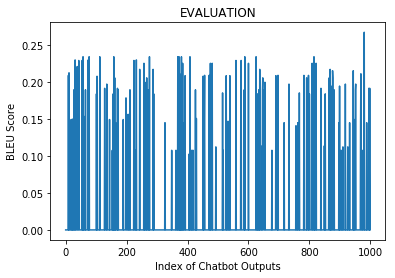

In [0]:
import matplotlib.pyplot as plt
plt.plot(score)
plt.title('EVALUATION')
plt.xlabel('Index of Chatbot Outputs')
plt.ylabel('BLEU Score')

In [0]:
from statistics import mean
print('The average BLEU Score is ',mean(score))

The average BLEU Score is  0.02584549544594778
